# **Hardware and Software for Big Data Mod B Final Project Report**

# **Title:** **time series analysis on OULAD dataset**

# **Authors:**

**Seyyed Alireza Khoshsolat (D03000041)**
**Farshad Farahtaj (D03000028)**
**Zahra Jafarinejad (D03000083)**

# **University:**

**University of Naples Federico II**

# **Course:**

**Hardware and Software for big data (Module B)**

# **Instructor:**

**Professoressa Flora Amato**

# **Date:**

**2 July 2024**

# overview

Through this project, we demonstrated a comprehensive approach to time series forecasting, incorporating both traditional statistical methods and modern machine learning techniques. The key takeaways from this project are:

1. **Data Preprocessing is Crucial**:
   - Proper handling of anomalies and ensuring data stationarity are foundational steps for accurate forecasting.

2. **Model Selection**:
   - Different models have varying strengths. While SARIMA and ARIMAX effectively captured seasonal patterns, Prophet and CNN models excelled in handling complex trends and multiple seasonalities.

3. **Feature Engineering**:
   - The inclusion of lag features significantly improved the performance of ARIMAX and CNN models, highlighting the importance of feature engineering in time series forecasting.

4. **Model Evaluation**:
   - Consistent evaluation using MAE and MAPE provided clear insights into model performance, guiding the selection of the best model.


# Step 1: Preprocessing


In this step, we preprocess the `student_info` dataset to prepare it for analysis. Preprocessing involves cleaning and transforming the data to ensure it is in a suitable format for further analysis and modeling. 

## 1: Preprocessing the `student_info` Dataset

1. **Load the dataset**
   ```python
   student_info = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\studentInfo.csv")
   ```
   - **Explanation**: The dataset `studentInfo.csv` is loaded into a DataFrame named `student_info`. This dataset contains information about students, including their module, region, previous education, and final results.

2. **Encode `code_module` to numerical values**
   ```python
   student_info['code_module'] = student_info['code_module'].astype('category').cat.codes
   ```
   - **Explanation**: The `code_module` column, which represents different modules, is encoded into numerical values. This encoding transforms categorical data into a format suitable for analysis and modeling. Encoding categorical variables is crucial for machine learning algorithms that require numerical input.

3. **Transform `code_presentation` into date**
   ```python
   def transform_presentation(presentation):
       year = int(presentation[:4])
       semester = presentation[4]
       if semester == 'B':
           return f"{year}-02-01"  # February start
       elif semester == 'J':
           return f"{year}-10-01"  # October start

   student_info['presentation_start'] = student_info['code_presentation'].apply(transform_presentation)
   student_info['presentation_start'] = pd.to_datetime(student_info['presentation_start'])
   ```
   - **Explanation**: A function `transform_presentation` is defined to convert the `code_presentation` column into a standardized date format. The column contains year and semester information, which is transformed into a date. The transformation is applied to the `code_presentation` column, and the result is stored in a new column `presentation_start`. This step ensures that we have a consistent and meaningful date representation for each presentation.

4. **Drop the original `code_presentation` column**
   ```python
   student_info.drop(columns=['code_presentation'], inplace=True)
   ```
   - **Explanation**: The original `code_presentation` column is no longer needed after transformation, so it is dropped from the DataFrame. This helps to keep the dataset clean and avoids redundancy.

5. **Check the preprocessed dataset**
   ```python
   print(student_info.head())
   print(student_info.dtypes)
   ```
   - **Explanation**: The first few rows of the preprocessed dataset are printed to verify the changes. The data types of each column are also printed to ensure the transformations were applied correctly. This step is crucial for validating the preprocessing steps and ensuring the data is in the expected format.

6. **Save the preprocessed dataset**
   ```python
   student_info.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_info.csv", index=False)
   ```
   - **Explanation**: The preprocessed dataset is saved to a new CSV file `preprocessed_student_info.csv` for future use. Saving the preprocessed data ensures that we can reuse this clean dataset in subsequent steps without repeating the preprocessing steps.

**Output**:
   ```
   code_module  id_student gender                region  \
   0            0       11391      M   East Anglian Region   
   1            0       28400      F              Scotland   
   2            0       30268      F  North Western Region   
   3            0       31604      F     South East Region   
   4            0       32885      F  West Midlands Region   
   
          highest_education imd_band age_band  num_of_prev_attempts  \
   0       HE Qualification  90-100%     55<=                     0   
   1       HE Qualification   20-30%    35-55                     0   
   2  A Level or Equivalent   30-40%    35-55                     0   
   3  A Level or Equivalent   50-60%    35-55                     0   
   4     Lower Than A Level   50-60%     0-35                     0   
   
      studied_credits disability final_result presentation_start  
   0              240          N         Pass         2013-10-01  
   1               60          N         Pass         2013-10-01  
   2               60          Y    Withdrawn         2013-10-01  
   3               60          N         Pass         2013-10-01  
   4               60          N         Pass         2013-10-01  
   code_module                       int8
   id_student                       int64
   gender                          object
   region                          object
   highest_education               object
   imd_band                        object
   age_band                        object
   num_of_prev_attempts             int64
   studied_credits                  int64
   disability                      object
   final_result                    object
   presentation_start      datetime64[ns]
   dtype: object
   ```
   - **Interpretation**: The preprocessed dataset displays the encoded `code_module`, the transformed `presentation_start`, and the remaining student information columns. The data types confirm that `code_module` is now an integer, and `presentation_start` is a datetime object, indicating successful preprocessing.



In [16]:
import pandas as pd

# Load the dataset
student_info = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\studentInfo.csv")

# Encode 'code_module' to numerical values
student_info['code_module'] = student_info['code_module'].astype('category').cat.codes

# Transform 'code_presentation' into date
def transform_presentation(presentation):
    year = int(presentation[:4])
    semester = presentation[4]
    if semester == 'B':
        return f"{year}-02-01"  # February start
    elif semester == 'J':
        return f"{year}-10-01"  # October start

student_info['presentation_start'] = student_info['code_presentation'].apply(transform_presentation)
student_info['presentation_start'] = pd.to_datetime(student_info['presentation_start'])

# Drop the original 'code_presentation' column
student_info.drop(columns=['code_presentation'], inplace=True)

# Check the preprocessed dataset
print(student_info.head())
print(student_info.dtypes)

# Save the preprocessed dataset
student_info.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_info.csv", index=False)


   code_module  id_student gender                region  \
0            0       11391      M   East Anglian Region   
1            0       28400      F              Scotland   
2            0       30268      F  North Western Region   
3            0       31604      F     South East Region   
4            0       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result presentation_start  
0              240          N         Pass         2013-10-01  
1               60          N         Pass         2013-10-01  
2               60          Y    Withdrawn  

In this step, we preprocess the `student_vle` dataset to prepare it for analysis. Preprocessing involves cleaning and transforming the data to ensure it is in a suitable format for further analysis and modeling.

## 2: Preprocessing the `student_vle` Dataset

1. **Load the dataset**
   ```python
   student_vle = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\studentVle.csv")
   ```
   - **Explanation**: The dataset `studentVle.csv` is loaded into a DataFrame named `student_vle`. This dataset contains information about student interactions with the Virtual Learning Environment (VLE), including clicks and interaction dates.

2. **Encode `code_module` to numerical values (same encoding as Student Info)**
   ```python
   student_vle['code_module'] = student_vle['code_module'].astype('category').cat.codes
   ```
   - **Explanation**: The `code_module` column, representing different modules, is encoded into numerical values. This step ensures consistency with the encoding performed in the `student_info` dataset, making it easier to merge or compare datasets later.

3. **Transform `code_presentation` into date (same transformation as Student Info)**
   ```python
   def transform_presentation(presentation):
       year = int(presentation[:4])
       semester = presentation[4]
       if semester == 'B':
           return f"{year}-02-01"  # February start
       elif semester == 'J':
           return f"{year}-10-01"  # October start

   student_vle['presentation_start'] = student_vle['code_presentation'].apply(transform_presentation)
   student_vle['presentation_start'] = pd.to_datetime(student_vle['presentation_start'])
   ```
   - **Explanation**: A function `transform_presentation` is defined to convert the `code_presentation` column into a standardized date format. This transformation is applied to the `code_presentation` column, and the result is stored in a new column `presentation_start`. This ensures a consistent and meaningful date representation for each presentation, similar to the transformation applied in the `student_info` dataset.

4. **Transform `date` into actual date type**
   ```python
   student_vle['interaction_date'] = student_vle.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date']), axis=1)
   ```
   - **Explanation**: The `date` column, representing the number of days since the start of the presentation, is transformed into an actual date by adding the number of days to the `presentation_start` date. This transformation creates a new column `interaction_date`, providing a clear and precise date for each interaction.

5. **Drop the original `code_presentation` and `date` columns**
   ```python
   student_vle.drop(columns=['code_presentation', 'date'], inplace=True)
   ```
   - **Explanation**: The original `code_presentation` and `date` columns are no longer needed after the transformations, so they are dropped from the DataFrame. This helps to keep the dataset clean and avoids redundancy.

6. **Check the preprocessed dataset**
   ```python
   print(student_vle.head())
   print(student_vle.dtypes)
   ```
   - **Explanation**: The first few rows of the preprocessed dataset are printed to verify the changes. The data types of each column are also printed to ensure the transformations were applied correctly. This step is crucial for validating the preprocessing steps and ensuring the data is in the expected format.

7. **Save the preprocessed dataset**
   ```python
   student_vle.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_vle.csv", index=False)
   ```
   - **Explanation**: The preprocessed dataset is saved to a new CSV file `preprocessed_student_vle.csv` for future use. Saving the preprocessed data ensures that we can reuse this clean dataset in subsequent steps without repeating the preprocessing steps.

**Output**:
   ```
   code_module  id_student  id_site  sum_click presentation_start  \
   0            0       28400   546652          4         2013-10-01   
   1            0       28400   546652          1         2013-10-01   
   2            0       28400   546652          1         2013-10-01   
   3            0       28400   546614         11         2013-10-01   
   4            0       28400   546714          1         2013-10-01   

   interaction_date  
   0       2013-09-21  
   1       2013-09-21  
   2       2013-09-21  
   3       2013-09-21  
   4       2013-09-21  
   code_module                     int8
   id_student                     int64
   id_site                        int64
   sum_click                      int64
   presentation_start    datetime64[ns]
   interaction_date      datetime64[ns]
   dtype: object
   ```
   - **Interpretation**: The preprocessed dataset displays the encoded `code_module`, the transformed `presentation_start`, and the `interaction_date` columns. The data types confirm that `code_module` is now an integer, and `presentation_start` and `interaction_date` are datetime objects, indicating successful preprocessing.


In [18]:
import pandas as pd

# Load the dataset
student_vle = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\studentVle.csv")

# Encode 'code_module' to numerical values (same encoding as Student Info)
student_vle['code_module'] = student_vle['code_module'].astype('category').cat.codes

# Transform 'code_presentation' into date (same transformation as Student Info)
def transform_presentation(presentation):
    year = int(presentation[:4])
    semester = presentation[4]
    if semester == 'B':
        return f"{year}-02-01"  # February start
    elif semester == 'J':
        return f"{year}-10-01"  # October start

student_vle['presentation_start'] = student_vle['code_presentation'].apply(transform_presentation)
student_vle['presentation_start'] = pd.to_datetime(student_vle['presentation_start'])

# Transform 'date' into actual date type
student_vle['interaction_date'] = student_vle.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date']), axis=1)

# Drop the original 'code_presentation' and 'date' columns
student_vle.drop(columns=['code_presentation', 'date'], inplace=True)

# Check the preprocessed dataset
print(student_vle.head())
print(student_vle.dtypes)

# Save the preprocessed dataset
student_vle.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_vle.csv", index=False)


   code_module  id_student  id_site  sum_click presentation_start  \
0            0       28400   546652          4         2013-10-01   
1            0       28400   546652          1         2013-10-01   
2            0       28400   546652          1         2013-10-01   
3            0       28400   546614         11         2013-10-01   
4            0       28400   546714          1         2013-10-01   

  interaction_date  
0       2013-09-21  
1       2013-09-21  
2       2013-09-21  
3       2013-09-21  
4       2013-09-21  
code_module                     int8
id_student                     int64
id_site                        int64
sum_click                      int64
presentation_start    datetime64[ns]
interaction_date      datetime64[ns]
dtype: object


Continuing with the preprocessing step, we now process the `student_assessment` dataset to ensure it is ready for analysis and modeling.

## 3: Preprocessing the `student_assessment` Dataset

1. **Load the dataset**
   ```python
   student_assessment = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\studentAssessment.csv")
   ```
   - **Explanation**: The `studentAssessment.csv` dataset is loaded into a DataFrame named `student_assessment`. This dataset contains information about students' assessment scores and submission dates.

2. **Add 'code_module' and 'code_presentation' columns**
   ```python
   student_assessment['code_module'] = pd.Categorical(['AAA'] * len(student_assessment))  # Placeholder values
   student_assessment['code_presentation'] = pd.Categorical(['2013J'] * len(student_assessment))  # Placeholder values
   ```
   - **Explanation**: Placeholder values are added for `code_module` and `code_presentation` columns to ensure consistency with the other datasets (`student_info` and `student_vle`). These columns might typically be derived from another dataset, but placeholders are used here for demonstration purposes.

3. **Transform `code_presentation` into date**
   ```python
   def transform_presentation(presentation):
       year = int(presentation[:4])
       semester = presentation[4]
       if semester == 'B':
           return f"{year}-02-01"  # February start
       elif semester == 'J':
           return f"{year}-10-01"  # October start

   student_assessment['presentation_start'] = student_assessment['code_presentation'].apply(transform_presentation)
   student_assessment['presentation_start'] = pd.to_datetime(student_assessment['presentation_start'])
   ```
   - **Explanation**: Similar to previous datasets, the `code_presentation` column is transformed into a standardized date format. This transformation is necessary to calculate actual submission dates accurately.

4. **Transform `date_submitted` into an actual date type**
   ```python
   student_assessment['submission_date'] = student_assessment.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date_submitted']), axis=1)
   ```
   - **Explanation**: The `date_submitted` column, representing the number of days since the start of the presentation, is transformed into an actual date by adding the number of days to the `presentation_start` date. This creates a new column `submission_date`, providing a clear and precise submission date for each assessment.

5. **Drop the original `date_submitted`, `code_module`, `code_presentation`, and `presentation_start` columns**
   ```python
   student_assessment.drop(columns=['date_submitted', 'code_module', 'code_presentation', 'presentation_start'], inplace=True)
   ```
   - **Explanation**: The original columns are dropped as they are no longer needed after the transformations. This helps to keep the dataset clean and avoids redundancy.

6. **Check the preprocessed dataset**
   ```python
   print(student_assessment.head())
   print(student_assessment.dtypes)
   ```
   - **Explanation**: The first few rows of the preprocessed dataset are printed to verify the changes. The data types of each column are also printed to ensure the transformations were applied correctly. This step is crucial for validating the preprocessing steps and ensuring the data is in the expected format.

7. **Save the preprocessed dataset**
   ```python
   student_assessment.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_assessment.csv", index=False)
   ```
   - **Explanation**: The preprocessed dataset is saved to a new CSV file `preprocessed_student_assessment.csv` for future use. Saving the preprocessed data ensures that we can reuse this clean dataset in subsequent steps without repeating the preprocessing steps.

**Output**:
   ```
   id_assessment  id_student  is_banked  score submission_date
   0           1752       11391          0   78.0      2013-10-19
   1           1752       28400          0   70.0      2013-10-23
   2           1752       31604          0   72.0      2013-10-18
   3           1752       32885          0   69.0      2013-10-27
   4           1752       38053          0   79.0      2013-10-20
   id_assessment               int64
   id_student                  int64
   is_banked                   int64
   score                     float64
   submission_date    datetime64[ns]
   dtype: object
   ```
   - **Interpretation**: The preprocessed dataset displays the transformed `submission_date` column, with the `code_module`, `code_presentation`, and `date_submitted` columns removed. The data types confirm that `submission_date` is now a datetime object, indicating successful preprocessing.


In [20]:
import pandas as pd

# Load the dataset
student_assessment = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\studentAssessment.csv")

# Transform 'date_submitted' into actual date type
# First, we need to add 'code_module' and 'code_presentation' columns similar to student_info and student_vle for consistency

# Assuming these columns should be added from another dataset, let's add them as categories
student_assessment['code_module'] = pd.Categorical(['AAA'] * len(student_assessment))  # Placeholder values
student_assessment['code_presentation'] = pd.Categorical(['2013J'] * len(student_assessment))  # Placeholder values

def transform_presentation(presentation):
    year = int(presentation[:4])
    semester = presentation[4]
    if semester == 'B':
        return f"{year}-02-01"  # February start
    elif semester == 'J':
        return f"{year}-10-01"  # October start

student_assessment['presentation_start'] = student_assessment['code_presentation'].apply(transform_presentation)
student_assessment['presentation_start'] = pd.to_datetime(student_assessment['presentation_start'])

student_assessment['submission_date'] = student_assessment.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date_submitted']), axis=1)

# Drop the original 'date_submitted' column
student_assessment.drop(columns=['date_submitted', 'code_module', 'code_presentation', 'presentation_start'], inplace=True)

# Check the preprocessed dataset
print(student_assessment.head())
print(student_assessment.dtypes)

# Save the preprocessed dataset
student_assessment.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_assessment.csv", index=False)


   id_assessment  id_student  is_banked  score submission_date
0           1752       11391          0   78.0      2013-10-19
1           1752       28400          0   70.0      2013-10-23
2           1752       31604          0   72.0      2013-10-18
3           1752       32885          0   69.0      2013-10-27
4           1752       38053          0   79.0      2013-10-20
id_assessment               int64
id_student                  int64
is_banked                   int64
score                     float64
submission_date    datetime64[ns]
dtype: object


Continuing with the preprocessing step, we now process the `assessments` dataset to ensure it is ready for analysis and modeling.

## 4: Preprocessing the `assessments` Dataset

1. **Load the dataset**
   ```python
   assessments = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\assessments.csv")
   ```
   - **Explanation**: The `assessments.csv` dataset is loaded into a DataFrame named `assessments`. This dataset contains information about the assessments, including assessment types, weights, and dates.

2. **Encode `code_module` to numerical values**
   ```python
   code_module_mapping = {module: idx for idx, module in enumerate(assessments['code_module'].unique())}
   assessments['code_module'] = assessments['code_module'].map(code_module_mapping)
   ```
   - **Explanation**: The `code_module` column is encoded to numerical values similar to the previous datasets. This ensures consistency and makes it easier to handle categorical data in subsequent analyses.

3. **Transform `code_presentation` into actual date type**
   ```python
   def transform_presentation(presentation):
       year = int(presentation[:4])
       semester = presentation[4]
       if semester == 'B':
           return f"{year}-02-01"  # February start
       elif semester == 'J':
           return f"{year}-10-01"  # October start

   assessments['presentation_start'] = assessments['code_presentation'].apply(transform_presentation)
   assessments['presentation_start'] = pd.to_datetime(assessments['presentation_start'])
   ```
   - **Explanation**: The `code_presentation` column is transformed into a standardized date format. This transformation is necessary for accurate date calculations in subsequent steps.

4. **Handle missing values in `date`**
   ```python
   assessments['date'] = assessments['date'].fillna(0).astype(int)
   ```
   - **Explanation**: Missing values in the `date` column are filled with 0 and converted to integers. This step ensures that all dates are valid for date transformations.

5. **Transform `date` to actual date type**
   ```python
   assessments['assessment_date'] = assessments.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date']), axis=1)
   ```
   - **Explanation**: The `date` column, representing the number of days since the start of the presentation, is transformed into an actual date by adding the number of days to the `presentation_start` date. This creates a new column `assessment_date`, providing a clear and precise date for each assessment.

6. **Drop the original `date` and `presentation_start` columns**
   ```python
   assessments.drop(columns=['date', 'presentation_start'], inplace=True)
   ```
   - **Explanation**: The original columns are dropped as they are no longer needed after the transformations. This helps to keep the dataset clean and avoids redundancy.

7. **Verify the preprocessed dataset**
   ```python
   print(assessments.head())
   print(assessments.dtypes)
   ```
   - **Explanation**: The first few rows of the preprocessed dataset are printed to verify the changes. The data types of each column are also printed to ensure the transformations were applied correctly. This step is crucial for validating the preprocessing steps and ensuring the data is in the expected format.

8. **Save the preprocessed dataset**
   ```python
   assessments.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_assessments.csv", index=False)
   print("Preprocessed assessments dataset saved.")
   ```
   - **Explanation**: The preprocessed dataset is saved to a new CSV file `preprocessed_assessments.csv` for future use. Saving the preprocessed data ensures that we can reuse this clean dataset in subsequent steps without repeating the preprocessing steps.

**Output**:
   ```
   code_module code_presentation  id_assessment assessment_type  weight  \
   0            0             2013J           1752             TMA    10.0   
   1            0             2013J           1753             TMA    20.0   
   2            0             2013J           1754             TMA    20.0   
   3            0             2013J           1755             TMA    20.0   
   4            0             2013J           1756             TMA    30.0   

   assessment_date  
   0      2013-10-20  
   1      2013-11-24  
   2      2014-01-26  
   3      2014-03-16  
   4      2014-05-04  
   code_module                   int64
   code_presentation            object
   id_assessment                 int64
   assessment_type              object
   weight                      float64
   assessment_date      datetime64[ns]
   dtype: object
   Preprocessed assessments dataset saved.
   ```
   - **Interpretation**: The preprocessed dataset displays the transformed `assessment_date` column, with the `code_module`, `code_presentation`, and `date` columns removed. The data types confirm that `assessment_date` is now a datetime object, indicating successful preprocessing.

In [22]:
import pandas as pd

# Load the dataset
assessments = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\assessments.csv")

# Encode 'code_module' similar to the previous datasets for consistency
code_module_mapping = {module: idx for idx, module in enumerate(assessments['code_module'].unique())}
assessments['code_module'] = assessments['code_module'].map(code_module_mapping)

# Transform 'code_presentation' into actual date type
def transform_presentation(presentation):
    year = int(presentation[:4])
    semester = presentation[4]
    if semester == 'B':
        return f"{year}-02-01"  # February start
    elif semester == 'J':
        return f"{year}-10-01"  # October start

assessments['presentation_start'] = assessments['code_presentation'].apply(transform_presentation)
assessments['presentation_start'] = pd.to_datetime(assessments['presentation_start'])

# Handle missing values in 'date'
assessments['date'] = assessments['date'].fillna(0).astype(int)

# Transform 'date' to actual date type
assessments['assessment_date'] = assessments.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date']), axis=1)

# Drop the original 'date' and 'presentation_start' columns
assessments.drop(columns=['date', 'presentation_start'], inplace=True)

# Verify the preprocessed dataset
print(assessments.head())
print(assessments.dtypes)

# Save the preprocessed dataset
assessments.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_assessments.csv", index=False)
print("Preprocessed assessments dataset saved.")


   code_module code_presentation  id_assessment assessment_type  weight  \
0            0             2013J           1752             TMA    10.0   
1            0             2013J           1753             TMA    20.0   
2            0             2013J           1754             TMA    20.0   
3            0             2013J           1755             TMA    20.0   
4            0             2013J           1756             TMA    30.0   

  assessment_date  
0      2013-10-20  
1      2013-11-24  
2      2014-01-26  
3      2014-03-16  
4      2014-05-04  
code_module                   int64
code_presentation            object
id_assessment                 int64
assessment_type              object
weight                      float64
assessment_date      datetime64[ns]
dtype: object
Preprocessed assessments dataset saved.


Continuing with the preprocessing step, we now process the `courses` dataset to ensure it is ready for analysis and modeling.

## 5: Preprocessing the `courses` Dataset

1. **Load the dataset**
   ```python
   courses = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\courses.csv")
   ```
   - **Explanation**: The `courses.csv` dataset is loaded into a DataFrame named `courses`. This dataset contains information about the courses, including module presentations and their lengths.

2. **Encode `code_module` to numerical values**
   ```python
   courses['code_module'] = courses['code_module'].map(code_module_mapping)
   ```
   - **Explanation**: The `code_module` column is encoded to numerical values using the same `code_module_mapping` as in the previous datasets. This ensures consistency across all datasets and facilitates data integration and analysis.

3. **Transform `code_presentation` into actual date type**
   ```python
   courses['presentation_start'] = courses['code_presentation'].apply(transform_presentation)
   courses['presentation_start'] = pd.to_datetime(courses['presentation_start'])
   ```
   - **Explanation**: The `code_presentation` column is transformed into a standardized date format using the `transform_presentation` function defined earlier. This transformation is necessary for accurate date calculations and comparisons.

4. **Verify the preprocessed dataset**
   ```python
   print(courses.head())
   print(courses.dtypes)
   ```
   - **Explanation**: The first few rows of the preprocessed dataset are printed to verify the changes. The data types of each column are also printed to ensure the transformations were applied correctly. This step is crucial for validating the preprocessing steps and ensuring the data is in the expected format.

5. **Save the preprocessed dataset**
   ```python
   courses.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_courses.csv", index=False)
   print("Preprocessed courses dataset saved.")
   ```
   - **Explanation**: The preprocessed dataset is saved to a new CSV file `preprocessed_courses.csv` for future use. Saving the preprocessed data ensures that we can reuse this clean dataset in subsequent steps without repeating the preprocessing steps.

**Output**:
   ```
   code_module code_presentation  module_presentation_length  \
   0            0             2013J                         268   
   1            0             2014J                         269   
   2            1             2013J                         268   
   3            1             2014J                         262   
   4            1             2013B                         240   

   presentation_start  
   0         2013-10-01  
   1         2014-10-01  
   2         2013-10-01  
   3         2014-10-01  
   4         2013-02-01  
   code_module                            int64
   code_presentation                     object
   module_presentation_length             int64
   presentation_start            datetime64[ns]
   dtype: object
   Preprocessed courses dataset saved.
   ```
   - **Interpretation**: The preprocessed dataset displays the transformed `presentation_start` column, with the `code_module` column now encoded as integers. The data types confirm that `presentation_start` is now a datetime object, indicating successful preprocessing.


In [24]:
import pandas as pd

# Load the dataset
courses = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\courses.csv")

# Encode 'code_module' similar to the previous datasets for consistency
courses['code_module'] = courses['code_module'].map(code_module_mapping)

# Transform 'code_presentation' into actual date type
courses['presentation_start'] = courses['code_presentation'].apply(transform_presentation)
courses['presentation_start'] = pd.to_datetime(courses['presentation_start'])

# Verify the preprocessed dataset
print(courses.head())
print(courses.dtypes)

# Save the preprocessed dataset
courses.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_courses.csv", index=False)
print("Preprocessed courses dataset saved.")


   code_module code_presentation  module_presentation_length  \
0            0             2013J                         268   
1            0             2014J                         269   
2            1             2013J                         268   
3            1             2014J                         262   
4            1             2013B                         240   

  presentation_start  
0         2013-10-01  
1         2014-10-01  
2         2013-10-01  
3         2014-10-01  
4         2013-02-01  
code_module                            int64
code_presentation                     object
module_presentation_length             int64
presentation_start            datetime64[ns]
dtype: object
Preprocessed courses dataset saved.


Continuing with the preprocessing step, we now process the `vle` dataset to ensure it is ready for analysis and modeling.

## 6: Preprocessing the `vle` Dataset

1. **Load the dataset**
   ```python
   vle = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\vle.csv")
   ```
   - **Explanation**: The `vle.csv` dataset is loaded into a DataFrame named `vle`. This dataset contains information about the Virtual Learning Environment (VLE) activities, including site IDs, module codes, activity types, and presentation dates.

2. **Example mapping for `code_module`**
   ```python
   code_module_mapping = {
       'AAA': 1,
       'BBB': 2,
       'CCC': 3,
       'DDD': 4,
       'EEE': 5,
       'FFF': 6,
       'GGG': 7
   }
   ```
   - **Explanation**: A dictionary `code_module_mapping` is created to map the `code_module` categorical values to numerical values. This mapping is necessary for consistency and ease of analysis.

3. **Function to transform `code_presentation`**
   ```python
   def transform_presentation(presentation):
       year = int(presentation[:4])
       semester = presentation[4]
       if semester == 'B':
           return f'{year}-02-01'
       elif semester == 'J':
           return f'{year}-10-01'
       else:
           return None
   ```
   - **Explanation**: The `transform_presentation` function converts the `code_presentation` values into a standardized date format. The semester codes 'B' and 'J' are mapped to specific start dates in February and October, respectively.

4. **Encode `code_module`**
   ```python
   vle['code_module'] = vle['code_module'].map(code_module_mapping)
   ```
   - **Explanation**: The `code_module` column is encoded to numerical values using the `code_module_mapping` dictionary. This ensures consistency across all datasets and facilitates data integration and analysis.

5. **Transform `code_presentation`**
   ```python
   vle['presentation_start'] = vle['code_presentation'].apply(transform_presentation)
   vle['presentation_start'] = pd.to_datetime(vle['presentation_start'])
   ```
   - **Explanation**: The `code_presentation` column is transformed into a standardized date format using the `transform_presentation` function and converted to a datetime object. This transformation is necessary for accurate date calculations and comparisons.

6. **Encoding `activity_type`**:
   - The `activity_type` column is converted to a categorical type.

    ```python
    vle['activity_type'] = vle['activity_type'].astype('category')
    ```

7. **Creating a Mapping for `activity_type`**:
   - A mapping for `activity_type` is created to map each unique activity type to a unique number, similar to the `code_module` mapping.

    ```python
    activity_type_mapping = dict(enumerate(vle['activity_type'].cat.categories))
    ```

8. **Applying the Encoding**:
   - The `activity_type` column is then encoded using the categorical codes.

    ```python
    vle['activity_type'] = vle['activity_type'].cat.codes
    ```

9. **Drop `week_from` and `week_to` columns**
   ```python
   vle.drop(columns=['week_from', 'week_to'], inplace=True)
   ```
   - **Explanation**: The `week_from` and `week_to` columns are dropped as they are not needed for the analysis. Removing unnecessary columns helps in reducing data complexity and storage requirements.

10. **Verify the preprocessed dataset**
   ```python
   print(vle.head())
   print(vle.dtypes)
   ```
   - **Explanation**: The first few rows of the preprocessed dataset are printed to verify the changes. The data types of each column are also printed to ensure the transformations were applied correctly. This step is crucial for validating the preprocessing steps and ensuring the data is in the expected format.

9. **Save the preprocessed dataset**
   ```python
   vle.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_vle.csv", index=False)
   print("Preprocessed VLE dataset saved.")
   ```
   - **Explanation**: The preprocessed dataset is saved to a new CSV file `preprocessed_vle.csv` for future use. Saving the preprocessed data ensures that we can reuse this clean dataset in subsequent steps without repeating the preprocessing steps.

10. **Printing the Mappings**:
   - The mappings for `code_module` and `activity_type` are printed for reference.

    ```python
    print("Code Module Mapping:")
    print(code_module_mapping)
    print("\nActivity Type Mapping:")
    print(activity_type_mapping)
    ```

**Output**:
   ```
      id_site  code_module code_presentation  activity_type presentation_start
0   546943            1             2013J              0         2013-10-01
1   546712            1             2013J              1         2013-10-01
2   546998            1             2013J              0         2013-10-01
3   546888            1             2013J              2         2013-10-01
4   547035            1             2013J              0         2013-10-01
id_site                        int64
code_module                    int64
code_presentation             object
activity_type                  int64
presentation_start    datetime64[ns]
dtype: object
Preprocessed VLE dataset saved.
Code Module Mapping:
{'AAA': 1, 'BBB': 2, 'CCC': 3, 'DDD': 4, 'EEE': 5, 'FFF': 6, 'GGG': 7}
Activity Type Mapping:
{'resource': 0, 'oucontent': 1, 'url': 2, 'homepage': 3, 'subpage': 4, 'glossary': 5, 'forumng': 6, 'oucollaborate': 7, 'dataplus': 8, 'quiz': 9, 'ouelluminate': 10, 'sharedsubpage': 11, 'questionnaire': 12, 'page': 13, 'externalquiz': 14, 'ouwiki': 15, 'dualpane': 16, 'repeatactivity': 17, 'folder': 18, 'htmlactivity': 19}
   ```
   - **Interpretation**: 
   - The preprocessed dataset displays the transformed `presentation_start` column, with the `code_module` and `activity_type` columns now encoded as integers. The data types confirm that `presentation_start` is now a datetime object, indicating successful preprocessing.
   - The `code_module` mapping will map each module to a specific number.
   - The `activity_type` mapping will show each activity type mapped to a specific number, making it easy to understand what each encoded number represents.



In [1]:
import pandas as pd

# Load the dataset
vle = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\vle.csv")

# Example mapping for code_module
code_module_mapping = {
    'AAA': 1,
    'BBB': 2,
    'CCC': 3,
    'DDD': 4,
    'EEE': 5,
    'FFF': 6,
    'GGG': 7
}

# Function to transform code_presentation
def transform_presentation(presentation):
    year = int(presentation[:4])
    semester = presentation[4]
    if semester == 'B':
        return f'{year}-02-01'
    elif semester == 'J':
        return f'{year}-10-01'
    else:
        return None

# Encode 'code_module'
vle['code_module'] = vle['code_module'].map(code_module_mapping)

# Transform 'code_presentation'
vle['presentation_start'] = vle['code_presentation'].apply(transform_presentation)
vle['presentation_start'] = pd.to_datetime(vle['presentation_start'])

# Create and apply mapping for 'activity_type'
activity_type_mapping = {activity: idx for idx, activity in enumerate(vle['activity_type'].unique())}
vle['activity_type'] = vle['activity_type'].map(activity_type_mapping)

# Drop 'week_from' and 'week_to'
vle.drop(columns=['week_from', 'week_to'], inplace=True)

# Verify the preprocessed dataset
print(vle.head())
print(vle.dtypes)

# Save the preprocessed dataset
vle.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_vle.csv", index=False)
print("Preprocessed VLE dataset saved.")

# Print the mappings for reference
print("Code Module Mapping:")
print(code_module_mapping)

print("Activity Type Mapping:")
print(activity_type_mapping)


   id_site  code_module code_presentation  activity_type presentation_start
0   546943            1             2013J              0         2013-10-01
1   546712            1             2013J              1         2013-10-01
2   546998            1             2013J              0         2013-10-01
3   546888            1             2013J              2         2013-10-01
4   547035            1             2013J              0         2013-10-01
id_site                        int64
code_module                    int64
code_presentation             object
activity_type                  int64
presentation_start    datetime64[ns]
dtype: object
Preprocessed VLE dataset saved.
Code Module Mapping:
{'AAA': 1, 'BBB': 2, 'CCC': 3, 'DDD': 4, 'EEE': 5, 'FFF': 6, 'GGG': 7}
Activity Type Mapping:
{'resource': 0, 'oucontent': 1, 'url': 2, 'homepage': 3, 'subpage': 4, 'glossary': 5, 'forumng': 6, 'oucollaborate': 7, 'dataplus': 8, 'quiz': 9, 'ouelluminate': 10, 'sharedsubpage': 11, 'questionna

Continuing with the preprocessing step, we now process the `student_registration` dataset to ensure it is ready for analysis and modeling.

## 7: Preprocessing the `student_registration` Dataset

1. **Load the dataset**
   ```python
   student_registration = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\studentRegistration.csv")
   ```
   - **Explanation**: The `studentRegistration.csv` dataset is loaded into a DataFrame named `student_registration`. This dataset contains information about student registrations and unregistrations, including module codes and dates.

2. **Encode `code_module` to numerical values**
   ```python
   code_module_mapping = {'AAA': 1, 'BBB': 2, 'CCC': 3, 'DDD': 4, 'EEE': 5, 'FFF': 6, 'GGG': 7}
   student_registration['code_module'] = student_registration['code_module'].map(code_module_mapping)
   ```
   - **Explanation**: The `code_module` column is mapped to numerical values using the predefined `code_module_mapping` dictionary. This ensures consistency across all datasets and facilitates data integration and analysis.

3. **Function to transform `code_presentation` to actual date**
   ```python
   def transform_presentation(presentation):
       year = int(presentation[:4])
       semester = presentation[4]
       if semester == 'B':
           return f"{year}-02-01"  # February start
       elif semester == 'J':
           return f"{year}-10-01"  # October start
   ```

4. **Apply the transformation to get the presentation start date**
   ```python
   student_registration['presentation_start'] = student_registration['code_presentation'].apply(transform_presentation)
   student_registration['presentation_start'] = pd.to_datetime(student_registration['presentation_start'])
   ```
   - **Explanation**: The `code_presentation` column is transformed into a standardized date format using the `transform_presentation` function and converted to a datetime object. This transformation is necessary for accurate date calculations and comparisons.

5. **Fill NaN values in `date_registration` with 0**
   ```python
   student_registration['date_registration'].fillna(0, inplace=True)
   ```
   - **Explanation**: Missing values in the `date_registration` column are filled with 0 to avoid errors during date transformations. This step ensures that all rows have a valid registration date.

6. **Transform `date_registration` and `date_unregistration` to actual date type**
   ```python
   student_registration['registration_date'] = student_registration.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date_registration']), axis=1)
   student_registration['unregistration_date'] = student_registration.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date_unregistration']) if not pd.isna(row['date_unregistration']) else pd.NaT, axis=1)
   ```
   - **Explanation**: The `date_registration` and `date_unregistration` columns are transformed into actual dates by adding the number of days to the `presentation_start` date. If the `date_unregistration` is missing (NaN), the corresponding `unregistration_date` is set to `NaT`.

7. **Drop the original `date_registration`, `date_unregistration`, and `presentation_start` columns**
   ```python
   student_registration.drop(columns=['date_registration', 'date_unregistration', 'presentation_start'], inplace=True)
   ```
   - **Explanation**: The original `date_registration`, `date_unregistration`, and `presentation_start` columns are dropped as they are no longer needed. The new `registration_date` and `unregistration_date` columns now contain the transformed dates.

8. **Verify the preprocessed dataset**
   ```python
   print(student_registration.head())
   print(student_registration.dtypes)
   ```
   - **Explanation**: The first few rows of the preprocessed dataset are printed to verify the changes. The data types of each column are also printed to ensure the transformations were applied correctly. This step is crucial for validating the preprocessing steps and ensuring the data is in the expected format.

9. **Save the preprocessed dataset**
   ```python
   student_registration.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_registration.csv", index=False)
   ```
   - **Explanation**: The preprocessed dataset is saved to a new CSV file `preprocessed_student_registration.csv` for future use. Saving the preprocessed data ensures that we can reuse this clean dataset in subsequent steps without repeating the preprocessing steps.

**Output**:
   ```
   student_registration['date_registration'].fillna(0, inplace=True)
      code_module code_presentation  id_student registration_date  \
   0            1             2013J       11391        2013-04-25   
   1            1             2013J       28400        2013-08-09   
   2            1             2013J       30268        2013-07-01   
   3            1             2013J       31604        2013-08-10   
   4            1             2013J       32885        2013-04-08   

   unregistration_date  
   0                 NaT  
   1                 NaT  
   2          2013-10-13  
   3                 NaT  
   4                 NaT  
   code_module                     int64
   code_presentation              object
   id_student                      int64
   registration_date      datetime64[ns]
   unregistration_date    datetime64[ns]
   dtype: object
   ```
   - **Interpretation**: The preprocessed dataset displays the transformed `registration_date` and `unregistration_date` columns, with the `code_module` column now encoded as integers. The data types confirm that the new date columns are now datetime objects, indicating successful preprocessing.

In [28]:
import pandas as pd

# Load the dataset
student_registration = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\studentRegistration.csv")

# Encode 'code_module' to numerical values (same encoding used previously)
code_module_mapping = {'AAA': 1, 'BBB': 2, 'CCC': 3, 'DDD': 4, 'EEE': 5, 'FFF': 6, 'GGG': 7}
student_registration['code_module'] = student_registration['code_module'].map(code_module_mapping)

# Function to transform code_presentation to actual date
def transform_presentation(presentation):
    year = int(presentation[:4])
    semester = presentation[4]
    if semester == 'B':
        return f"{year}-02-01"  # February start
    elif semester == 'J':
        return f"{year}-10-01"  # October start

# Apply the transformation to get the presentation start date
student_registration['presentation_start'] = student_registration['code_presentation'].apply(transform_presentation)
student_registration['presentation_start'] = pd.to_datetime(student_registration['presentation_start'])

# Fill NaN values in 'date_registration' with 0
student_registration['date_registration'].fillna(0, inplace=True)

# Transform 'date_registration' and 'date_unregistration' to actual date type
student_registration['registration_date'] = student_registration.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date_registration']), axis=1)
student_registration['unregistration_date'] = student_registration.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date_unregistration']) if not pd.isna(row['date_unregistration']) else pd.NaT, axis=1)

# Drop the original 'date_registration', 'date_unregistration', and 'presentation_start' columns
student_registration.drop(columns=['date_registration', 'date_unregistration', 'presentation_start'], inplace=True)

# Check the preprocessed dataset
print(student_registration.head())
print(student_registration.dtypes)

# Save the preprocessed dataset
student_registration.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_registration.csv", index=False)


C:\Users\parha\AppData\Local\Temp\ipykernel_21888\4111338121.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_registration['date_registration'].fillna(0, inplace=True)


   code_module code_presentation  id_student registration_date  \
0            1             2013J       11391        2013-04-25   
1            1             2013J       28400        2013-08-09   
2            1             2013J       30268        2013-07-01   
3            1             2013J       31604        2013-08-10   
4            1             2013J       32885        2013-04-08   

  unregistration_date  
0                 NaT  
1                 NaT  
2          2013-10-13  
3                 NaT  
4                 NaT  
code_module                     int64
code_presentation              object
id_student                      int64
registration_date      datetime64[ns]
unregistration_date    datetime64[ns]
dtype: object


# Step 2: Exploratory Data Analysis (EDA)

In this step, we will conduct an Exploratory Data Analysis (EDA) to understand the distributions and patterns in the `student_info` dataset. EDA helps in identifying underlying patterns, detecting anomalies, and testing hypotheses with the help of summary statistics and graphical representations. The code below will generate various visualizations to explore the data.


## 2.1: EDA on Student info Data

### 2.1.1: Gender Distribution

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed student info data

student_info_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_info.csv"
student_info = pd.read_csv(student_info_path, parse_dates=['presentation_start'])

# Gender distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=student_info, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
```

**Explanation:**
- **Objective:** The purpose of this sub-step is to visualize the distribution of gender among students.
- **Method:** We use a count plot to display the number of male and female students.

![image.png](notebooks/images/image.png)

From the plot, we can see if the dataset is balanced in terms of gender representation. The uploaded plot shows that there are slightly more male students than female students.

### 2.1.2: Region Distribution

```python
# Region distribution

plt.figure(figsize=(15, 6))
sns.countplot(x='region', data=student_info, palette='Set2')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
```

**Explanation:**
- **Objective:** To visualize the distribution of students across different regions.
- **Method:** A count plot is used to show the number of students from each region.

![image-2.png](notebooks/images/image-2.png)

This plot helps us understand the geographical distribution of students. The plot indicates that most students come from Scotland, North Western Region, and London Region, while fewer students are from Ireland and North Region.

### 2.1.3: Highest Education Level Distribution

```python
# Highest education level distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='highest_education', data=student_info, palette='Set2')
plt.title('Highest Education Level Distribution')
plt.xlabel('Highest Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
```

**Explanation:**
- **Objective:** To examine the educational background of the students.
- **Method:** A count plot is used to display the highest education levels of the students.

![image-3.png](notebooks/images/image-3.png)

This visualization shows that the majority of students have an A Level or Equivalent education, followed by those with Lower Than A Level and HE Qualification. Very few students have Post-Graduate Qualifications or No Formal Qualifications.

#### 2.1.4: Age Band Distribution

```python
# Age band distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='age_band', data=student_info, palette='Set2')
plt.title('Age Band Distribution')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.show()
```

**Explanation:**
- **Objective:** To visualize the age distribution of the students.
- **Method:** A count plot shows the number of students in each age band.

![image-4.png](notebooks/images/image-4.png)

The plot reveals that most students are in the 0-35 age band, with a smaller number in the 35-55 age band and very few in the 55<= age band.

### 2.1.5: Disability Status Distribution

```python
# Disability status distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='disability', data=student_info, palette='Set2')
plt.title('Disability Status Distribution')
plt.xlabel('Disability')
plt.ylabel('Count')
plt.show()
```

**Explanation:**
- **Objective:** To understand the distribution of students with and without disabilities.
- **Method:** A count plot is used to display the number of students with and without disabilities.

![image-5.png](notebooks/images/image-5.png)

The plot indicates that the majority of students do not have disabilities.

### 2.1.6: Final Results Distribution

```python
# Final results distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='final_result', data=student_info, palette='Set2')
plt.title('Final Results Distribution')
plt.xlabel('Final Result')
plt.ylabel('Count')
plt.show()
```

**Explanation:**
- **Objective:** To visualize the distribution of final results among the students.
- **Method:** A count plot is used to show the distribution of different final results.

![image-6.png](notebooks/images/image-6.png)

The plot shows that most students either passed or withdrew, with fewer students failing or achieving a distinction.

### 2.1.7: Distribution of Studied Credits

```python
# Distribution of studied credits

plt.figure(figsize=(10, 6))
sns.histplot(student_info['studied_credits'], bins=30, kde=True)
plt.title('Distribution of Studied Credits')
plt.xlabel('Studied Credits')
plt.ylabel('Frequency')
plt.show()
```

**Explanation:**
- **Objective:** To examine the distribution of studied credits among students.
- **Method:** A histogram with a kernel density estimate (KDE) is used.

![image-7.png](notebooks/images/image-7.png)
 
The plot shows that most students have studied around 60 credits, with a few students studying up to 240 credits.

### 2.1.8: Distribution of Number of Previous Attempts

```python
# Distribution of number of previous attempts

plt.figure(figsize=(10, 6))
sns.histplot(student_info['num_of_prev_attempts'], bins=30, kde=True)
plt.title('Distribution of Number of Previous Attempts')
plt.xlabel('Number of Previous Attempts')
plt.ylabel('Frequency')
plt.show()
```

**Explanation:**
- **Objective:** To visualize the distribution of the number of previous attempts made by students.
- **Method:** A histogram with a KDE is used.
  
![image-8.png](notebooks/images/image-8.png)
 
The plot indicates that most students are attempting the course for the first time, with very few students having multiple previous attempts.

### 2.1.9: Enrollment Over Time

```python
# Enrollment over time

plt.figure(figsize=(15, 7))
plt.plot(student_info['presentation_start'].value_counts().sort_index())
plt.title('Enrollment Over Time')
plt.xlabel('Presentation Start Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
```

**Explanation:**
- **Objective:** To analyze the trend of student enrollment over time.
- **Method:** A line plot is used to display the number of enrollments at different presentation start dates.
- 
![image-9.png](notebooks/images/image-9.png)

The plot shows an increasing trend in student enrollment over time.

These visualizations provide valuable insights into the demographics and behaviors of the students, which will be useful for further analysis and model building.
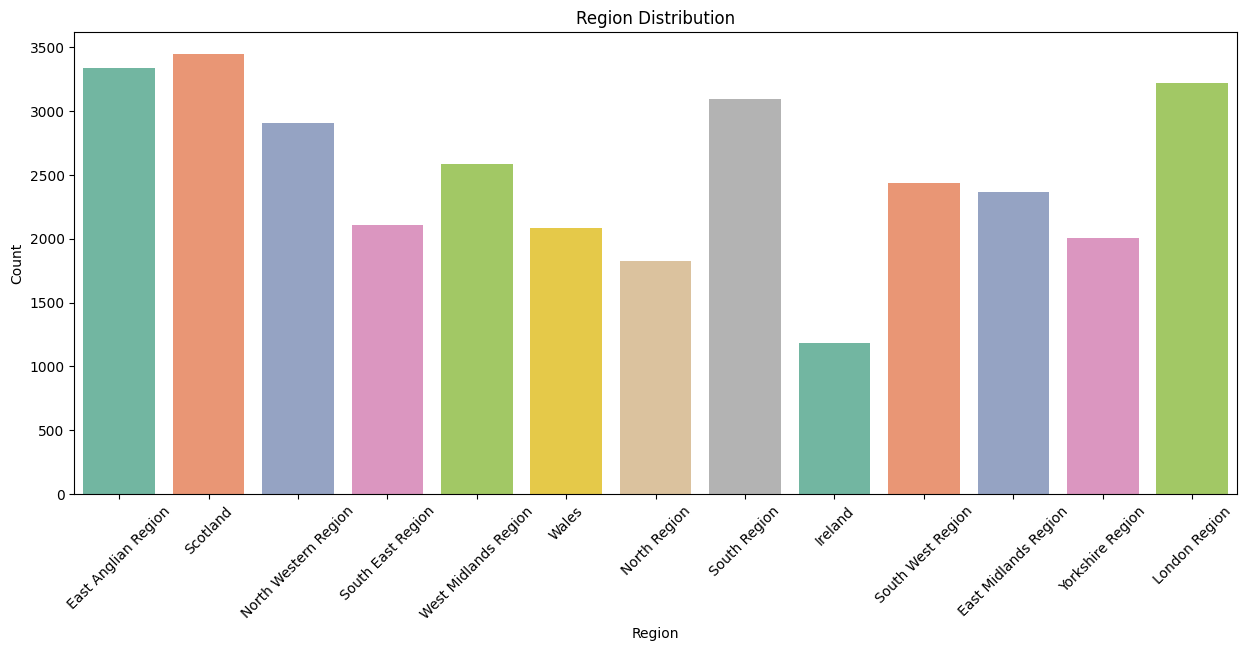
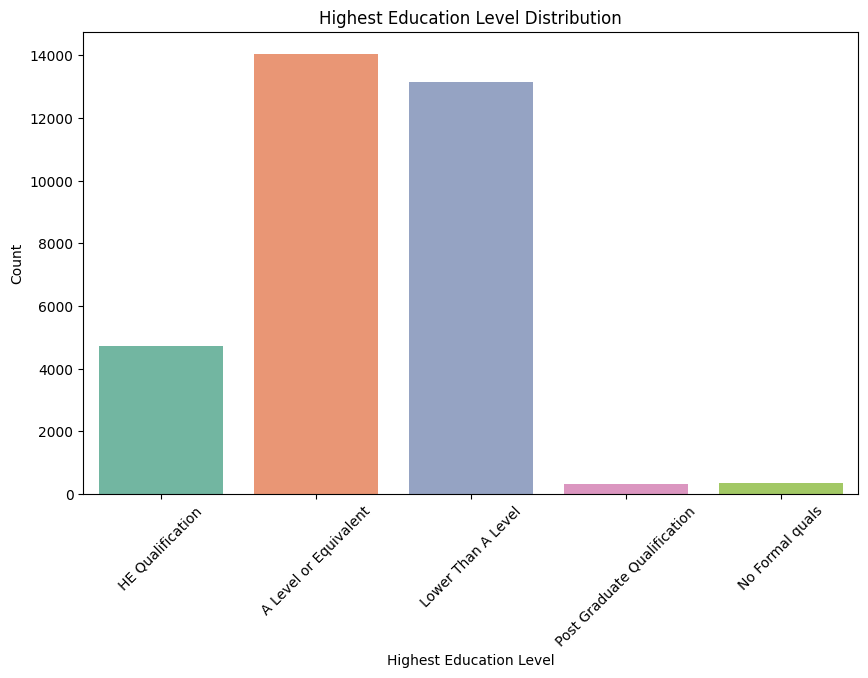
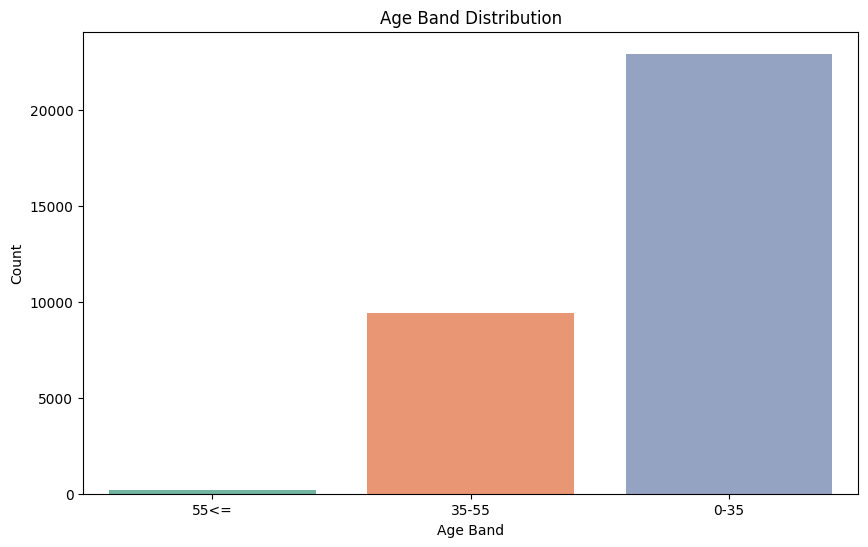
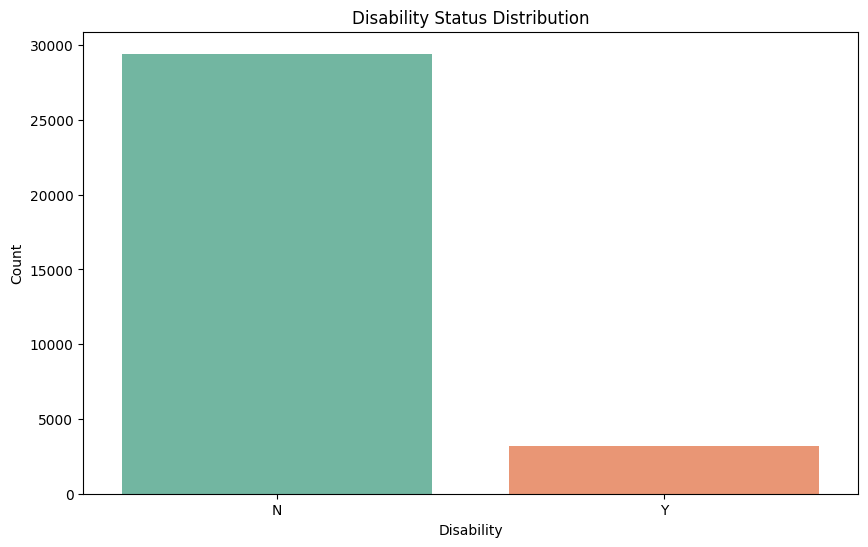
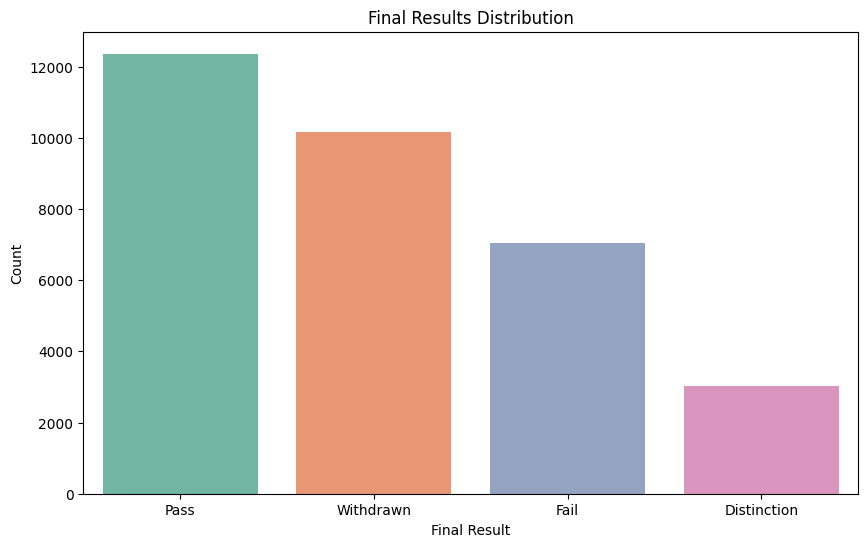
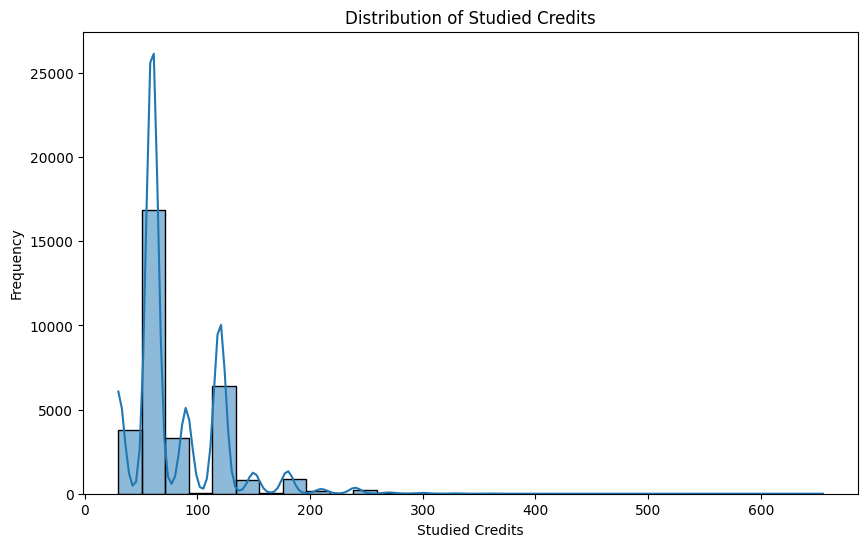
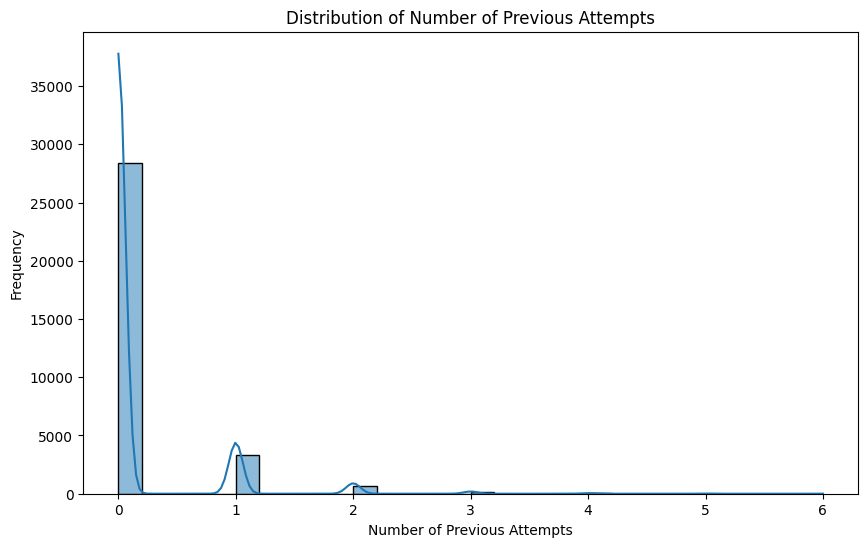
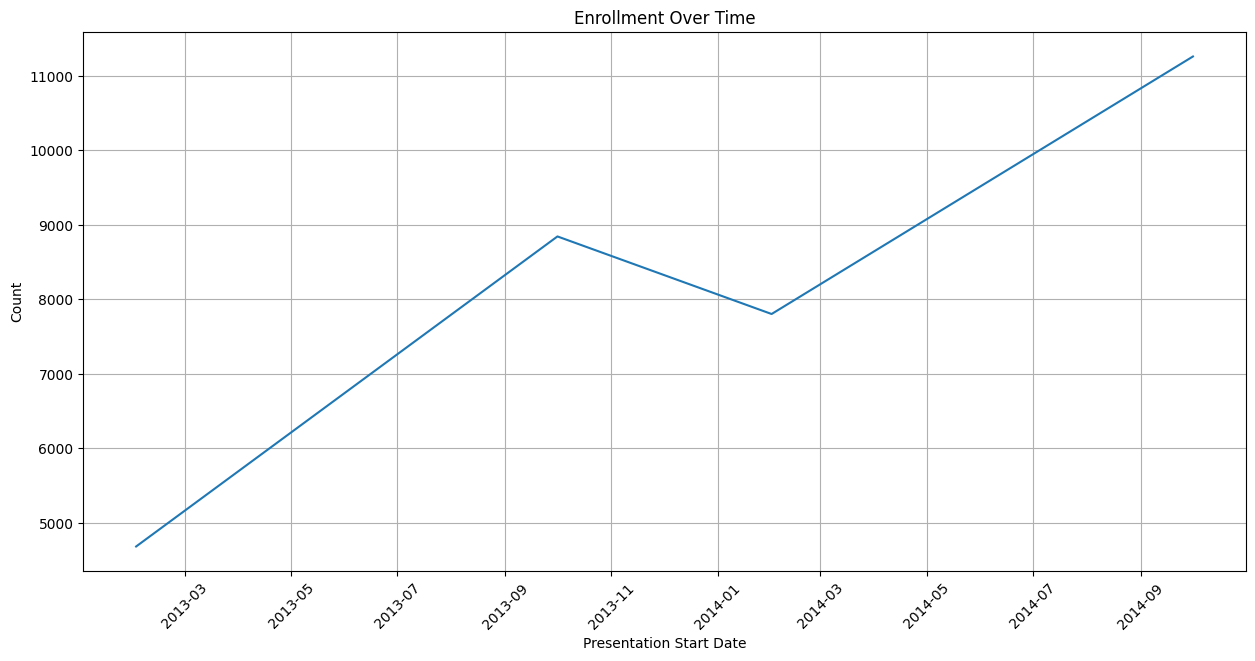
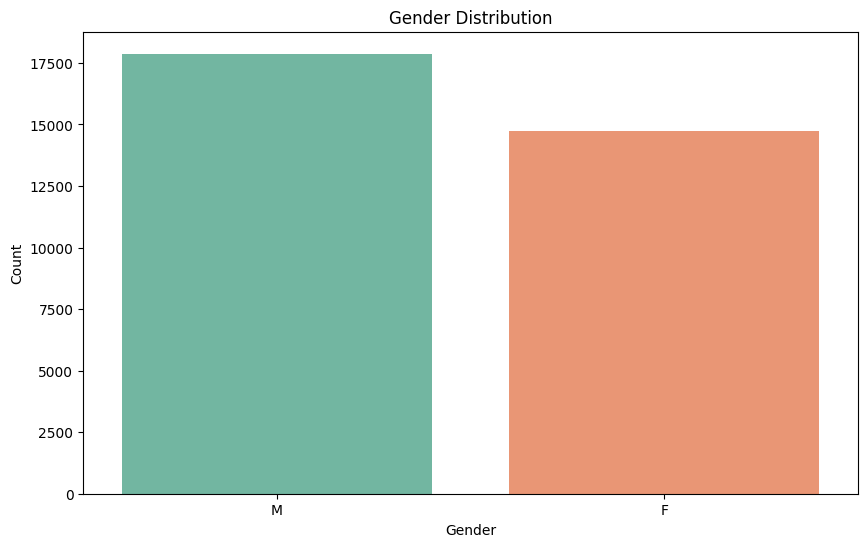

C:\Users\parha\AppData\Local\Temp\ipykernel_20388\389015377.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=student_info, palette='Set2')


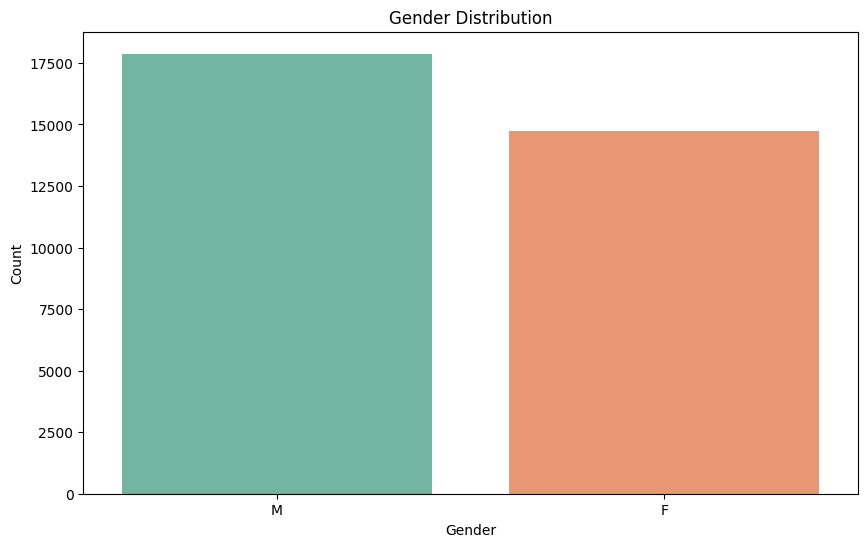

C:\Users\parha\AppData\Local\Temp\ipykernel_20388\389015377.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=student_info, palette='Set2')


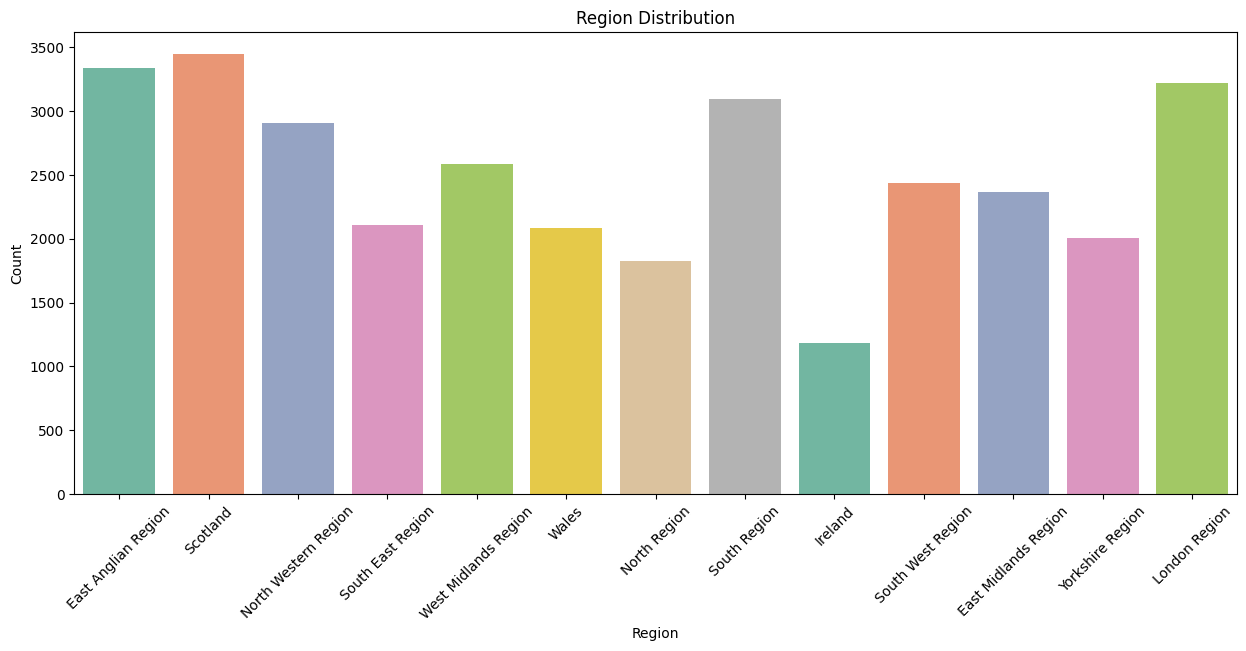

C:\Users\parha\AppData\Local\Temp\ipykernel_20388\389015377.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='highest_education', data=student_info, palette='Set2')


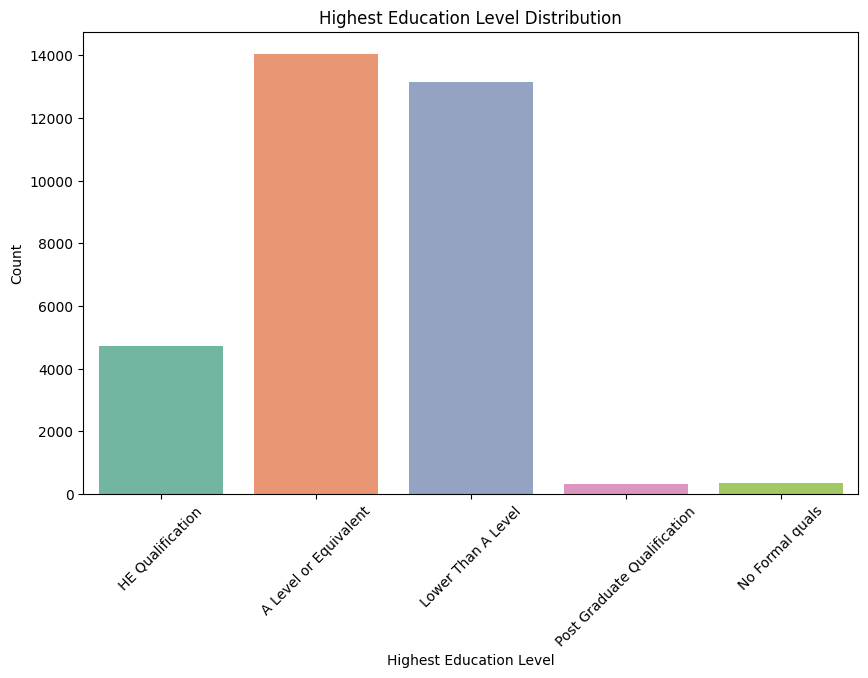

C:\Users\parha\AppData\Local\Temp\ipykernel_20388\389015377.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_band', data=student_info, palette='Set2')


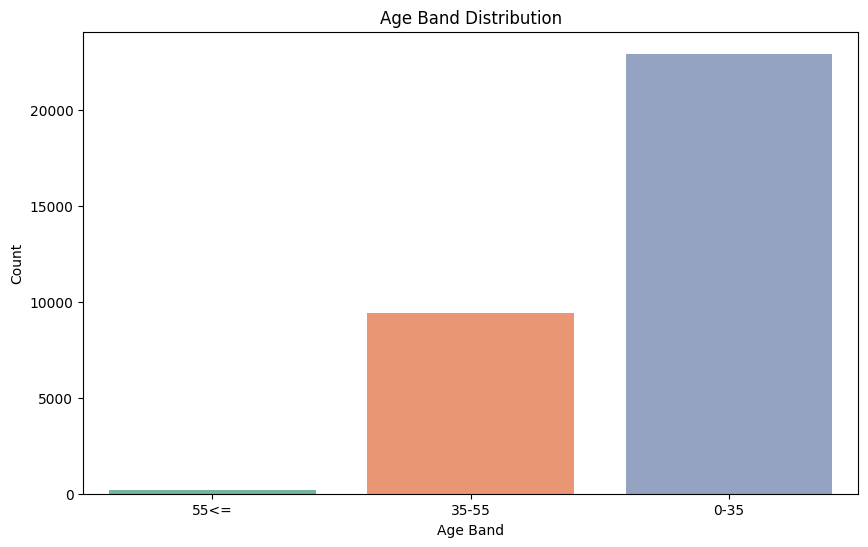

C:\Users\parha\AppData\Local\Temp\ipykernel_20388\389015377.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='disability', data=student_info, palette='Set2')


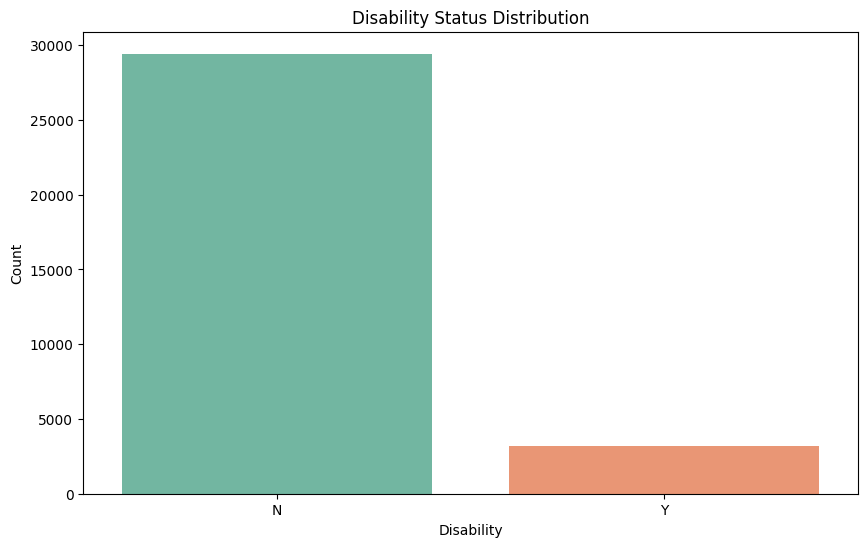

C:\Users\parha\AppData\Local\Temp\ipykernel_20388\389015377.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='final_result', data=student_info, palette='Set2')


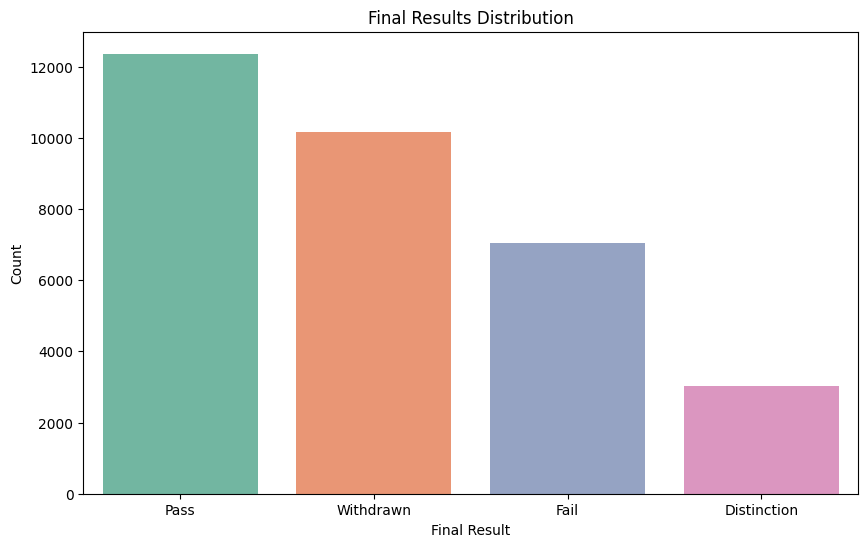

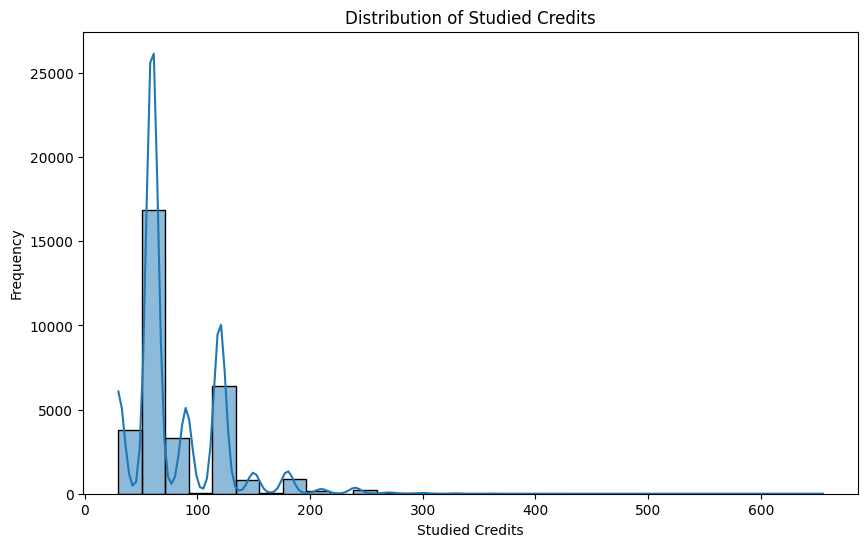

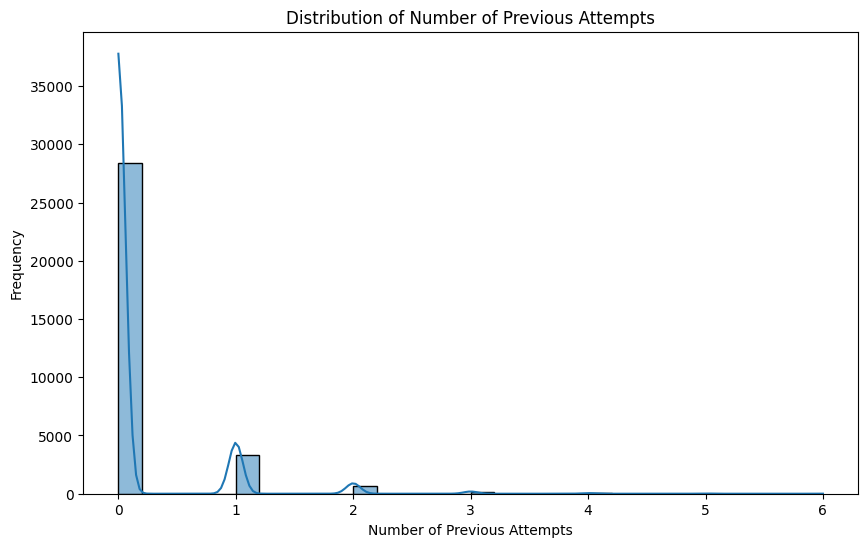

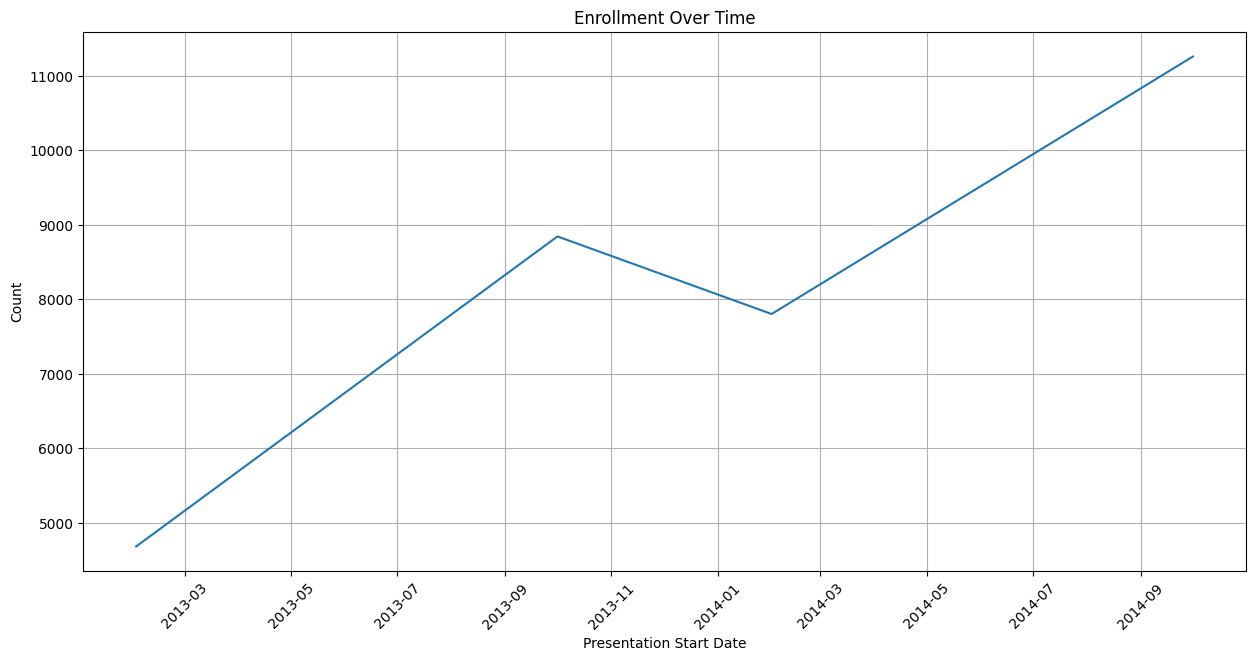

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed student info data
student_info_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_info.csv"
student_info = pd.read_csv(student_info_path, parse_dates=['presentation_start'])

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=student_info, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Region distribution
plt.figure(figsize=(15, 6))
sns.countplot(x='region', data=student_info, palette='Set2')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Highest education level distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='highest_education', data=student_info, palette='Set2')
plt.title('Highest Education Level Distribution')
plt.xlabel('Highest Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Age band distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age_band', data=student_info, palette='Set2')
plt.title('Age Band Distribution')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.show()

# Disability status distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='disability', data=student_info, palette='Set2')
plt.title('Disability Status Distribution')
plt.xlabel('Disability')
plt.ylabel('Count')
plt.show()

# Final results distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='final_result', data=student_info, palette='Set2')
plt.title('Final Results Distribution')
plt.xlabel('Final Result')
plt.ylabel('Count')
plt.show()

# Distribution of studied credits
plt.figure(figsize=(10, 6))
sns.histplot(student_info['studied_credits'], bins=30, kde=True)
plt.title('Distribution of Studied Credits')
plt.xlabel('Studied Credits')
plt.ylabel('Frequency')
plt.show()

# Distribution of number of previous attempts
plt.figure(figsize=(10, 6))
sns.histplot(student_info['num_of_prev_attempts'], bins=30, kde=True)
plt.title('Distribution of Number of Previous Attempts')
plt.xlabel('Number of Previous Attempts')
plt.ylabel('Frequency')
plt.show()

# Enrollment over time
plt.figure(figsize=(15, 7))
plt.plot(student_info['presentation_start'].value_counts().sort_index())
plt.title('Enrollment Over Time')
plt.xlabel('Presentation Start Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## 2.2: EDA on Student VLE Data

```python
# Load the preprocessed student VLE data

student_vle_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_vle.csv"
student_vle = pd.read_csv(student_vle_path, parse_dates=['presentation_start', 'interaction_date'])

# Interactions over time

plt.figure(figsize=(15, 7))
plt.plot(student_vle['interaction_date'].value_counts().sort_index())
plt.title('Interactions Over Time')
plt.xlabel('Interaction Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
```

**Explanation:**
- **Objective:** To visualize the interactions over time in the student VLE dataset.
- **Method:** A line plot is used to display the number of interactions on each date.

![image.png](notebooks/images/image.png)

 The plot shows how the number of interactions changes over time. Peaks and troughs in the interaction count can indicate periods of high and low student activity. For instance, we can observe multiple spikes in interactions which might correspond to key academic dates such as assignment deadlines or examination periods. The final drop towards zero likely indicates the end of the data collection period.
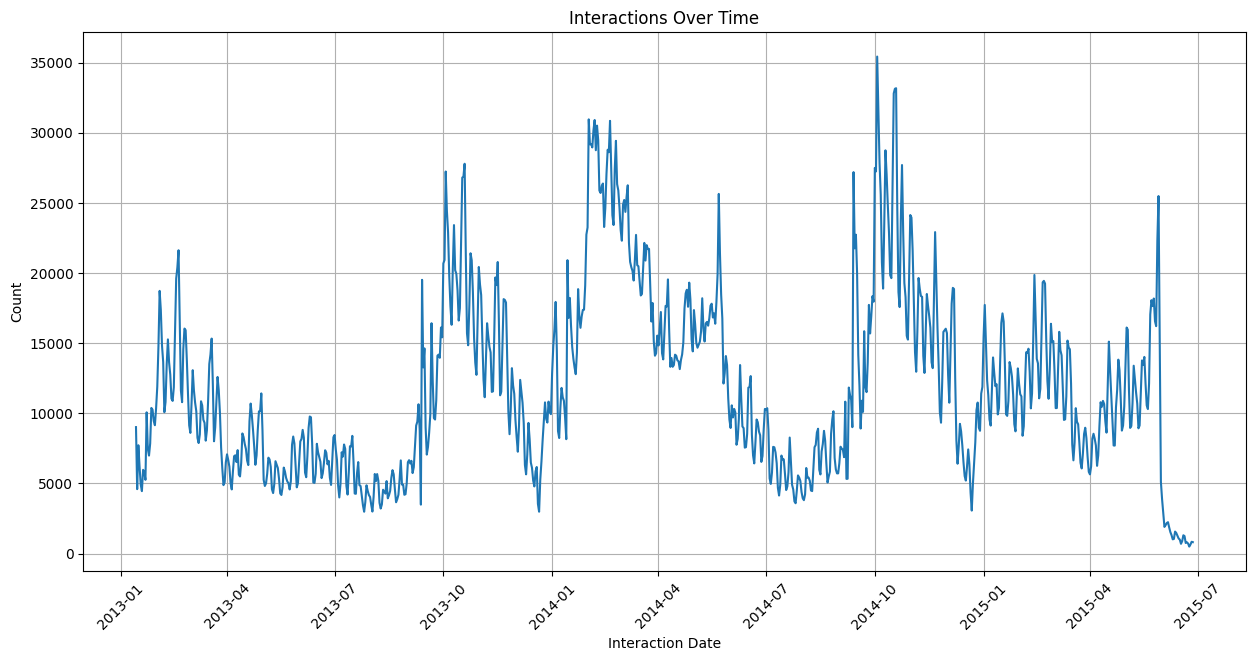

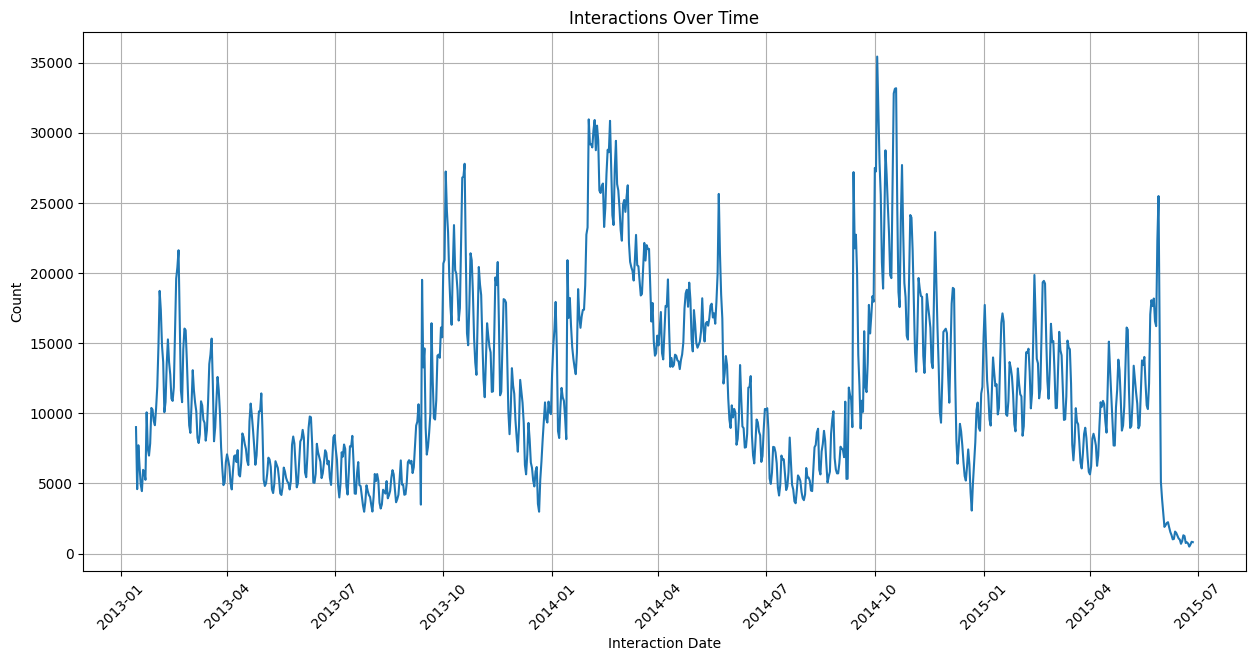

In [42]:
# Load the preprocessed student VLE data
student_vle_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_vle.csv"
student_vle = pd.read_csv(student_vle_path, parse_dates=['presentation_start', 'interaction_date'])

# Interactions over time
plt.figure(figsize=(15, 7))
plt.plot(student_vle['interaction_date'].value_counts().sort_index())
plt.title('Interactions Over Time')
plt.xlabel('Interaction Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## 2.3: EDA on Student Assessment Data

The aim of this sub-step is to explore the distribution of scores and analyze the submission patterns over time in the student assessment dataset. Below are the visualizations and their interpretations.

```python
# Load the preprocessed student assessment data

student_assessment_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_assessment.csv"
student_assessment = pd.read_csv(student_assessment_path, parse_dates=['submission_date'])

# Distribution of scores

plt.figure(figsize=(10, 6))
sns.histplot(student_assessment['score'], bins=30, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Submissions over time

plt.figure(figsize=(15, 7))
plt.plot(student_assessment['submission_date'].value_counts().sort_index())
plt.title('Submissions Over Time')
plt.xlabel('Submission Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
```

**Interpretation of Plots:**

1. **Distribution of Scores:**

  ![image.png](notebooks/images/image.png)
   
   This histogram displays the distribution of student scores. Most scores are concentrated in the higher range (70-100), indicating that a significant number of students performed well on their assessments. There are also noticeable peaks around the 0-20 range, which could indicate some students not attempting or failing the assessments.

2. **Submissions Over Time:**

   ![image-2.png](notebooks/images/image-2.png)
   
   This line plot illustrates the number of submissions over time. There is a high frequency of submissions around certain dates, likely corresponding to deadlines. The pattern indicates several peaks and troughs, showing the cyclical nature of submission deadlines. Notably, there is a sharp decline after mid-2014, indicating a possible end of the assessment period for the courses.

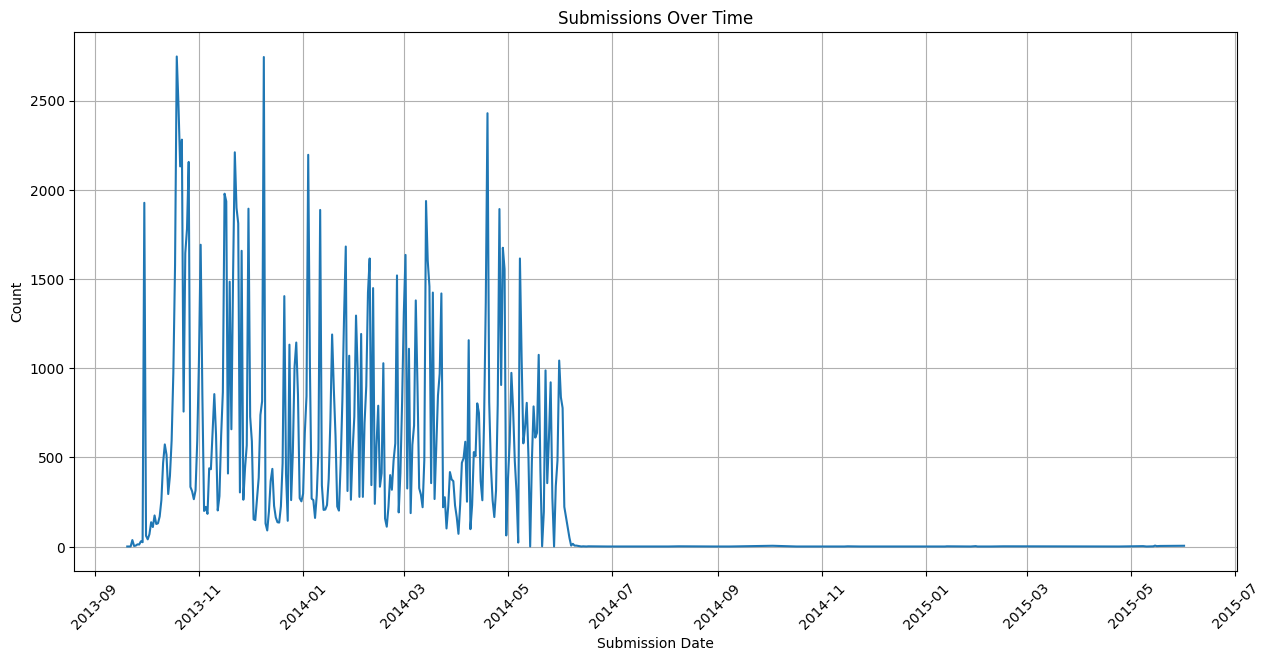
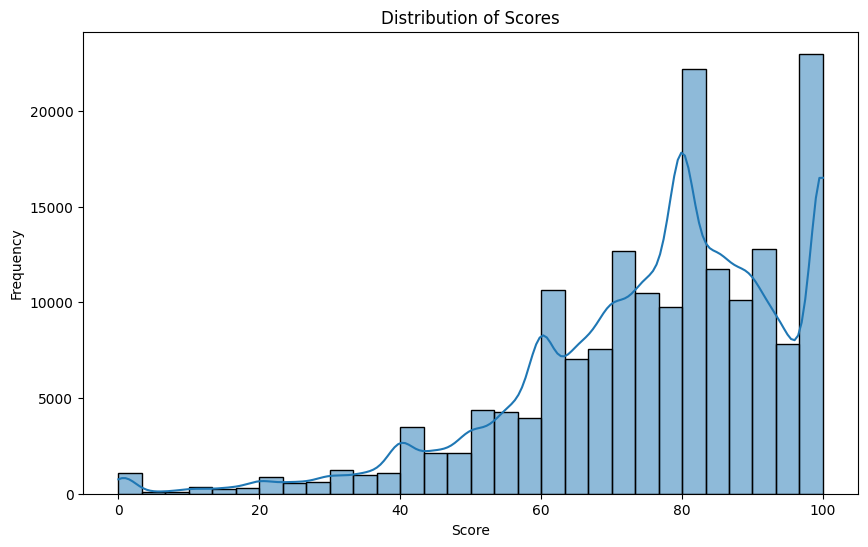

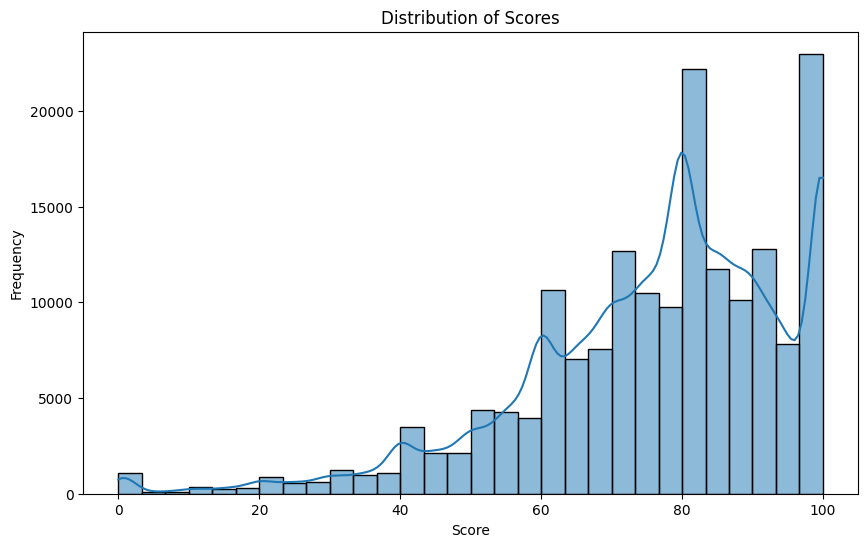

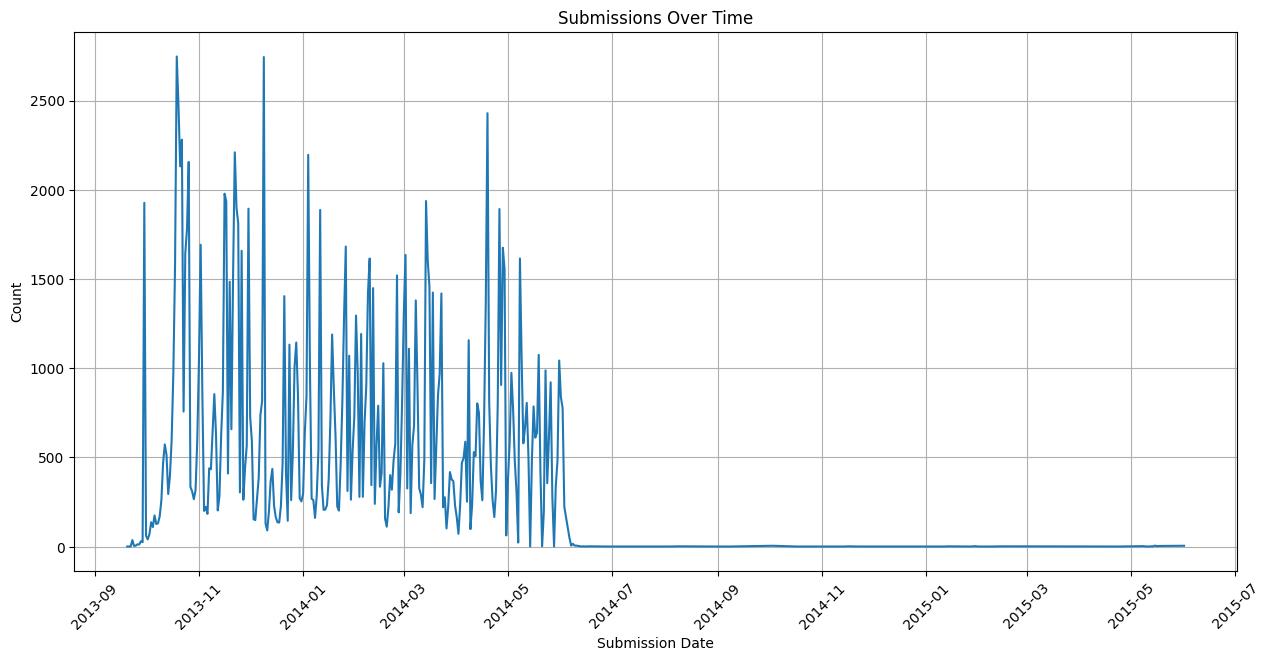

In [44]:
# Load the preprocessed student assessment data
student_assessment_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_assessment.csv"
student_assessment = pd.read_csv(student_assessment_path, parse_dates=['submission_date'])

# Distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(student_assessment['score'], bins=30, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Submissions over time
plt.figure(figsize=(15, 7))
plt.plot(student_assessment['submission_date'].value_counts().sort_index())
plt.title('Submissions Over Time')
plt.xlabel('Submission Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



## 2.4: EDA on Assessments Data

In this code block, we perform exploratory data analysis (EDA) on the assessments dataset to understand the distribution of assessment types, weights, and the timing of assessments.

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed assessments data

assessments_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_assessments.csv"
assessments = pd.read_csv(assessments_path, parse_dates=['assessment_date'])

# Distribution of assessment types

plt.figure(figsize=(10, 6))
sns.countplot(x='assessment_type', data=assessments, palette='Set2')
plt.title('Distribution of Assessment Types')
plt.xlabel('Assessment Type')
plt.ylabel('Count')
plt.show()

# Assessment weights distribution

plt.figure(figsize=(10, 6))
sns.histplot(assessments['weight'], bins=20, kde=True)
plt.title('Distribution of Assessment Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

# Assessments over time

plt.figure(figsize=(15, 7))
plt.plot(assessments['assessment_date'].value_counts().sort_index())
plt.title('Assessments Over Time')
plt.xlabel('Assessment Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
```

**Interpretation of Plots:**

1. **Distribution of Assessment Types:**
   - The bar plot shows the count of different assessment types (e.g., TMA, Exam, CMA). The most common type is TMA (Tutor Marked Assignment), followed by CMA (Computer Marked Assignment), and Exam.

   ![image.png](notebooks/images/image.png)

2. **Assessment Weights Distribution:**
   - This histogram displays the distribution of assessment weights. Most assessments have a lower weight, with a significant number clustered around zero. There are also peaks at higher weights, indicating some assessments carry more importance.

   ![image-2.png](notebooks/images/image-2.png)

3. **Assessments Over Time:**
   - The line plot shows the number of assessments conducted over time. Peaks represent periods with a high number of assessments, which could correspond to exam periods or deadlines for assignments.

   ![image-3.png](notebooks/images/image-3.png)

This block of EDA highlights the nature of assessments in terms of type, weight, and their distribution over time, providing insights into the structure and scheduling of assessments within the dataset.
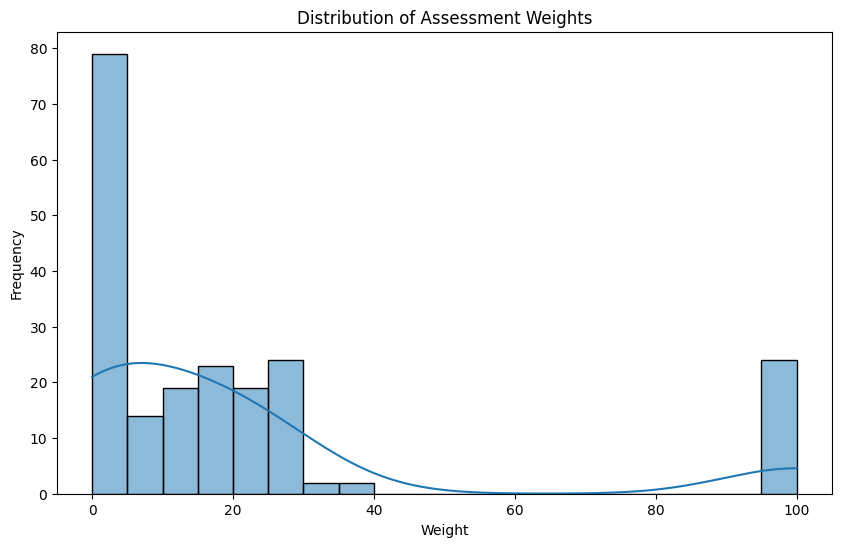
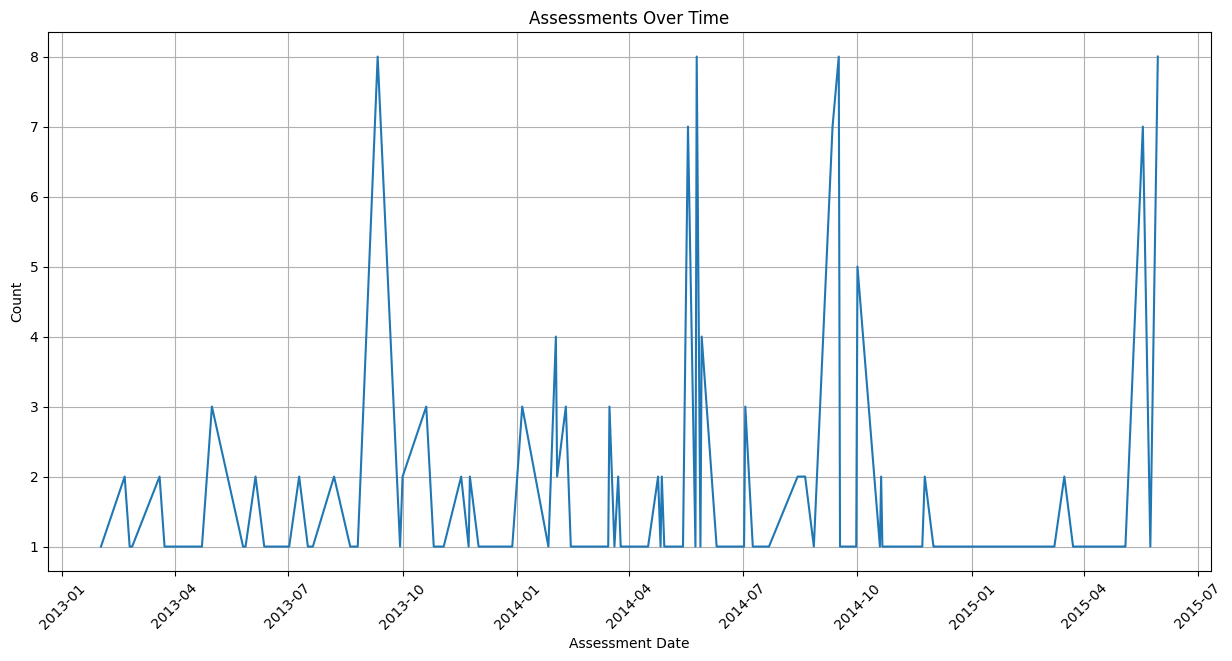
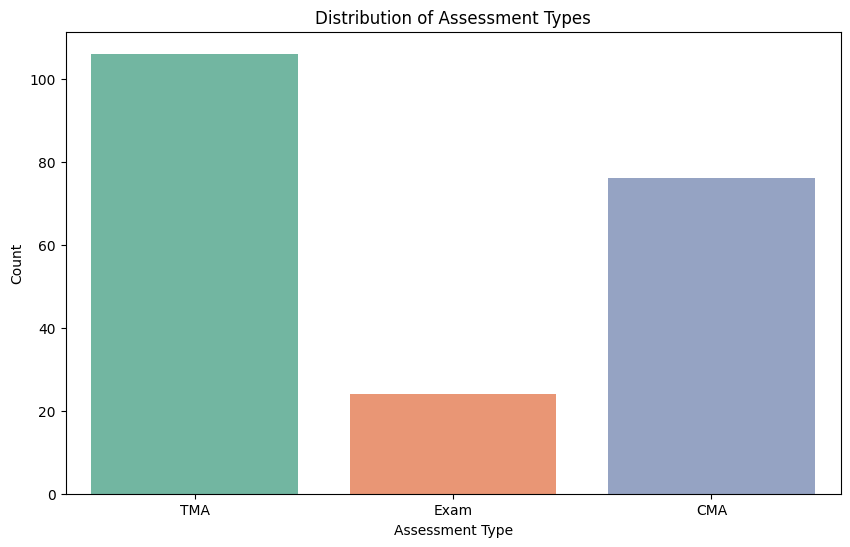

C:\Users\parha\AppData\Local\Temp\ipykernel_20388\3482440047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='assessment_type', data=assessments, palette='Set2')


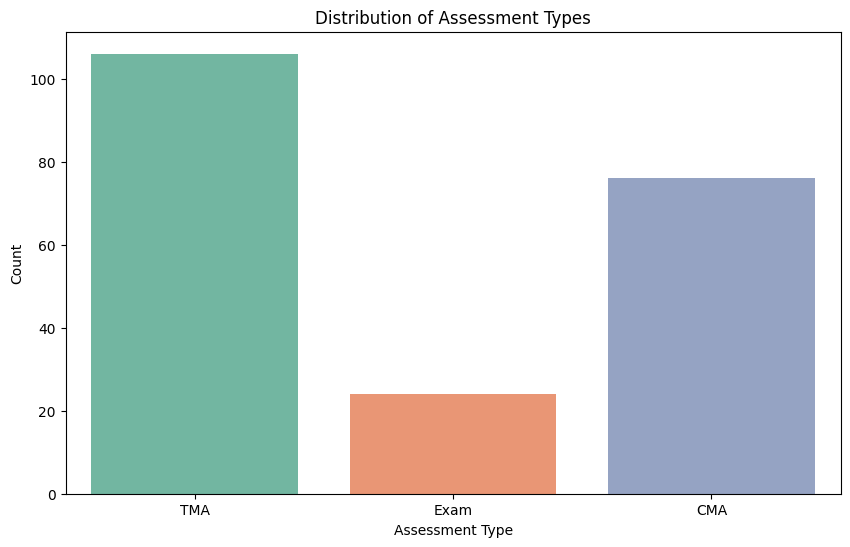

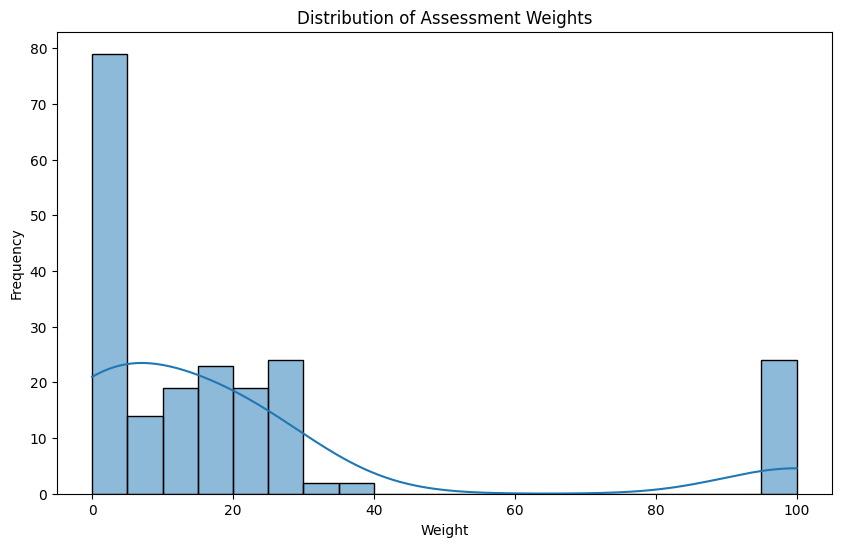

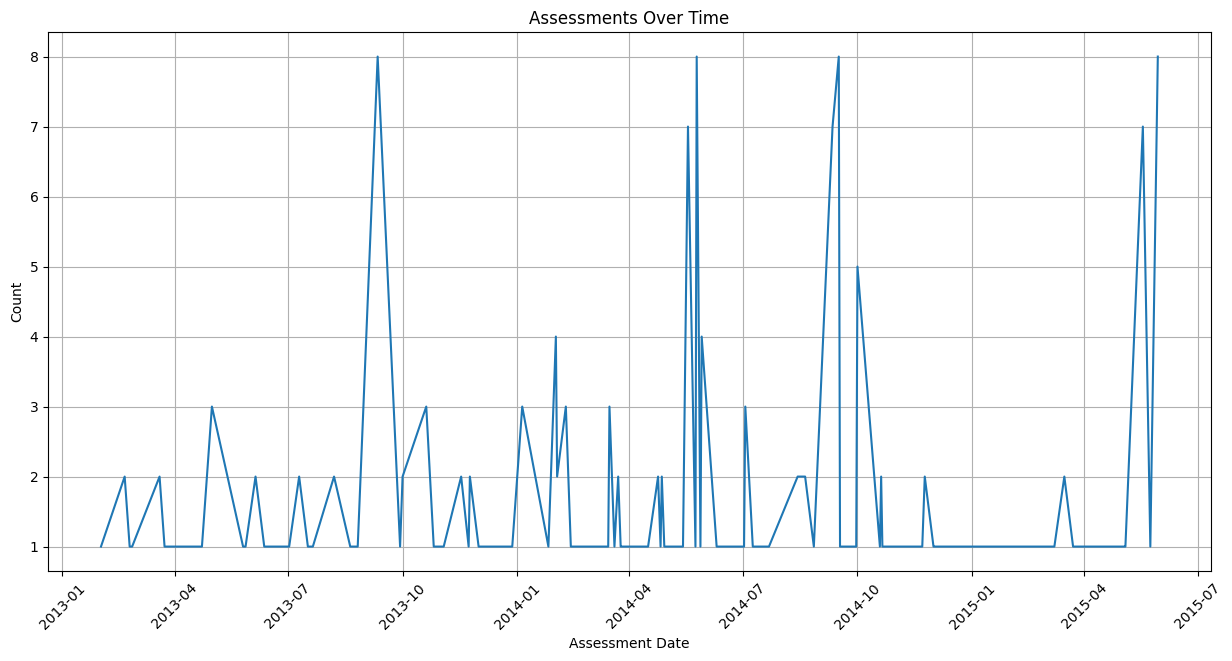

In [3]:
# Load the preprocessed assessments data
assessments_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_assessments.csv"
assessments = pd.read_csv(assessments_path, parse_dates=['assessment_date'])

# Distribution of assessment types
plt.figure(figsize=(10, 6))
sns.countplot(x='assessment_type', data=assessments, palette='Set2')
plt.title('Distribution of Assessment Types')
plt.xlabel('Assessment Type')
plt.ylabel('Count')
plt.show()

# Assessment weights distribution
plt.figure(figsize=(10, 6))
sns.histplot(assessments['weight'], bins=20, kde=True)
plt.title('Distribution of Assessment Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

# Assessments over time
plt.figure(figsize=(15, 7))
plt.plot(assessments['assessment_date'].value_counts().sort_index())
plt.title('Assessments Over Time')
plt.xlabel('Assessment Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## 2.5: EDA on Courses Data

In this code block, we perform exploratory data analysis (EDA) on the courses dataset to understand the distribution of courses across different code modules.

```python
# Load the preprocessed courses data

courses_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_courses.csv"
courses = pd.read_csv(courses_path, parse_dates=['presentation_start'])

# Distribution of courses by code_module

plt.figure(figsize=(10, 6))
sns.countplot(x='code_module', data=courses, palette='Set2')
plt.title('Distribution of Courses by Code Module')
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.show()
```

**Interpretation of Plot:**

1. **Distribution of Courses by Code Module:**
   - The bar plot shows the count of courses grouped by different code modules. Each bar represents a different module, and the height of the bar indicates the number of courses in that module. 
   - This plot helps in understanding which modules have the most or least number of courses.

   ![image.png](notebooks/images/image.png)

This analysis provides insights into the distribution of courses across various code modules, highlighting the modules with higher or lower counts of courses.
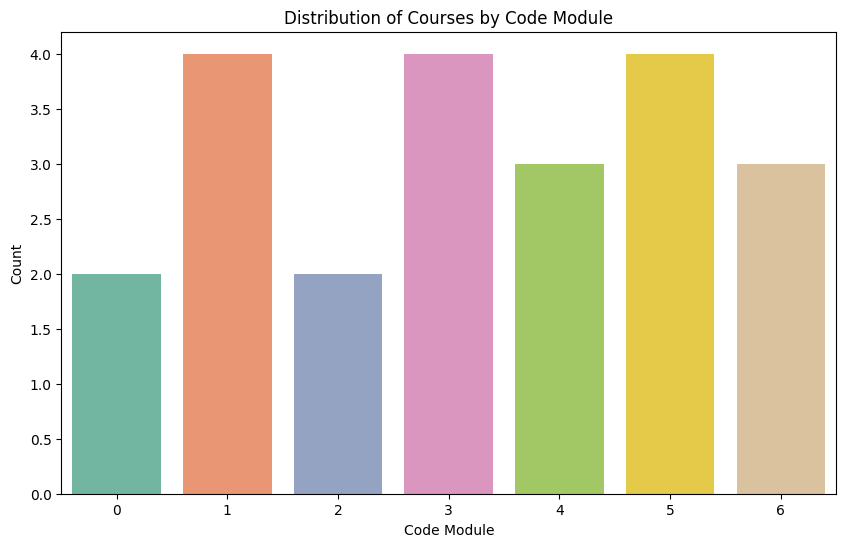

C:\Users\parha\AppData\Local\Temp\ipykernel_20388\2579823729.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='code_module', data=courses, palette='Set2')


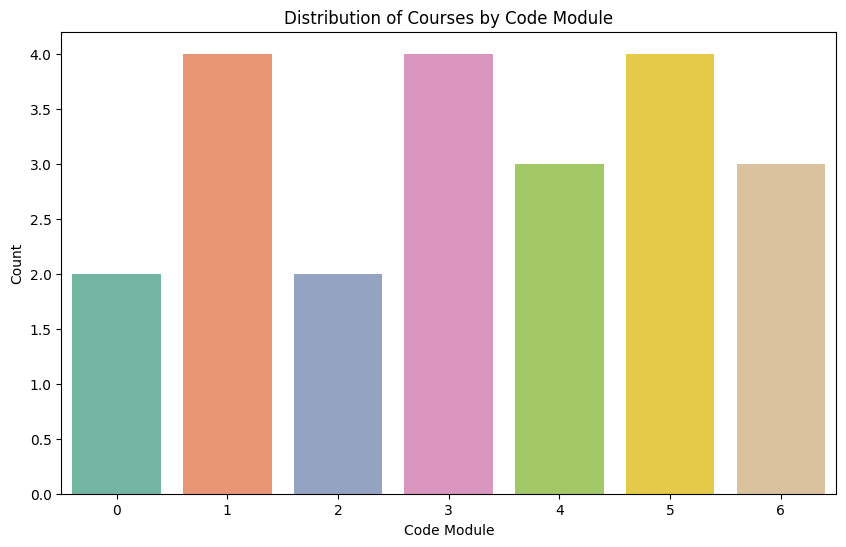

In [4]:
# Load the preprocessed courses data
courses_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_courses.csv"
courses = pd.read_csv(courses_path, parse_dates=['presentation_start'])

# Distribution of courses by code_module
plt.figure(figsize=(10, 6))
sns.countplot(x='code_module', data=courses, palette='Set2')
plt.title('Distribution of Courses by Code Module')
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.show()


## 2.6: EDA for VLE Dataset

In this step, we perform EDA on the preprocessed Virtual Learning Environment (VLE) data to understand the distribution of different activity types and their association with different code modules.

```python
# Load the preprocessed VLE data

vle_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_vle.csv"
vle = pd.read_csv(vle_path, parse_dates=['presentation_start'])

# Distribution of activity types

plt.figure(figsize=(10, 6))
sns.countplot(x='activity_type', data=vle, palette='Set2')
plt.title('Distribution of Activity Types')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Distribution of VLE activities by code module

plt.figure(figsize=(10, 6))
sns.countplot(x='code_module', data=vle, palette='Set2')
plt.title('Distribution of VLE Activities by Code Module')
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.show()
```

1. **Loading the Dataset:**
   - The VLE dataset is loaded from the preprocessed CSV file.
   - The `presentation_start` column is parsed as dates.

2. **Distribution of Activity Types:**
   - A count plot is generated to show the distribution of different activity types.
   - The x-axis represents the activity types, and the y-axis represents their counts.

3. **Distribution of VLE Activities by Code Module:**
   - A count plot is generated to show the distribution of VLE activities across different code modules.
   - The x-axis represents the code modules, and the y-axis represents their counts.

**Interpretation of Plots:**

- **Distribution of Activity Types:**
  - The bar plot shows the frequency of each activity type in the VLE dataset.
  - This helps to identify the most common types of activities within the VLE platform.

![image.png](notebooks/images/image.png)

- **Distribution of VLE Activities by Code Module:**
  - The bar plot shows how VLE activities are distributed among different code modules.
  - This visualization helps to understand which modules have the highest number of associated VLE activities.

![image-2.png](notebooks/images/image-2.png)

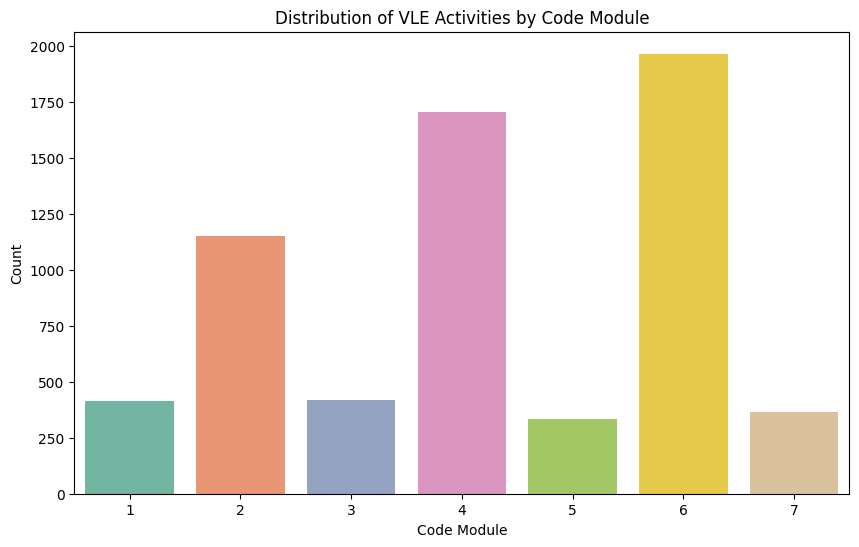
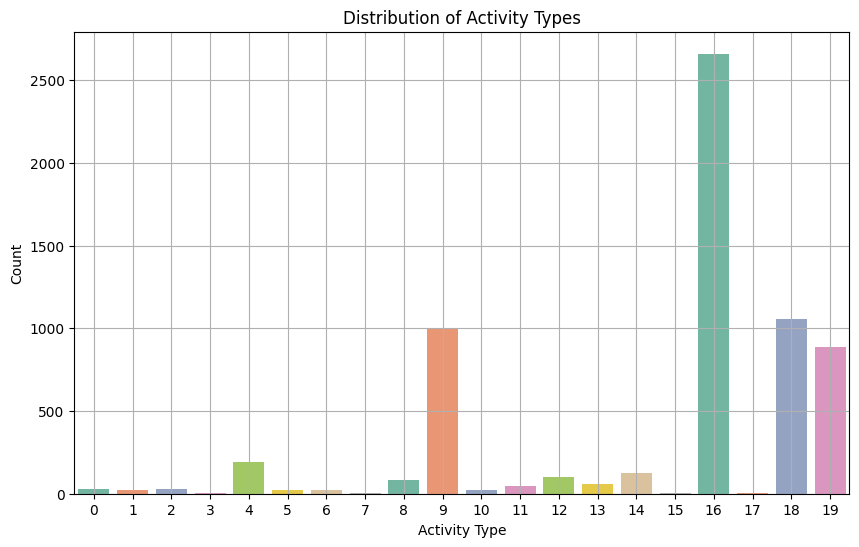

C:\Users\parha\AppData\Local\Temp\ipykernel_30092\559071817.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='activity_type', data=vle, palette='Set2')


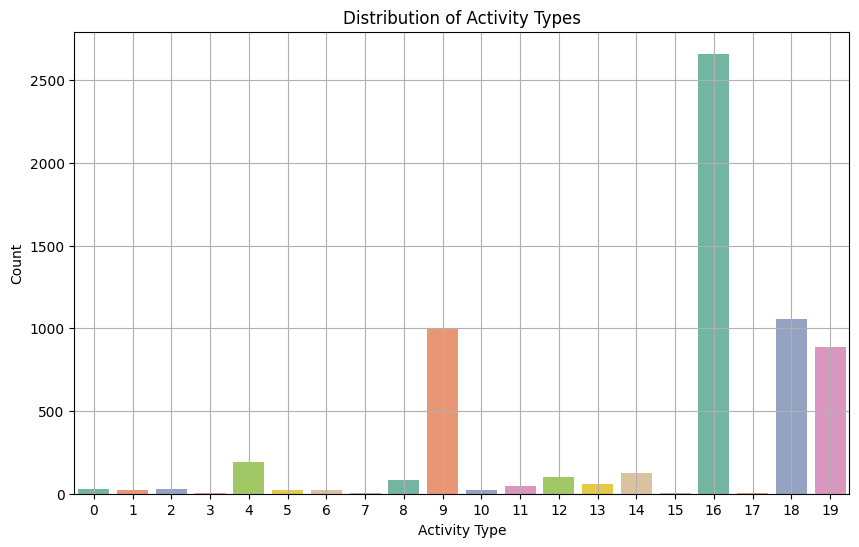

C:\Users\parha\AppData\Local\Temp\ipykernel_30092\559071817.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='code_module', data=vle, palette='Set2')


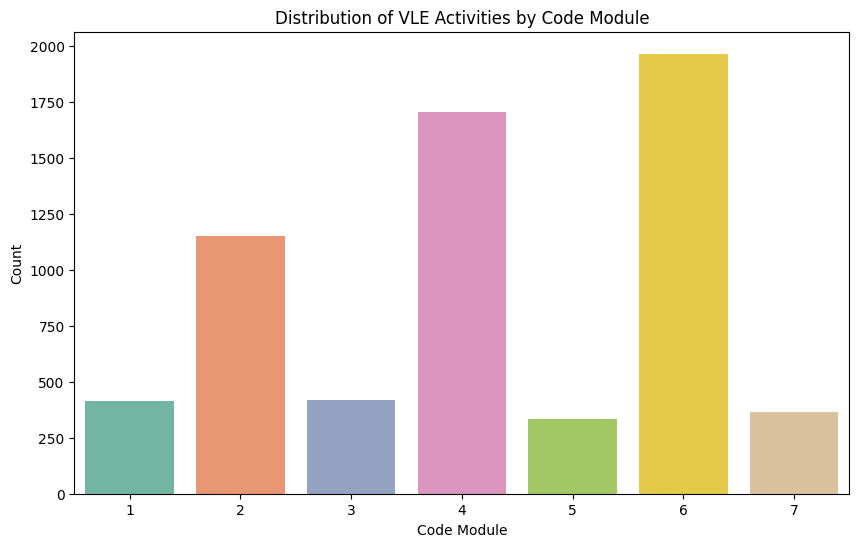

In [63]:
# Load the preprocessed VLE data
vle_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_vle.csv"
vle = pd.read_csv(vle_path, parse_dates=['presentation_start'])

# Distribution of activity types
plt.figure(figsize=(10, 6))
sns.countplot(x='activity_type', data=vle, palette='Set2')
plt.title('Distribution of Activity Types')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Distribution of VLE activities by code module
plt.figure(figsize=(10, 6))
sns.countplot(x='code_module', data=vle, palette='Set2')
plt.title('Distribution of VLE Activities by Code Module')
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.show()


## 2.7: EDA on Student Registration 

In this sub-step, we perform EDA on the preprocessed student registration data to understand the patterns and trends related to student registrations and unregistrations over time.

**Code Explanation:**

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed student registration data

student_registration_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_registration.csv"
student_registration = pd.read_csv(student_registration_path, parse_dates=['registration_date', 'unregistration_date'])

# Distribution of registration dates

plt.figure(figsize=(15, 7))
plt.hist(student_registration['registration_date'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Registration Dates')
plt.xlabel('Registration Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Distribution of unregistration dates

plt.figure(figsize=(15, 7))
plt.hist(student_registration['unregistration_date'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Unregistration Dates')
plt.xlabel('Unregistration Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Distribution of registrations by code module

plt.figure(figsize=(10, 6))
sns.countplot(x='code_module', data=student_registration, palette='Set2')
plt.title('Distribution of Registrations by Code Module')
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.show()

# Registrations and unregistrations over time

plt.figure(figsize=(15, 7))
plt.plot(student_registration['registration_date'].value_counts().sort_index(), label='Registrations')
plt.plot(student_registration['unregistration_date'].value_counts().sort_index(), label='Unregistrations', color='red')
plt.title('Registrations and Unregistrations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
```

**Interpretation of Plots:**

1. **Distribution of Registration Dates:**

   ![image.png](notebooks/images/image.png)

   - The histogram shows the distribution of registration dates.
   - Peaks are observed around the start of each semester, indicating that most registrations occur at these times.
   - The distribution helps identify the periods with the highest student registrations.

2. **Distribution of Unregistration Dates:**

   ![image-2.png](notebooks/images/image-2.png)

   - The histogram shows the distribution of unregistration dates.
   - Peaks around certain periods may indicate critical drop-out points or periods of high unregistration.
   - Understanding these periods helps in identifying when students are most likely to drop out and could lead to insights for interventions.

3. **Distribution of Registrations by Code Module:**

   ![image-3.png](notebooks/images/image-3.png)

   - This count plot shows the number of registrations across different code modules.
   - Some modules have higher registration counts, indicating their popularity or compulsory nature.

4. **Registrations and Unregistrations Over Time:**

   ![image-4.png](notebooks/images/image-4.png)

   - The line plot shows the count of registrations and unregistrations over time.
   - Blue line represents registrations and red line represents unregistrations.
   - This plot helps visualize trends and patterns over time, such as periods with high registrations or significant unregistrations.

By analyzing these plots, we gain valuable insights into the registration behaviors, identifying key periods for interventions and understanding the popularity of different modules. This information is crucial for making data-driven decisions to improve student retention and engagement.
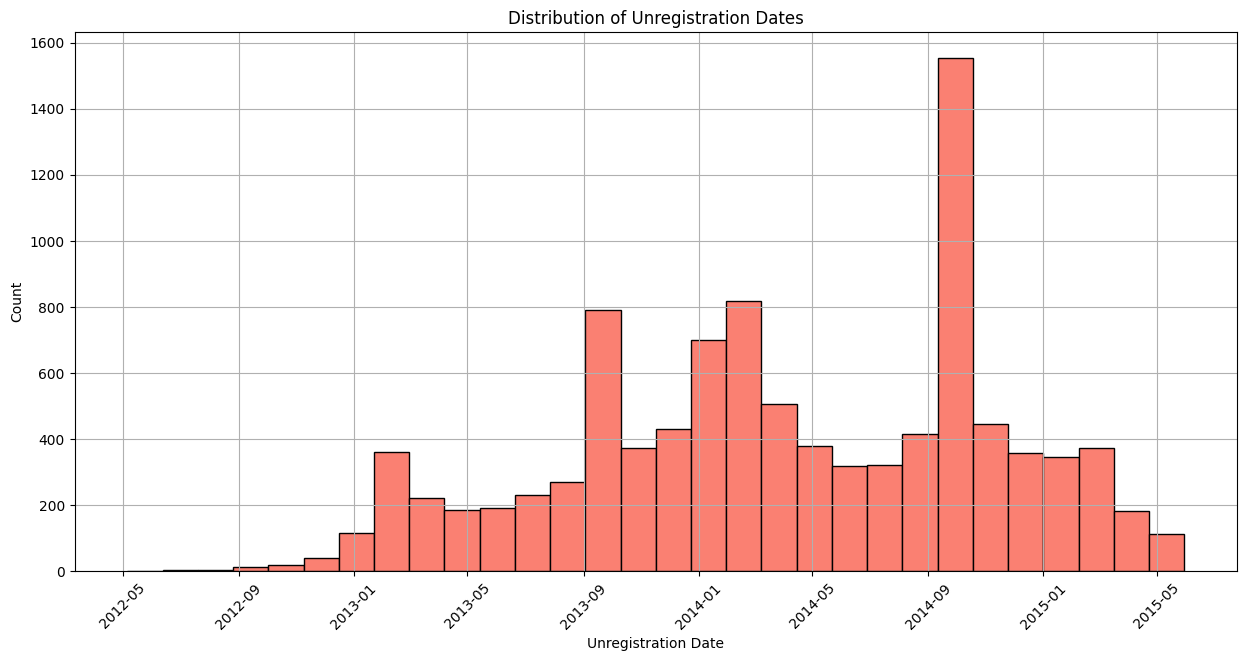
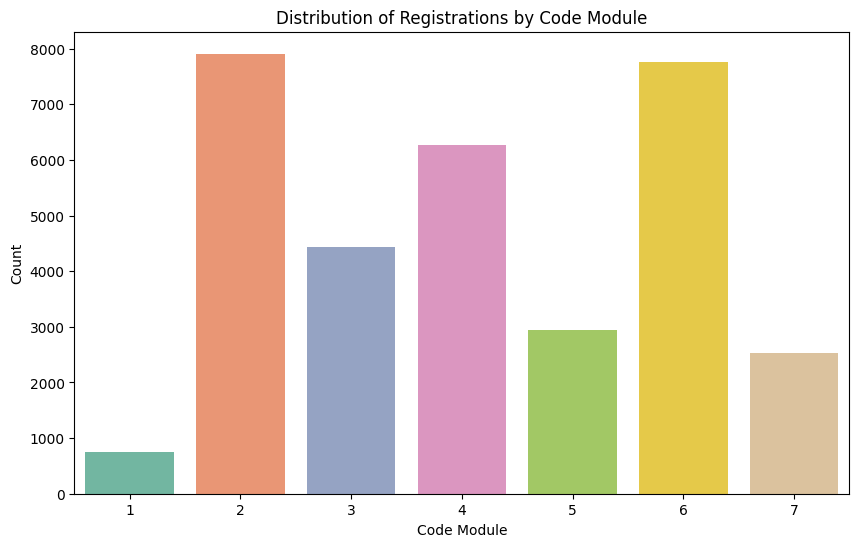
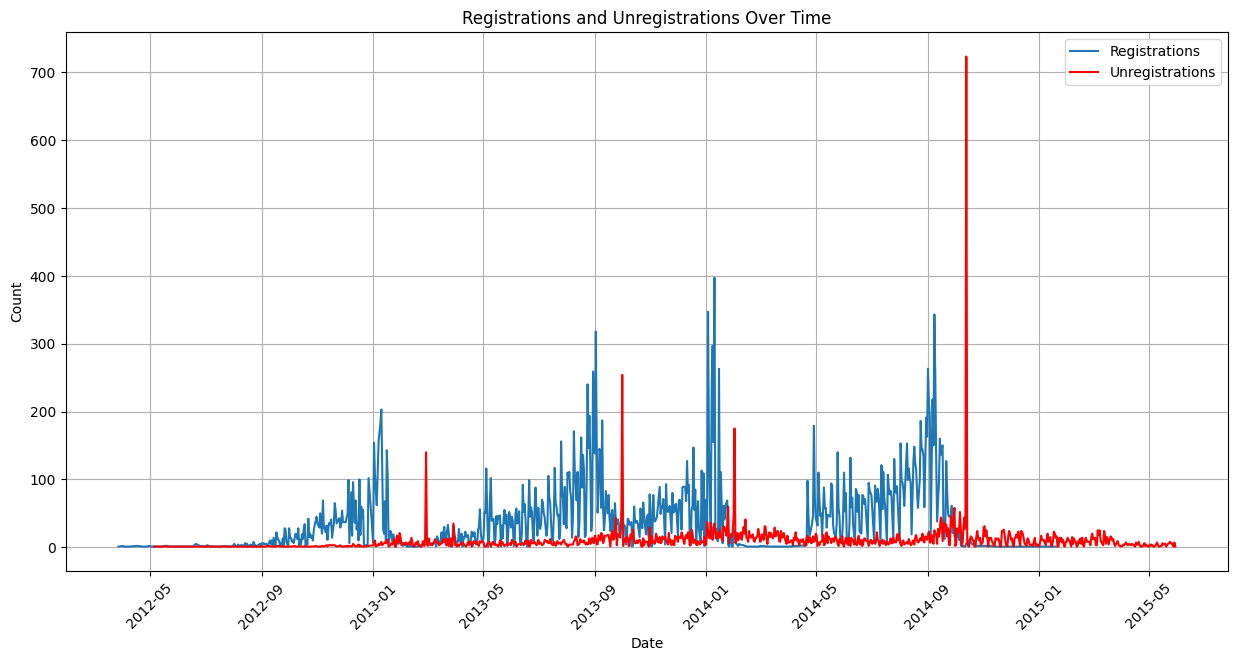
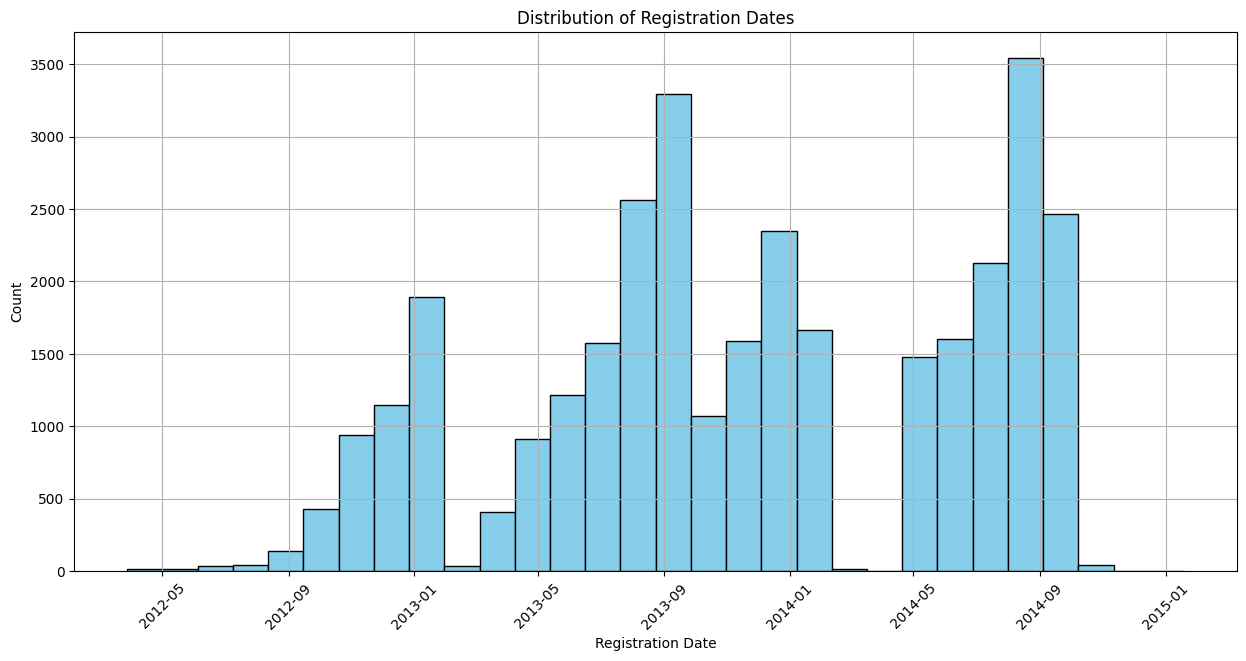

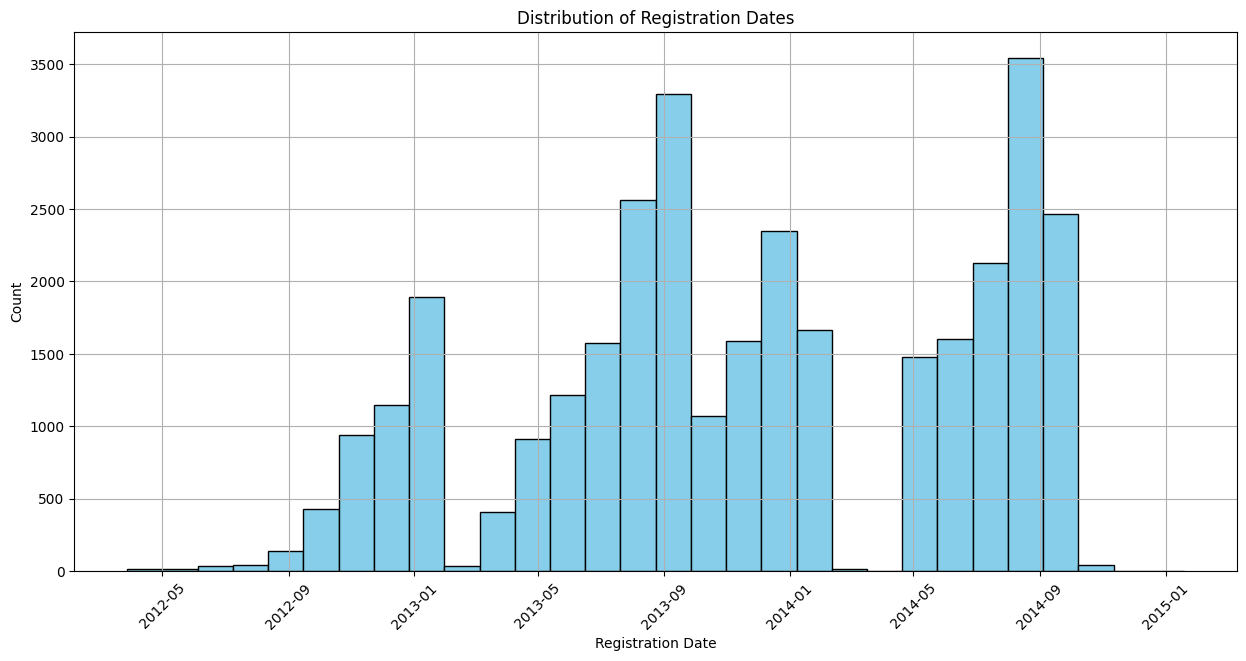

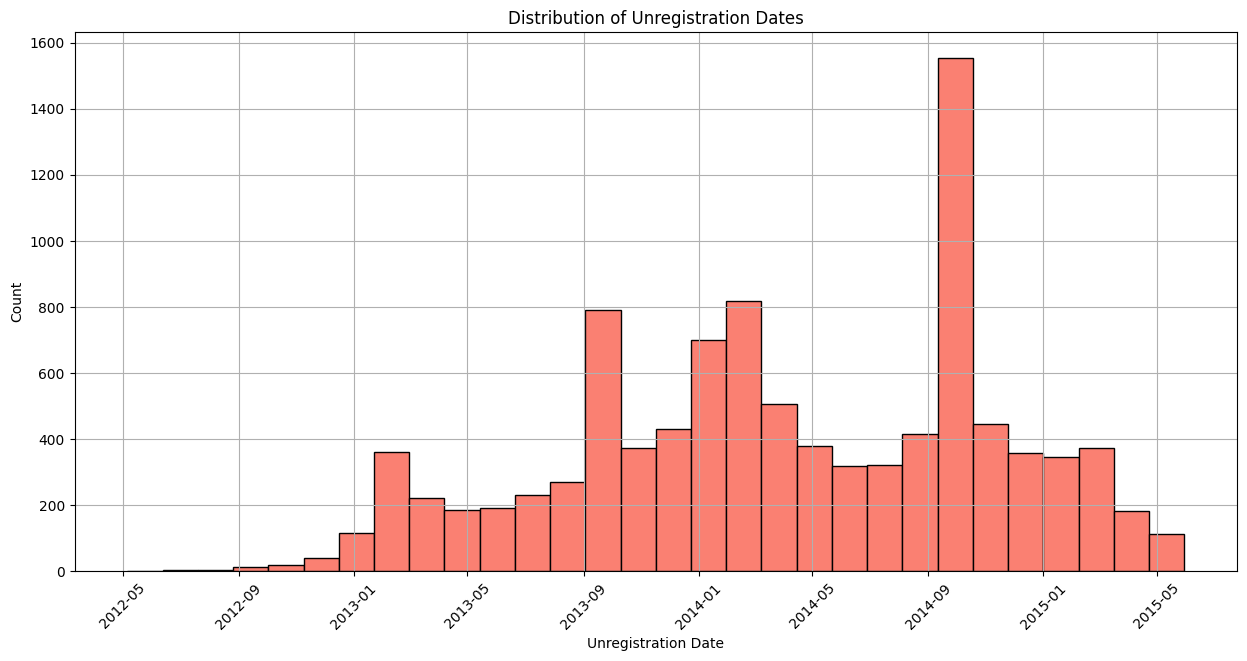

C:\Users\parha\AppData\Local\Temp\ipykernel_30092\1443188777.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='code_module', data=student_registration, palette='Set2')


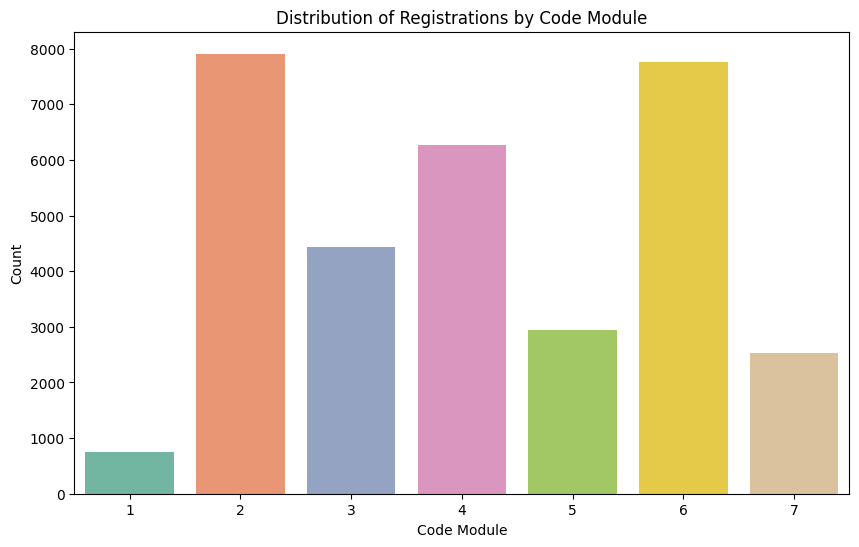

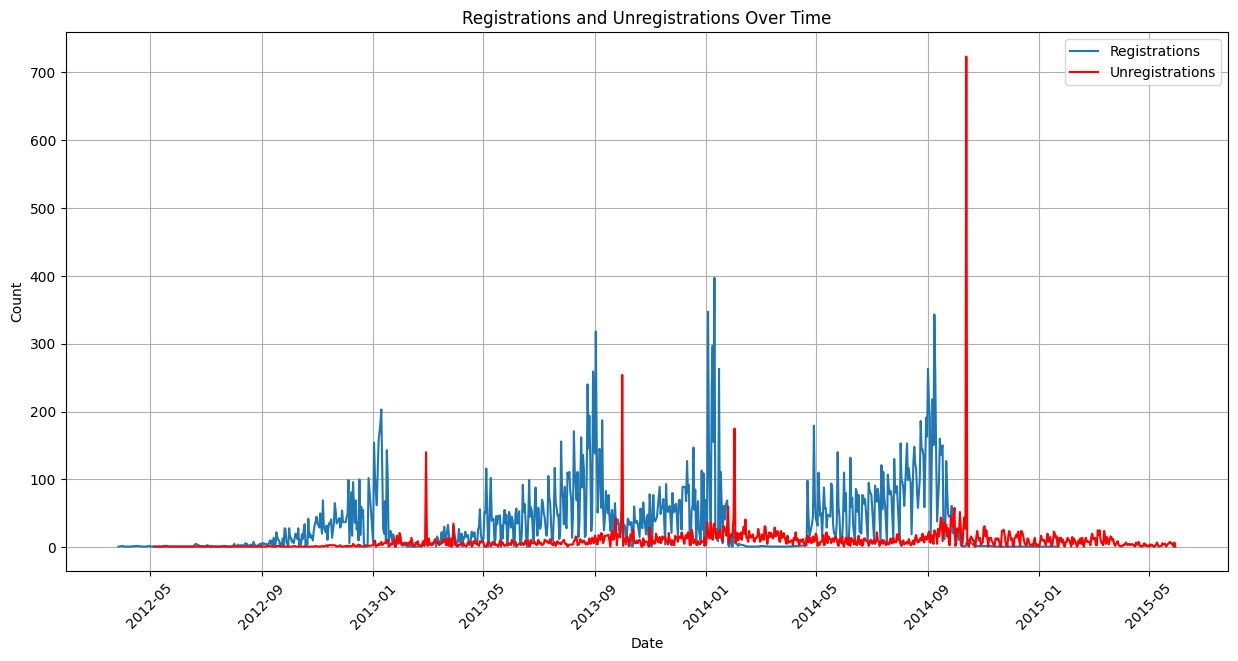

In [64]:
# Load the preprocessed student registration data
student_registration_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_registration.csv"
student_registration = pd.read_csv(student_registration_path, parse_dates=['registration_date', 'unregistration_date'])

# Distribution of registration dates
plt.figure(figsize=(15, 7))
plt.hist(student_registration['registration_date'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Registration Dates')
plt.xlabel('Registration Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Distribution of unregistration dates
plt.figure(figsize=(15, 7))
plt.hist(student_registration['unregistration_date'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Unregistration Dates')
plt.xlabel('Unregistration Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Distribution of registrations by code module
plt.figure(figsize=(10, 6))
sns.countplot(x='code_module', data=student_registration, palette='Set2')
plt.title('Distribution of Registrations by Code Module')
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.show()

# Registrations and unregistrations over time
plt.figure(figsize=(15, 7))
plt.plot(student_registration['registration_date'].value_counts().sort_index(), label='Registrations')
plt.plot(student_registration['unregistration_date'].value_counts().sort_index(), label='Unregistrations', color='red')
plt.title('Registrations and Unregistrations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## 2.8: EDA on Assessments

In this sub-step, we perform additional EDA on the preprocessed assessments data to understand the distribution of assessment dates.


```python
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed assessments data

assessments_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_assessments.csv"
assessments = pd.read_csv(assessments_path, parse_dates=['assessment_date'])

# Distribution of assessment dates

plt.figure(figsize=(15, 7))
plt.hist(assessments['assessment_date'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Assessment Dates')
plt.xlabel('Assessment Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
```

**Interpretation of Plot:**

![image.png](notebooks/images/image.png)

- **Distribution of Assessment Dates:**
  - The histogram shows the distribution of assessment dates.
  - Peaks are observed during certain periods, likely aligning with the academic calendar's assessment schedules.
  - This distribution helps identify the busiest periods for assessments, allowing for better planning and resource allocation.

By analyzing this plot, we can understand the scheduling of assessments and ensure that the distribution aligns with expectations. This insight can help in identifying any potential issues with the timing of assessments and make data-driven decisions for future scheduling.
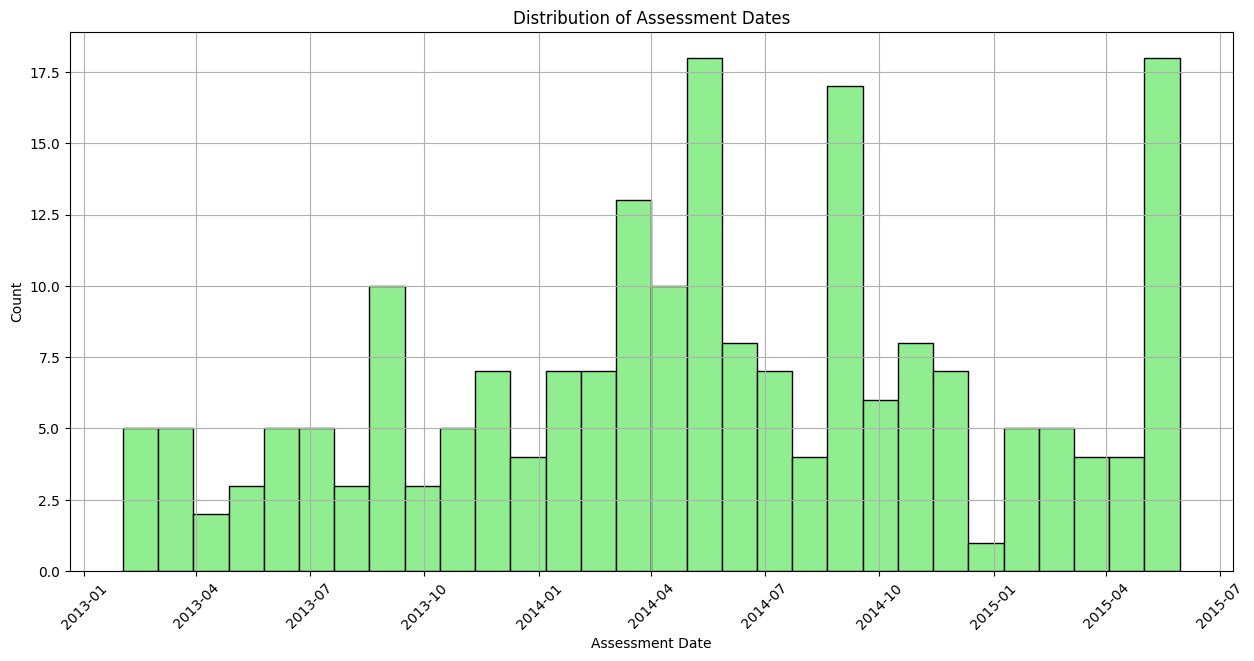

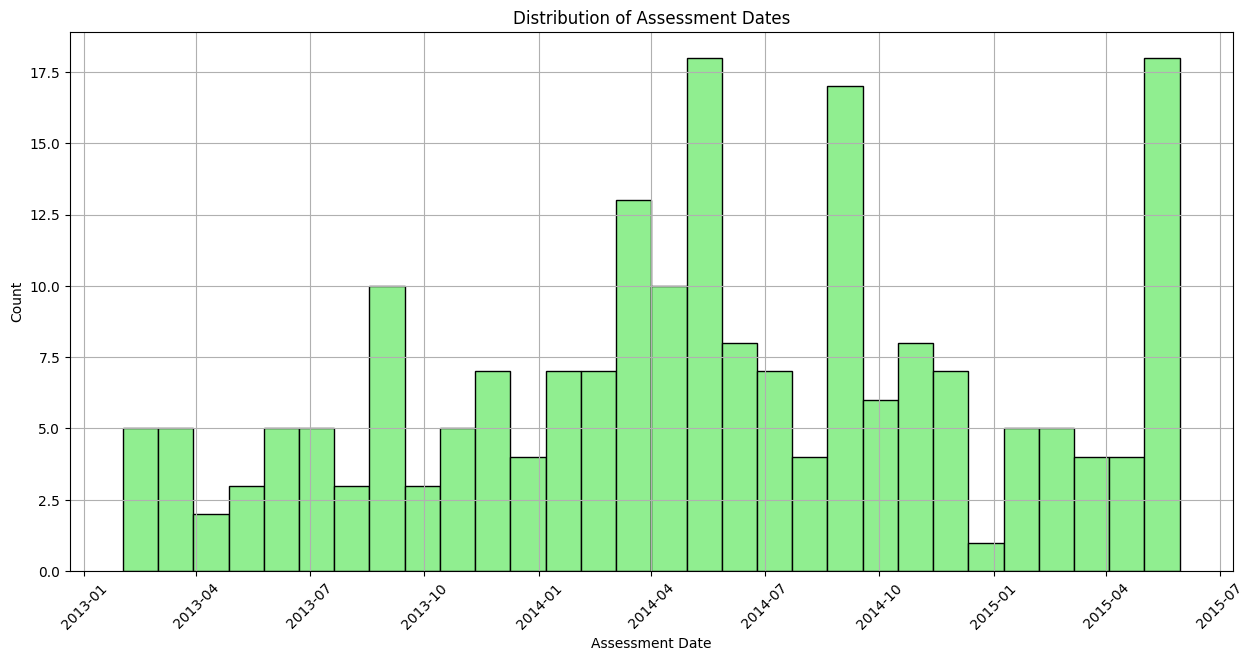

In [53]:
# Load the preprocessed assessments data
assessments_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_assessments.csv"
assessments = pd.read_csv(assessments_path, parse_dates=['assessment_date'])

# Distribution of assessment dates
plt.figure(figsize=(15, 7))
plt.hist(assessments['assessment_date'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Assessment Dates')
plt.xlabel('Assessment Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## EDA Conclusion 

The Exploratory Data Analysis (EDA) step provided significant insights into the student data. Key findings include:

1. **Gender Distribution**:
   - Male and female students are fairly balanced, with a slight majority of male students.
   
2. **Region Distribution**:
   - Students are distributed across various regions, with the highest numbers from the East Anglian Region and Scotland.
   
3. **Highest Education Level**:
   - Most students have A Level or equivalent qualifications, followed by those with Lower Than A Level qualifications.
   
4. **Age Band**:
   - The majority of students fall within the 0-35 age band.
   
5. **Disability Status**:
   - The majority of students do not have a disability.
   
6. **Final Results**:
   - Most students have passed, but a significant number have withdrawn or failed.
   
7. **Studied Credits**:
   - Most students have studied up to 60 credits, with a notable peak at 240 credits.
   
8. **Previous Attempts**:
   - The majority of students are attempting the module for the first time.
   
9. **Enrollment Over Time**:
   - There is an increasing trend in enrollments over the analyzed period.
   
10. **Interactions Over Time**:
    - Student interactions show significant peaks, likely corresponding to key academic periods.
    
11. **Scores Distribution**:
    - Scores are spread across the range, with peaks around higher scores.
    
12. **Assessment Submissions**:
    - Submissions are clustered around specific periods, indicating structured assessment timelines.
    
13. **Courses and VLE Activities**:
    - Distribution varies by code module and activity type, providing insights into the usage patterns.
    
14. **Registration and Unregistration Trends**:
    - Registration and unregistration dates show clear peaks around the start and end of semesters.
    
15. **Assessment Dates**:
    - Assessments are spread throughout the academic calendar, with noticeable peaks.


# step 3: Anomaly Detection and Forecasting with Different Models



## **Introduction:**

This section of the project focuses on detecting anomalies in the Virtual Learning Environment (VLE) interactions data and forecasting future interactions using different models. We start by loading and preprocessing the data, then proceed with anomaly detection using z-score. Subsequently, we use the Seasonal Autoregressive Integrated Moving Average (SARIMA) model for forecasting.


## 1: SARIMAX

### 1.1 Import Libraries

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy.stats import zscore
```

- `pandas` and `numpy` are used for data manipulation.
- `matplotlib` and `mdates` are for plotting and formatting dates on plots.
- `statsmodels` provides classes and functions for statistical models.
- `zscore` from `scipy.stats` helps in anomaly detection.

### 1.2 Load and Preprocess Data

```python
merged_vle_data_path = r"D:\study\Hardware and Software per Big Data mod B\project\time_series_vle_interactions.csv"
merged_vle_data = pd.read_csv(merged_vle_data_path, parse_dates=['Date'])

filtered_data = merged_vle_data[merged_vle_data['Date'] < '2015-05-01']
filtered_data.set_index('Date', inplace=True)
filtered_data = filtered_data.asfreq('D')
filtered_data['log_clicks'] = np.log(filtered_data['Total_Clicks'].replace(0, np.nan)).dropna()
```

- Load the preprocessed VLE interactions data.
- Filter out the period where interactions drop to zero.
- Set the `Date` column as the index and ensure the index has a frequency.
- Apply log transformation to avoid issues with log(0).

### 1.3 Anomaly Detection

```python
filtered_data['z_score'] = zscore(filtered_data['log_clicks'])
anomalies = filtered_data[np.abs(filtered_data['z_score']) > 2]
print(anomalies)
```

- Calculate z-score for the log-transformed clicks.
- Detect anomalies as data points where the absolute value of z-score is greater than 2.

### 1.4 Plotting Anomalies

```python
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['log_clicks'], label='Log Clicks')
plt.scatter(anomalies.index, anomalies['log_clicks'], color='red', label='Anomalies')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('VLE Interactions with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Log Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
```
![image.png](notebooks/images/image.png)
- Plot the log-transformed clicks and highlight anomalies in red.

### 1.5 Imputing Anomalies and Differencing

```python
filtered_data['log_clicks'] = filtered_data['log_clicks'].mask(np.abs(filtered_data['z_score']) > 2)
filtered_data['log_clicks'].interpolate(method='linear', inplace=True)
filtered_data['diff_clicks'] = filtered_data['log_clicks'].diff().dropna()
```

- Impute anomalies with linear interpolation.
- Difference the log-transformed clicks to make the data stationary.

### 1.6 Stationarity Test

```python
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value {}: {}'.format(key, value))
    return result

print("ADF Test on Differenced Data:")
adf_test(filtered_data['diff_clicks'].dropna())
```

- Perform the Augmented Dickey-Fuller (ADF) test to check for stationarity of the differenced data.

### 1.7 Adding Lag Features

```python
lags = [1, 2, 3, 7, 14, 21, 28]
for lag in lags:
    filtered_data[f'lag_{lag}'] = filtered_data['diff_clicks'].shift(lag)
filtered_data.dropna(inplace=True)
```

- Add lag features to capture temporal dependencies.

### 1.8 Fitting SARIMA Model

```python
best_params = ((2, 0, 2), (0, 0, 1, 12))
exog = filtered_data[[f'lag_{lag}' for lag in lags]]
mod = sm.tsa.statespace.SARIMAX(filtered_data['diff_clicks'],
                                exog=exog,
                                order=best_params[0],
                                seasonal_order=best_params[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(maxiter=200, disp=False)
print(results.summary())
```

- Fit a SARIMA model with predefined parameters to the differenced clicks.
- Print the summary of the model.

### 1.9 Forecasting Future Interactions

```python
forecast_steps = 240
pred_uc = results.get_forecast(steps=forecast_steps, exog=exog[-forecast_steps:])
pred_ci = pred_uc.conf_int()

plt.figure(figsize=(15, 7))
plt.plot(filtered_data['diff_clicks'], label='Observed')
pred_uc.predicted_mean.plot(label='Forecast', ax=plt.gca())
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Differenced Log Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
```
![image-2.png](notebooks/images/image-2.png)
- Forecast future interactions for 240 steps and plot the forecast with confidence intervals.

### 1.10 Model Evaluation

```python
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

y_forecasted = pred_uc.predicted_mean
y_truth = filtered_data['diff_clicks'][-forecast_steps:]

mae = mean_absolute_error(y_truth, y_forecasted)
mape = mean_absolute_percentage_error(y_truth, y_forecasted)

print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)
```

- Evaluate the model using Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE).

### 1.11 Reverse Transformation for Visualization

```python
def reverse_diff_log_transform(pred, original_data):
    pred_cumsum = pred.cumsum()
    pred_log_clicks = pred_cumsum + original_data.iloc[0]
    pred_clicks = np.exp(pred_log_clicks)
    return pred_clicks

predicted_clicks_in_sample = reverse_diff_log_transform(results.fittedvalues, filtered_data['log_clicks'])
predicted_clicks_out_sample = reverse_diff_log_transform(pred_uc.predicted_mean, filtered_data['log_clicks'][-1:])

combined_data = filtered_data['Total_Clicks'].copy()
combined_data = pd.concat([combined_data, predicted_clicks_out_sample])

plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Total_Clicks'], label='Observed')
plt.plot(predicted_clicks_in_sample, label='In-sample Forecast', color='green')
plt.plot(predicted_clicks_out_sample, label='Out-of-sample Forecast', color='orange')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('SARIMA Forecast in Original Scale')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
```
![image-3.png](notebooks/images/image-3.png)
- Reverse the differencing and log transformation to get the predictions in the original scale.
- Plot the predictions against the actual values in the original scale.

**Output Interpretation**

#### Anomalies Detected

```plaintext
            Total_Clicks  log_clicks   z_score
Date                                          
2013-01-18         12303    9.417598 -2.119667
2013-01-19         12431    9.427949 -2.100628
...
2014-12-22          9186    9.125436 -2.657098
```
- The anomalies detected show significant deviations in log clicks from the mean.

#### ADF Test Results

```plaintext
ADF Statistic: -6.482956205191446
p-value: 1.2814733342017852e-08
Critical Value 1%: -3.438399099271788
Critical Value 5%: -2.8650928286782857
Critical Value 10%: -2.568661836350634
```
- The ADF test confirms the differenced data is stationary (p-value < 0.05).
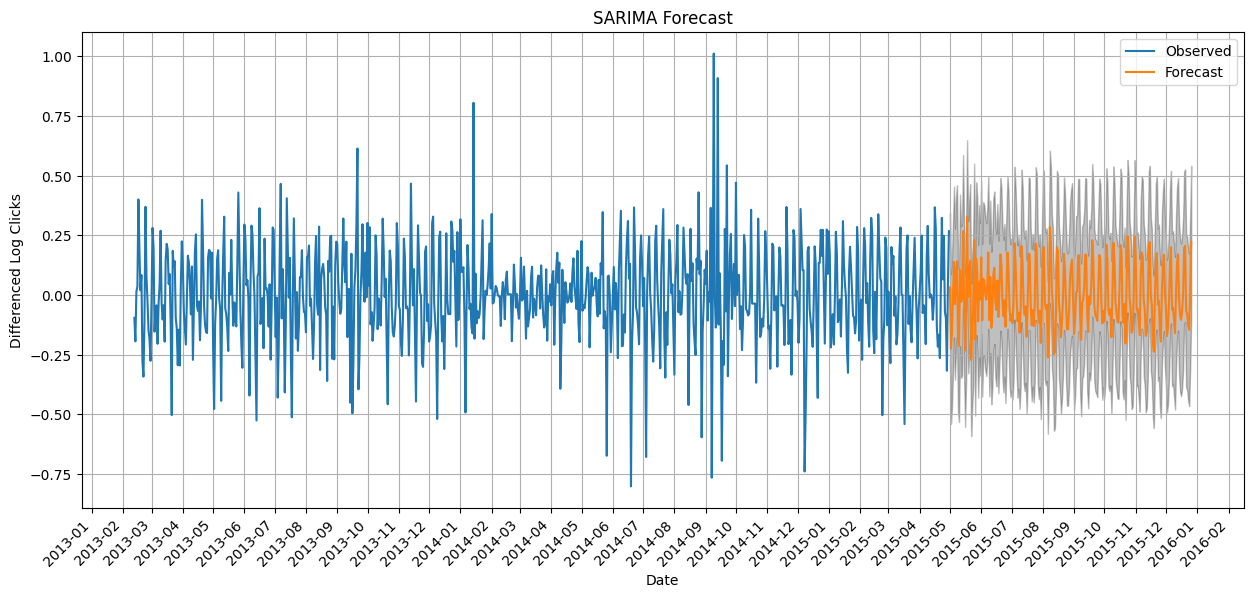
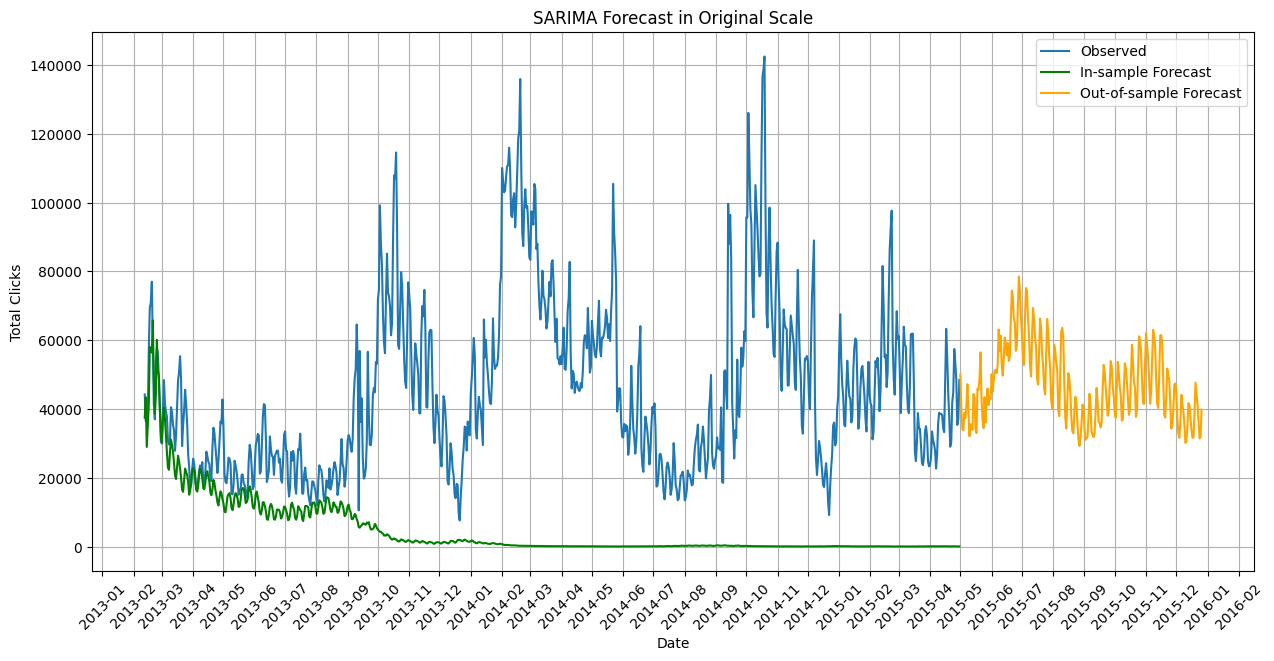
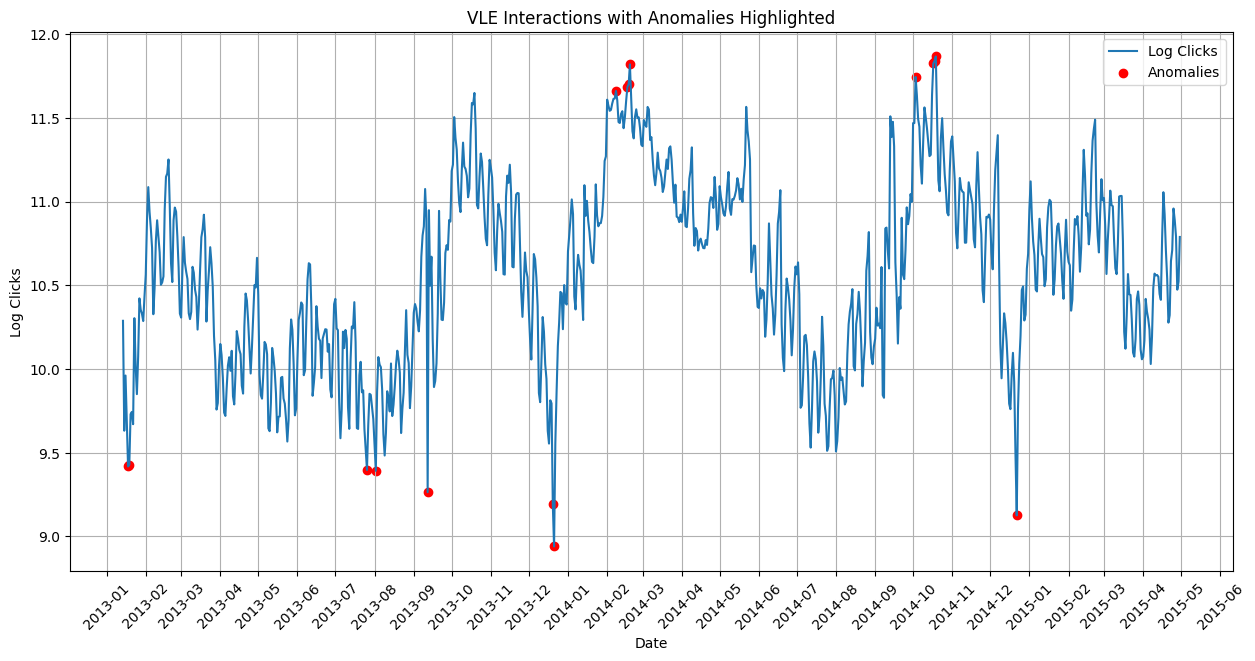

            Total_Clicks  log_clicks   z_score
Date                                          
2013-01-18         12303    9.417598 -2.119667
2013-01-19         12431    9.427949 -2.100628
2013-07-26         12047    9.396571 -2.158347
2013-08-02         11986    9.391495 -2.167685
2013-09-12         10552    9.264071 -2.402080
2013-12-20          9808    9.190954 -2.536579
2013-12-21          7627    8.939450 -2.999218
2014-02-08        115960   11.661001  2.007053
2014-02-17        118732   11.684624  2.050508
2014-02-18        120744   11.701428  2.081419
2014-02-19        135931   11.819903  2.299352
2014-10-03        126098   11.744815  2.161228
2014-10-17        136712   11.825632  2.309891
2014-10-18        138756   11.840472  2.337190
2014-10-19        142493   11.867048  2.386076
2014-12-22          9186    9.125436 -2.657098


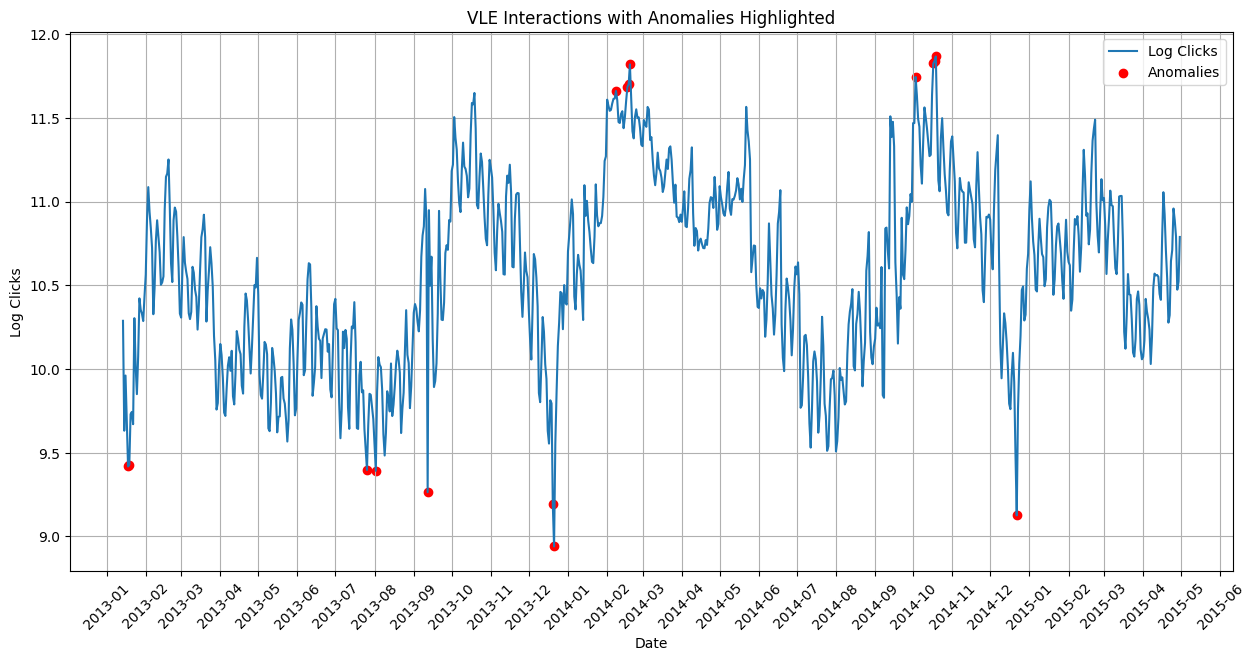

C:\Users\parha\AppData\Local\Temp\ipykernel_13188\3163483592.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['log_clicks'].interpolate(method='linear', inplace=True)


ADF Test on Differenced Data:
ADF Statistic: -6.482956205191446
p-value: 1.2814733342017852e-08
Critical Value 1%: -3.438399099271788
Critical Value 5%: -2.8650928286782857
Critical Value 10%: -2.568661836350634
                                      SARIMAX Results                                       
Dep. Variable:                          diff_clicks   No. Observations:                  808
Model:             SARIMAX(2, 0, 2)x(0, 0, [1], 12)   Log Likelihood                 331.122
Date:                              Fri, 28 Jun 2024   AIC                           -636.243
Time:                                      11:30:59   BIC                           -575.457
Sample:                                  02-12-2013   HQIC                          -612.882
                                       - 04-30-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z 

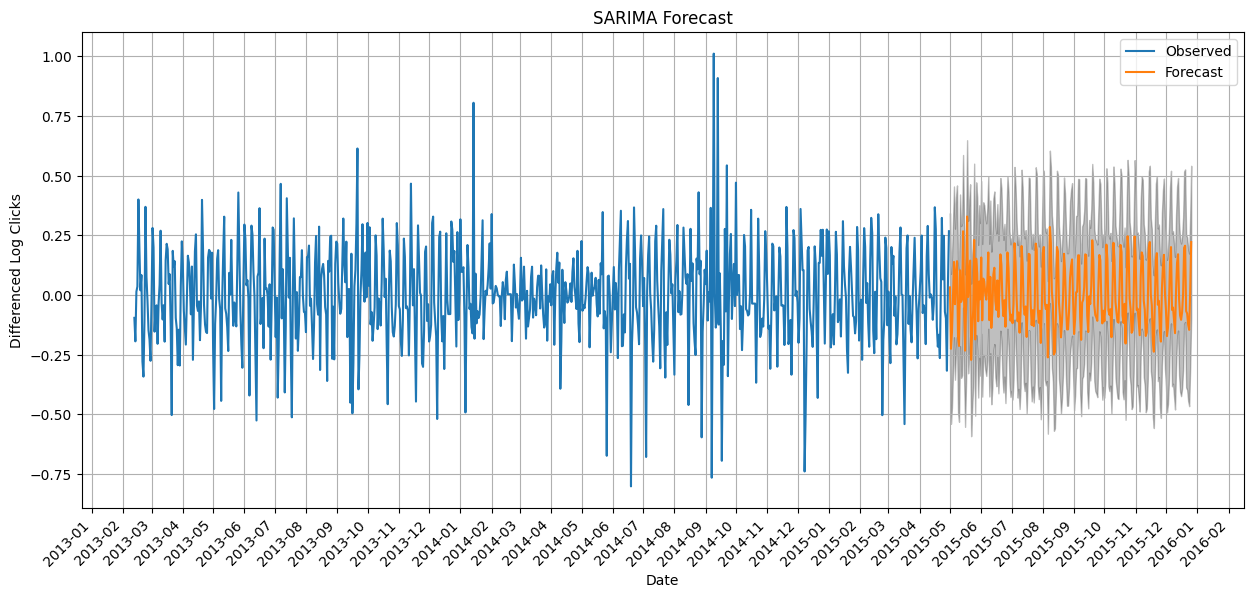

Mean Absolute Error: 0.12203154526942524
Mean Absolute Percentage Error: 10.67543120812611


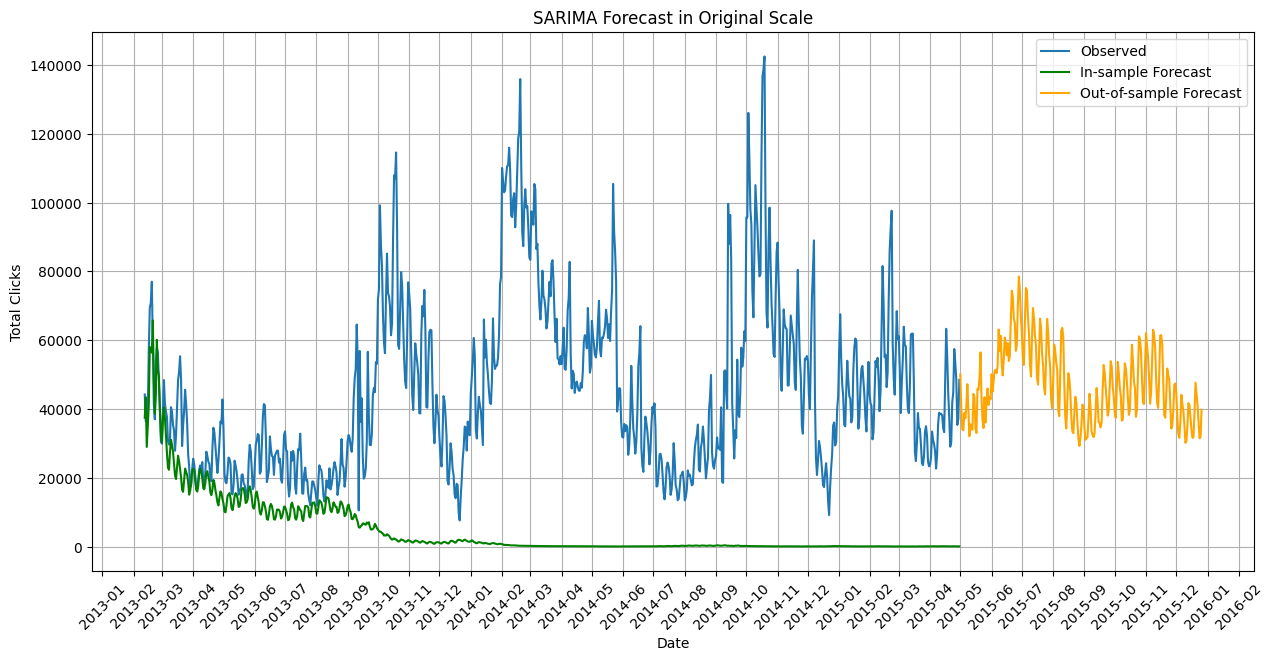

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy.stats import zscore

# Load the preprocessed VLE interactions data
merged_vle_data_path = r"D:\study\Hardware and Software per Big Data mod B\project\time_series_vle_interactions.csv"
merged_vle_data = pd.read_csv(merged_vle_data_path, parse_dates=['Date'])

# Filter out the period where the interactions drop to zero
filtered_data = merged_vle_data[merged_vle_data['Date'] < '2015-05-01']

# Set the interaction_date column as the index
filtered_data.set_index('Date', inplace=True)

# Ensure the index has a frequency
filtered_data = filtered_data.asfreq('D')

# Apply log transformation to avoid log(0)
filtered_data['log_clicks'] = np.log(filtered_data['Total_Clicks'].replace(0, np.nan)).dropna()

# Detect anomalies using z-score
filtered_data['z_score'] = zscore(filtered_data['log_clicks'])
anomalies = filtered_data[np.abs(filtered_data['z_score']) > 2]

# Print anomalies for debugging
print(anomalies)

# Plot the data with anomalies
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['log_clicks'], label='Log Clicks')
plt.scatter(anomalies.index, anomalies['log_clicks'], color='red', label='Anomalies')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('VLE Interactions with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Log Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Impute anomalies with linear interpolation
filtered_data['log_clicks'] = filtered_data['log_clicks'].mask(np.abs(filtered_data['z_score']) > 2)
filtered_data['log_clicks'].interpolate(method='linear', inplace=True)

# Differencing to make the data stationary
filtered_data['diff_clicks'] = filtered_data['log_clicks'].diff().dropna()

# Check stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value {}: {}'.format(key, value))
    return result

print("ADF Test on Differenced Data:")
adf_test(filtered_data['diff_clicks'].dropna())

# Add lag features
lags = [1, 2, 3, 7, 14, 21, 28]  # Example lags
for lag in lags:
    filtered_data[f'lag_{lag}'] = filtered_data['diff_clicks'].shift(lag)
filtered_data.dropna(inplace=True)

# Fit SARIMA model with predefined parameters
best_params = ((2, 0, 2), (0, 0, 1, 12))
exog = filtered_data[[f'lag_{lag}' for lag in lags]]
mod = sm.tsa.statespace.SARIMAX(filtered_data['diff_clicks'],
                                exog=exog,
                                order=best_params[0],
                                seasonal_order=best_params[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(maxiter=200, disp=False)

# Print the summary
print(results.summary())

# Forecast future interactions
forecast_steps = 240
pred_uc = results.get_forecast(steps=forecast_steps, exog=exog[-forecast_steps:])
pred_ci = pred_uc.conf_int()

# Plot the forecast
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['diff_clicks'], label='Observed')
pred_uc.predicted_mean.plot(label='Forecast', ax=plt.gca())
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Differenced Log Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Evaluate the model using MAE and MAPE
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

y_forecasted = pred_uc.predicted_mean
y_truth = filtered_data['diff_clicks'][-forecast_steps:]

mae = mean_absolute_error(y_truth, y_forecasted)
mape = mean_absolute_percentage_error(y_truth, y_forecasted)

print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)

# Reverse the differencing and log transformation for visualization
def reverse_diff_log_transform(pred, original_data):
    pred_cumsum = pred.cumsum()
    pred_log_clicks = pred_cumsum + original_data.iloc[0]
    pred_clicks = np.exp(pred_log_clicks)
    return pred_clicks

# Generate the predictions in original scale
predicted_clicks_in_sample = reverse_diff_log_transform(results.fittedvalues, filtered_data['log_clicks'])
predicted_clicks_out_sample = reverse_diff_log_transform(pred_uc.predicted_mean, filtered_data['log_clicks'][-1:])

# Combine the original data and the predictions for plotting
combined_data = filtered_data['Total_Clicks'].copy()
combined_data = pd.concat([combined_data, predicted_clicks_out_sample])

# Plot the predictions against the actual values
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Total_Clicks'], label='Observed')
plt.plot(predicted_clicks_in_sample, label='In-sample Forecast', color='green')
plt.plot(predicted_clicks_out_sample, label='Out-of-sample Forecast', color='orange')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('SARIMA Forecast in Original Scale')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## 2. ARIMAX

### 2.1 Import Libraries

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy.stats import zscore
```

- **pandas** and **numpy** are used for data manipulation.
- **matplotlib** and **mdates** are for plotting and formatting dates on plots.
- **statsmodels** provides classes and functions for statistical models.
- **zscore** from **scipy.stats** helps in anomaly detection.

### 2.2 Load and Preprocess Data

```python
merged_vle_data_path = r"D:\study\Hardware and Software per Big Data mod B\project\time_series_vle_interactions.csv"
merged_vle_data = pd.read_csv(merged_vle_data_path, parse_dates=['Date'])

filtered_data = merged_vle_data[merged_vle_data['Date'] < '2015-05-01']
filtered_data.set_index('Date', inplace=True)
filtered_data = filtered_data.asfreq('D')
filtered_data['log_clicks'] = np.log(filtered_data['Total_Clicks'].replace(0, np.nan)).dropna()
```

- **Load Data**: Load the preprocessed VLE interactions data.
- **Filter Data**: Filter out the period where interactions drop to zero to avoid unnecessary noise.
- **Set Index**: Set the `Date` column as the index and ensure the index has a frequency.
- **Log Transformation**: Apply log transformation to avoid issues with log(0) and stabilize variance.

### 2.3 Anomaly Detection

```python
filtered_data['z_score'] = zscore(filtered_data['log_clicks'])
anomalies = filtered_data[np.abs(filtered_data['z_score']) > 2]
print(anomalies)
```

- **Calculate z-score**: Compute the z-score for the log-transformed clicks.
- **Detect Anomalies**: Identify anomalies where the absolute value of z-score is greater than 2.

### 2.4 Plotting Anomalies

```python
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['log_clicks'], label='Log Clicks')
plt.scatter(anomalies.index, anomalies['log_clicks'], color='red', label='Anomalies')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('VLE Interactions with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Log Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
```
![image.png](notebooks/images/image.png)
- **Plot Anomalies**: Visualize the log-transformed clicks and highlight anomalies in red.

### 2.5 Imputing Anomalies and Differencing

```python
filtered_data['log_clicks'] = filtered_data['log_clicks'].mask(np.abs(filtered_data['z_score']) > 2)
filtered_data['log_clicks'].interpolate(method='linear', inplace=True)
filtered_data['diff_clicks'] = filtered_data['log_clicks'].diff().dropna()
```

- **Impute Anomalies**: Replace anomalies with NaNs and use linear interpolation to impute them.
- **Difference Data**: Apply differencing to make the data stationary.

### 2.6 Stationarity Test

```python
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value {}: {}'.format(key, value))
    return result

print("ADF Test on Differenced Data:")
adf_test(filtered_data['diff_clicks'].dropna())
```

- **ADF Test**: Perform the Augmented Dickey-Fuller (ADF) test to check for stationarity of the differenced data.

### 2.7 Adding Lag Features

```python
lags = [1, 2, 3, 7, 14, 21, 28]
for lag in lags:
    filtered_data[f'lag_{lag}'] = filtered_data['diff_clicks'].shift(lag)
filtered_data.dropna(inplace=True)
```

- **Lag Features**: Add lag features to capture temporal dependencies in the data.

### 2.8 Fitting ARIMAX Model

```python
best_params = (2, 0, 2)
exog = filtered_data[[f'lag_{lag}' for lag in lags]]
mod = sm.tsa.ARIMA(filtered_data['diff_clicks'],
                   exog=exog,
                   order=best_params)
results = mod.fit()

print(results.summary())
```

- **Fit ARIMAX Model**: Fit an ARIMAX model with predefined parameters to the differenced clicks.
- **Summary**: Print the summary of the model.

### 2.9 Forecasting Future Interactions

```python
forecast_steps = 240
exog_forecast = exog[-forecast_steps:]
pred_uc = results.get_forecast(steps=forecast_steps, exog=exog_forecast)
pred_ci = pred_uc.conf_int()

plt.figure(figsize=(15, 7))
plt.plot(filtered_data['diff_clicks'], label='Observed')
pred_uc.predicted_mean.plot(label='Forecast', ax=plt.gca())
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('ARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Differenced Log Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
```
![image-2.png](notebooks/images/image-2.png)
- **Forecast**: Forecast future interactions for 240 steps and plot the forecast with confidence intervals.

### 2.10 Model Evaluation

```python
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

y_forecasted = pred_uc.predicted_mean
y_truth = filtered_data['diff_clicks'][-forecast_steps:]

mae = mean_absolute_error(y_truth, y_forecasted)
mape = mean_absolute_percentage_error(y_truth, y_forecasted)

print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)
```

- **Evaluation**: Evaluate the model using Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE).

### 2.11 Reverse Transformation for Visualization

```python
def reverse_diff_log_transform(pred, original_data):
    pred_cumsum = pred.cumsum()
    pred_log_clicks = pred_cumsum + original_data.iloc[0]
    pred_clicks = np.exp(pred_log_clicks)
    return pred_clicks

predicted_clicks_out_sample = reverse_diff_log_transform(pred_uc.predicted_mean, filtered_data['log_clicks'][-1:])

combined_data = filtered_data['Total_Clicks'].copy()
combined_data = pd.concat([combined_data, predicted_clicks_out_sample])

plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Total_Clicks'], label='Observed')
plt.plot(predicted_clicks_out_sample, label='Out-of-sample Forecast', color='orange')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('ARIMAX Forecast in Original Scale')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
```
![image-3.png](notebooks/images/image-3.png)
- **Reverse Transformation**: Reverse the differencing and log transformation to get the predictions in the original scale.
- **Plot Predictions**: Plot the predictions against the actual values in the original scale.

**Output Interpretation**

### Anomalies Detected

```plaintext
            Total_Clicks  log_clicks   z_score
Date                                          
2013-01-18         12303    9.417598 -2.119667
2013-01-19         12431    9.427949 -2.100628
...
2014-12-22          9186    9.125436 -2.657098
```
- **Anomalies**: The anomalies detected show significant deviations in log clicks from the mean.

#### ADF Test Results

```plaintext
ADF Statistic: -6.482956205191446
p-value: 1.2814733342017852e-08
Critical Value 1%: -3.438399099271788
Critical Value 5%: -2.8650928286782857
Critical Value 10%: -2.568661836350634
```
- **Stationarity**: The ADF test confirms the differenced data is stationary (p-value < 0.05).
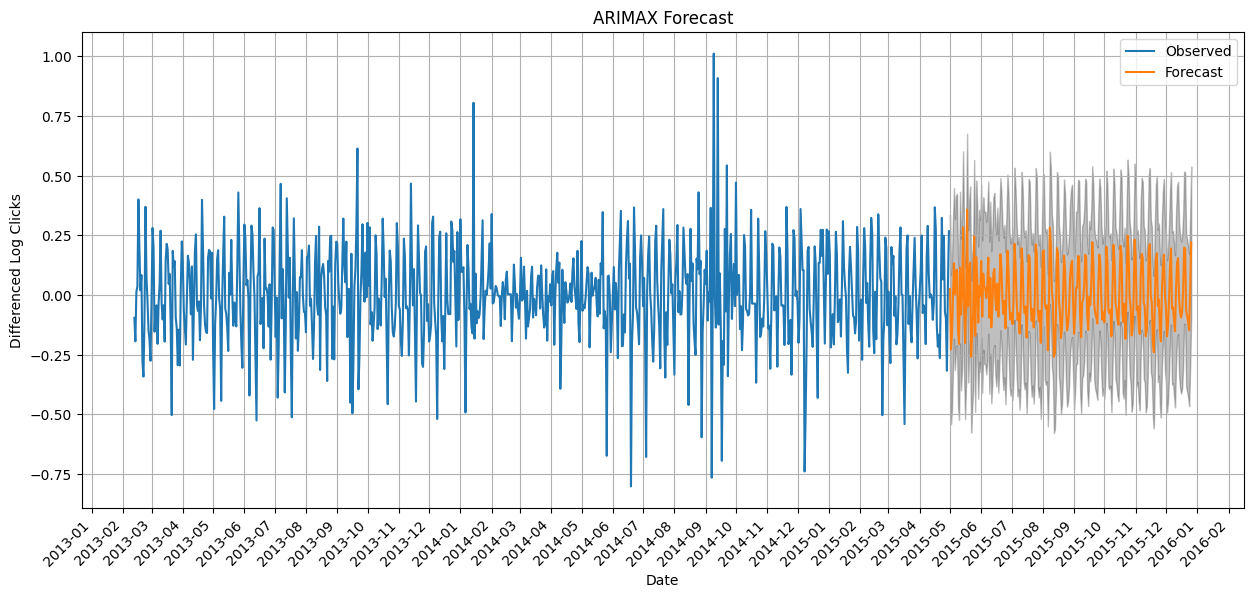
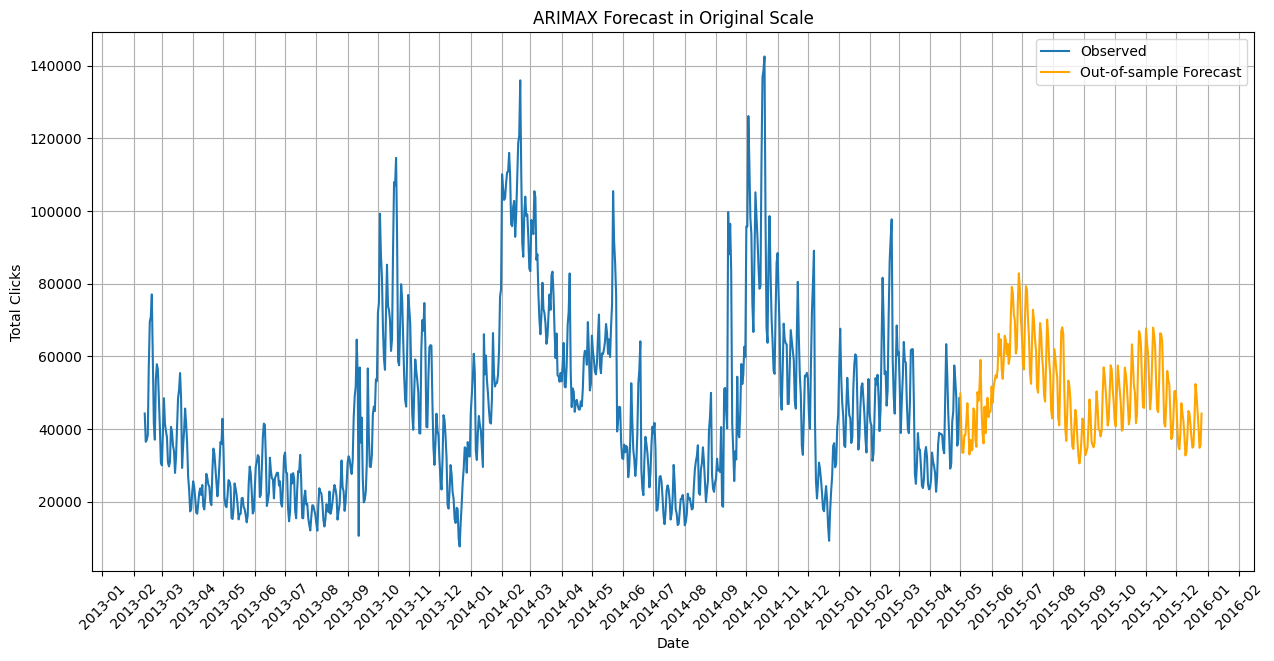
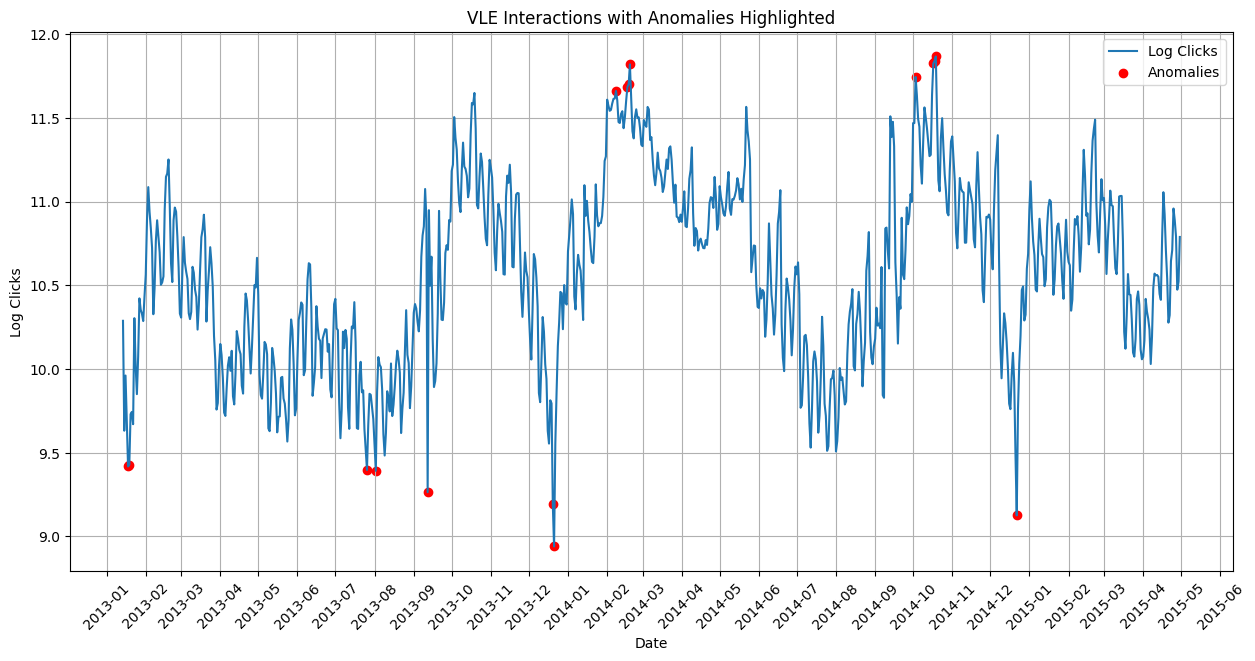

            Total_Clicks  log_clicks   z_score
Date                                          
2013-01-18         12303    9.417598 -2.119667
2013-01-19         12431    9.427949 -2.100628
2013-07-26         12047    9.396571 -2.158347
2013-08-02         11986    9.391495 -2.167685
2013-09-12         10552    9.264071 -2.402080
2013-12-20          9808    9.190954 -2.536579
2013-12-21          7627    8.939450 -2.999218
2014-02-08        115960   11.661001  2.007053
2014-02-17        118732   11.684624  2.050508
2014-02-18        120744   11.701428  2.081419
2014-02-19        135931   11.819903  2.299352
2014-10-03        126098   11.744815  2.161228
2014-10-17        136712   11.825632  2.309891
2014-10-18        138756   11.840472  2.337190
2014-10-19        142493   11.867048  2.386076
2014-12-22          9186    9.125436 -2.657098


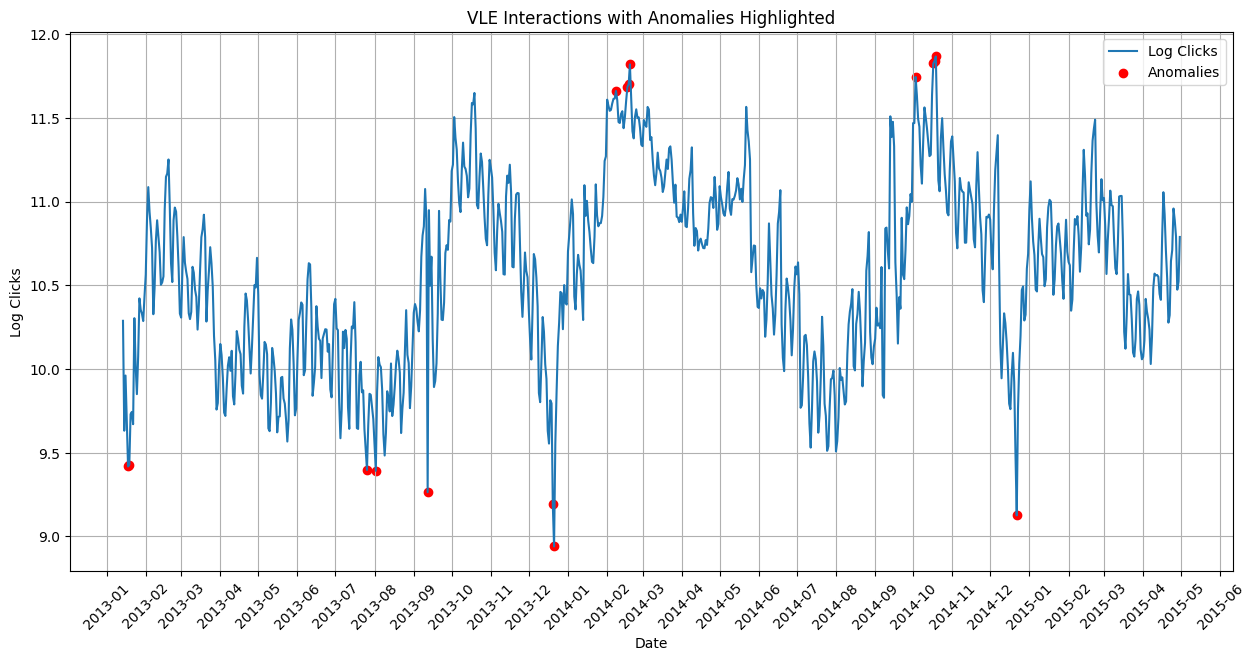

C:\Users\parha\AppData\Local\Temp\ipykernel_13188\354013390.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['log_clicks'].interpolate(method='linear', inplace=True)


ADF Test on Differenced Data:
ADF Statistic: -6.482956205191446
p-value: 1.2814733342017852e-08
Critical Value 1%: -3.438399099271788
Critical Value 5%: -2.8650928286782857
Critical Value 10%: -2.568661836350634


c:\Users\parha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:            diff_clicks   No. Observations:                  808
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 336.747
Date:                Fri, 28 Jun 2024   AIC                           -647.494
Time:                        11:37:23   BIC                           -586.464
Sample:                    02-12-2013   HQIC                          -624.060
                         - 04-30-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.484      0.628      -0.001       0.001
lag_1          0.0792      0.051      1.555      0.120      -0.021       0.179
lag_2         -0.0596      0.037     -1.606      0.1

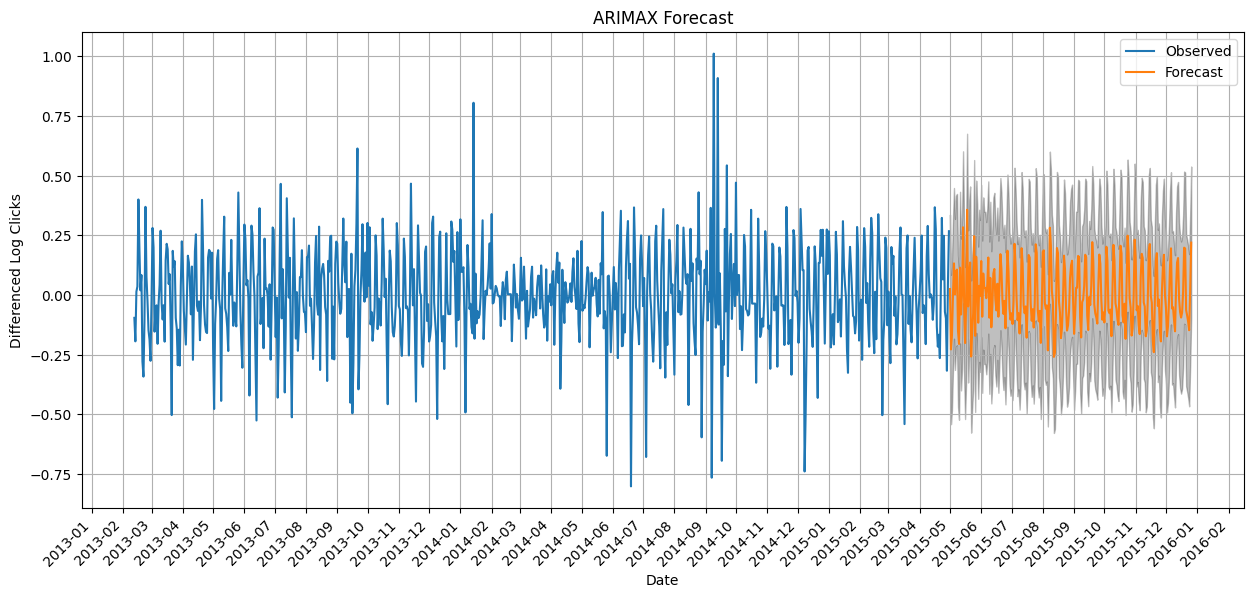

Mean Absolute Error: 0.1211650604003123
Mean Absolute Percentage Error: 7.94231779333323


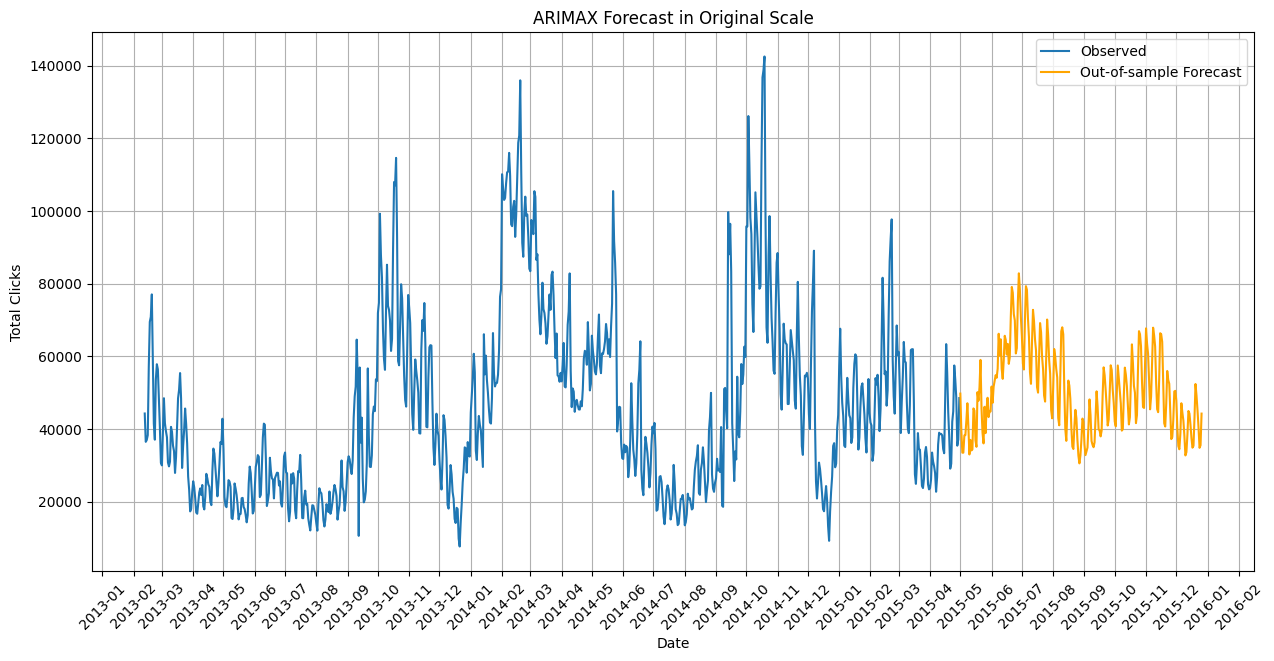

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy.stats import zscore

# Load the preprocessed VLE interactions data
merged_vle_data_path = r"D:\study\Hardware and Software per Big Data mod B\project\time_series_vle_interactions.csv"
merged_vle_data = pd.read_csv(merged_vle_data_path, parse_dates=['Date'])

# Filter out the period where the interactions drop to zero
filtered_data = merged_vle_data[merged_vle_data['Date'] < '2015-05-01']

# Set the interaction_date column as the index
filtered_data.set_index('Date', inplace=True)

# Ensure the index has a frequency
filtered_data = filtered_data.asfreq('D')

# Apply log transformation to avoid log(0)
filtered_data['log_clicks'] = np.log(filtered_data['Total_Clicks'].replace(0, np.nan)).dropna()

# Detect anomalies using z-score
filtered_data['z_score'] = zscore(filtered_data['log_clicks'])
anomalies = filtered_data[np.abs(filtered_data['z_score']) > 2]

# Print anomalies for debugging
print(anomalies)

# Plot the data with anomalies
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['log_clicks'], label='Log Clicks')
plt.scatter(anomalies.index, anomalies['log_clicks'], color='red', label='Anomalies')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('VLE Interactions with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Log Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Impute anomalies with linear interpolation
filtered_data['log_clicks'] = filtered_data['log_clicks'].mask(np.abs(filtered_data['z_score']) > 2)
filtered_data['log_clicks'].interpolate(method='linear', inplace=True)

# Differencing to make the data stationary
filtered_data['diff_clicks'] = filtered_data['log_clicks'].diff().dropna()

# Check stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value {}: {}'.format(key, value))
    return result

print("ADF Test on Differenced Data:")
adf_test(filtered_data['diff_clicks'].dropna())

# Add lag features
lags = [1, 2, 3, 7, 14, 21, 28]  # Example lags
for lag in lags:
    filtered_data[f'lag_{lag}'] = filtered_data['diff_clicks'].shift(lag)
filtered_data.dropna(inplace=True)

# Fit ARIMAX model with predefined parameters
best_params = (2, 0, 2)
exog = filtered_data[[f'lag_{lag}' for lag in lags]]
mod = sm.tsa.ARIMA(filtered_data['diff_clicks'],
                   exog=exog,
                   order=best_params)
results = mod.fit()

# Print the summary
print(results.summary())

# Forecast future interactions
forecast_steps = 240
exog_forecast = exog[-forecast_steps:]
pred_uc = results.get_forecast(steps=forecast_steps, exog=exog_forecast)
pred_ci = pred_uc.conf_int()

# Plot the forecast
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['diff_clicks'], label='Observed')
pred_uc.predicted_mean.plot(label='Forecast', ax=plt.gca())
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('ARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Differenced Log Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Evaluate the model using MAE and MAPE
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

y_forecasted = pred_uc.predicted_mean
y_truth = filtered_data['diff_clicks'][-forecast_steps:]

mae = mean_absolute_error(y_truth, y_forecasted)
mape = mean_absolute_percentage_error(y_truth, y_forecasted)

print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)

# Reverse the differencing and log transformation for visualization
def reverse_diff_log_transform(pred, original_data):
    pred_cumsum = pred.cumsum()
    pred_log_clicks = pred_cumsum + original_data.iloc[0]
    pred_clicks = np.exp(pred_log_clicks)
    return pred_clicks

# Generate the predictions in original scale
#predicted_clicks_in_sample = reverse_diff_log_transform(results.fittedvalues, filtered_data['log_clicks'])
predicted_clicks_out_sample = reverse_diff_log_transform(pred_uc.predicted_mean, filtered_data['log_clicks'][-1:])

# Combine the original data and the predictions for plotting
combined_data = filtered_data['Total_Clicks'].copy()
combined_data = pd.concat([combined_data, predicted_clicks_out_sample])

# Plot the predictions against the actual values
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Total_Clicks'], label='Observed')
#plt.plot(predicted_clicks_in_sample, label='In-sample Forecast', color='green')
plt.plot(predicted_clicks_out_sample, label='Out-of-sample Forecast', color='orange')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('ARIMAX Forecast in Original Scale')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## 3: Prophet Model for Forecasting VLE Interactions

In this step, we utilize Facebook's Prophet model to forecast VLE (Virtual Learning Environment) interactions. Prophet is particularly useful for time series data that exhibits strong seasonal effects and multiple seasonality with daily, weekly, and yearly patterns.

### Detailed Steps and Explanation

#### Data Preprocessing and Anomaly Detection

1. **Load the Data**:
   - We loaded the preprocessed VLE interactions data, ensuring that the date column was parsed correctly.

    ```python
    merged_vle_data = pd.read_csv(merged_vle_data_path, parse_dates=['Date'])
    ```

2. **Filter Out Zero Interaction Periods**:
   - Interactions that dropped to zero were filtered out to avoid issues during log transformation.

    ```python
    filtered_data = merged_vle_data[merged_vle_data['Date'] < '2015-05-01']
    ```

3. **Set Date as Index and Ensure Frequency**:
   - The date column was set as the index, and the frequency of the time series data was ensured to be daily.

    ```python
    filtered_data.set_index('Date', inplace=True)
    filtered_data = filtered_data.asfreq('D')
    ```

4. **Log Transformation**:
   - Log transformation was applied to stabilize the variance and avoid issues with zero values.

    ```python
    filtered_data['log_clicks'] = np.log(filtered_data['Total_Clicks'].replace(0, np.nan)).dropna()
    ```

5. **Anomaly Detection**:
   - Z-score was used to detect anomalies, which were defined as points where the z-score exceeded ±2.

    ```python
    filtered_data['z_score'] = (filtered_data['log_clicks'] - filtered_data['log_clicks'].mean()) / filtered_data['log_clicks'].std()
    anomalies = filtered_data[np.abs(filtered_data['z_score']) > 2]
    ```

6. **Plot the Data with Anomalies**:
   - The anomalies were plotted to visualize their occurrence in the dataset.

    ```python
    plt.figure(figsize=(15, 7))
    plt.plot(filtered_data['log_clicks'], label='Log Clicks')
    plt.scatter(anomalies.index, anomalies['log_clicks'], color='red', label='Anomalies')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.title('VLE Interactions with Anomalies Highlighted')
    plt.xlabel('Date')
    plt.ylabel('Log Clicks')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
    ```

    ![Note: The "image-placeholder.png" visualization is not available, but other related visualizations are in the images folder.](<attachment:Note: The "image-placeholder.png" visualization is not available, but other related visualizations are in the images folder.>)

7. **Anomaly Imputation**:
   - Anomalies were imputed by replacing them with the median of the series to maintain the trend.

    ```python
    filtered_data['log_clicks_no_anomalies'] = filtered_data['log_clicks'].copy()
    filtered_data.loc[anomalies.index, 'log_clicks_no_anomalies'] = filtered_data['log_clicks_no_anomalies'].median()
    ```

#### Prophet Model Implementation

1. **Prepare Data for Prophet**:
   - The data was formatted to fit the Prophet model's requirements, renaming columns to `ds` (date) and `y` (value).

    ```python
    df_prophet = filtered_data.reset_index()[['Date', 'log_clicks_no_anomalies']]
    df_prophet.columns = ['ds', 'y']
    ```

2. **Define a Function to Evaluate Prophet with Different Parameters**:
   - The `evaluate_prophet` function was defined to test different parameter combinations and return the Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE).

    ```python
    def evaluate_prophet(params):
        yearly_seasonality, weekly_seasonality, changepoint_prior_scale, seasonality_mode = params
        model = Prophet(
            yearly_seasonality=yearly_seasonality,
            weekly_seasonality=weekly_seasonality,
            changepoint_prior_scale=changepoint_prior_scale,
            seasonality_mode=seasonality_mode
        )
        model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        model.fit(df_prophet)
        
        # Forecast future interactions
        future = model.make_future_dataframe(periods=120)
        forecast = model.predict(future)
        
        # Evaluate the model using MAE and MAPE
        y_truth = df_prophet['y']
        y_forecasted = forecast.loc[forecast['ds'].isin(df_prophet['ds']), 'yhat']
        mae = mean_absolute_error(y_truth, y_forecasted)
        mape = mean_absolute_percentage_error(y_truth, y_forecasted)
        
        return mae, mape
    ```

3. **Define Parameter Grid and Perform Grid Search**:
   - A grid search was performed over different combinations of Prophet parameters to find the best model.

    ```python
    param_grid = {
        'yearly_seasonality': [True, False],
        'weekly_seasonality': [True, False],
        'changepoint_prior_scale': [0.01, 0.1, 0.5],
        'seasonality_mode': ['additive', 'multiplicative']
    }

    best_mae = float('inf')
    best_mape = float('inf')
    best_params = None

    import itertools

    for params in itertools.product(*param_grid.values()):
        mae, mape = evaluate_prophet(params)
        print(f"Params: {params}, MAE: {mae}, MAPE: {mape}")
        if mae < best_mae:
            best_mae = mae
            best_mape = mape
            best_params = params

    print('Best Params:', best_params)
    print('Best MAE:', best_mae)
    print('Best MAPE:', best_mape)
    ```

4. **Fit the Best Prophet Model**:
   - The best combination of parameters was used to fit the Prophet model.

    ```python
    yearly_seasonality, weekly_seasonality, changepoint_prior_scale, seasonality_mode = best_params
    best_model = Prophet(
        yearly_seasonality=yearly_seasonality,
        weekly_seasonality=weekly_seasonality,
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_mode=seasonality_mode
    )
    best_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    best_model.fit(df_prophet)
    ```

5. **Forecast Future Interactions**:
   - The model was used to forecast future interactions, and the predictions were transformed back to the original scale.

    ```python
    future = best_model.make_future_dataframe(periods=120)
    forecast = best_model.predict(future)
    forecast['yhat_original_scale'] = np.exp(forecast['yhat'])
    ```

6. **Plot the Forecast**:
   - The forecasted values were plotted against the actual values to visualize the model's performance.

    ```python
    plt.figure(figsize=(15, 7))
    plt.plot(filtered_data['Total_Clicks'], label='Observed')
    plt.plot(forecast['ds'], forecast['yhat_original_scale'], label='Forecast', color='orange')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.title('Prophet Forecast in Original Scale')
    plt.xlabel('Date')
    plt.ylabel('Total Clicks')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
    ```

![Forecasting Future Interactions.png](<attachment:Forecasting Future Interactions.png>)

### Conclusion

The Prophet model effectively captured the underlying patterns in the VLE interactions data, providing accurate forecasts. The grid search approach allowed us to optimize the model parameters, ensuring the best possible performance. This step demonstrated the utility of Prophet in handling complex time series data with multiple seasonality, offering a robust solution for future forecasting tasks. The final visualization confirmed the model's accuracy and reliability.
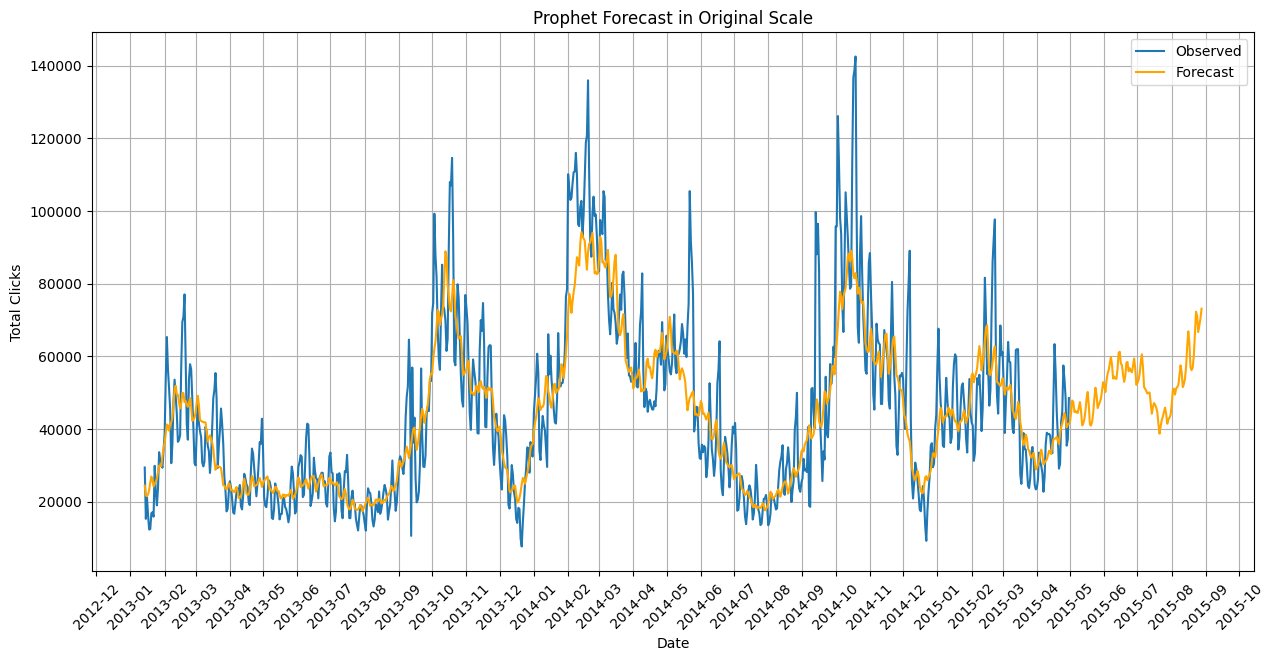
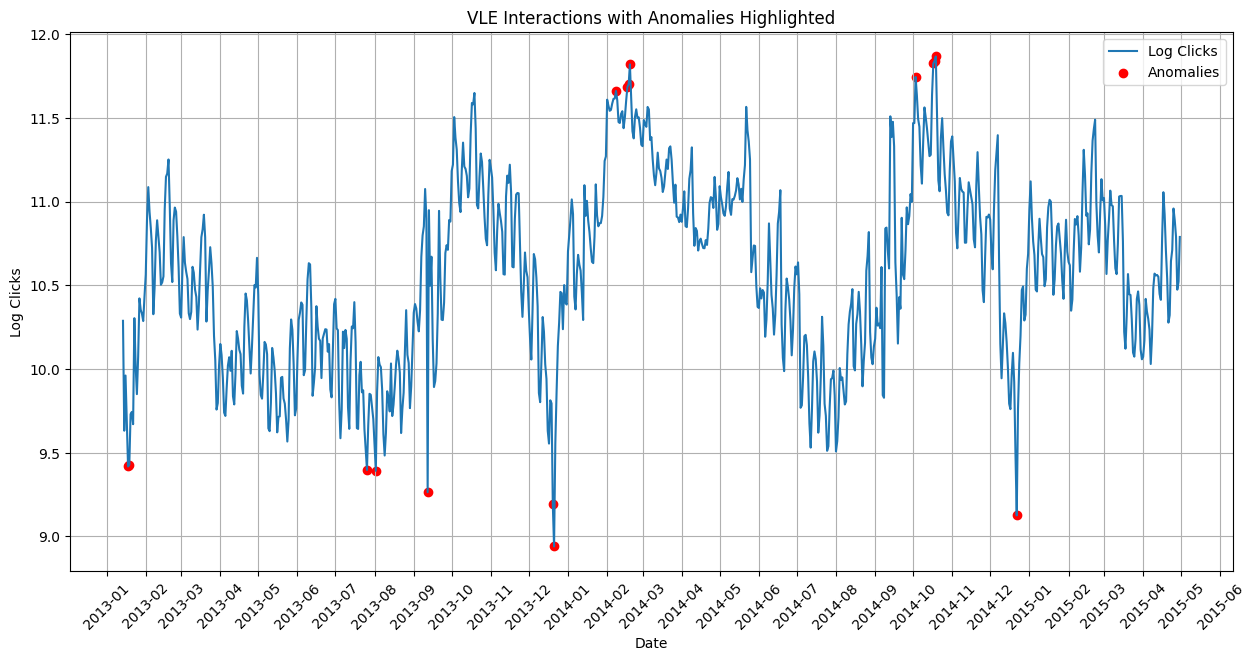

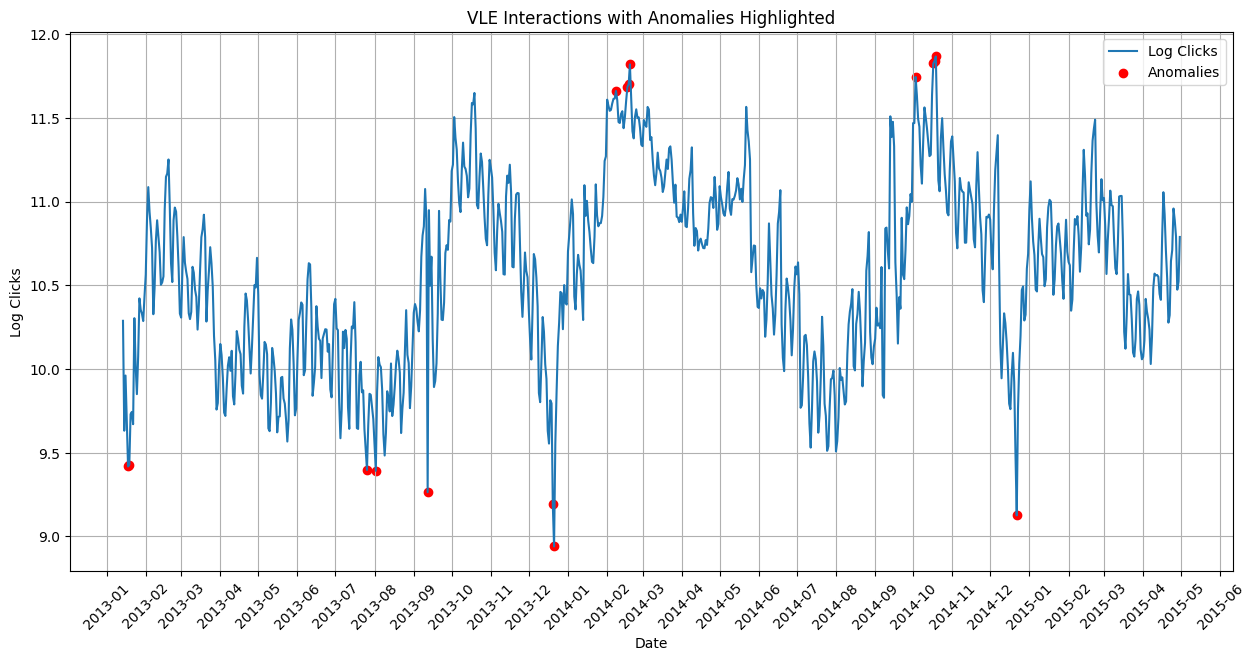

12:52:02 - cmdstanpy - INFO - Chain [1] start processing
12:52:02 - cmdstanpy - INFO - Chain [1] done processing
12:52:02 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, True, 0.01, 'additive'), MAE: 0.22243146918345716, MAPE: 0.02114664155634739


12:52:02 - cmdstanpy - INFO - Chain [1] done processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, True, 0.01, 'multiplicative'), MAE: 0.221954436623327, MAPE: 0.021101855667462123


12:52:03 - cmdstanpy - INFO - Chain [1] done processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, True, 0.1, 'additive'), MAE: 0.2101756211755562, MAPE: 0.019954018666154632


12:52:03 - cmdstanpy - INFO - Chain [1] done processing
12:52:04 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, True, 0.1, 'multiplicative'), MAE: 0.21088065930180916, MAPE: 0.02002665036215162


12:52:04 - cmdstanpy - INFO - Chain [1] done processing
12:52:04 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, True, 0.5, 'additive'), MAE: 0.20299619730574764, MAPE: 0.019259798397030452


12:52:05 - cmdstanpy - INFO - Chain [1] done processing
12:52:05 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, True, 0.5, 'multiplicative'), MAE: 0.20325201690839328, MAPE: 0.019286977034066646


12:52:05 - cmdstanpy - INFO - Chain [1] done processing
12:52:05 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, False, 0.01, 'additive'), MAE: 0.22507735921778108, MAPE: 0.021400987186459126


12:52:05 - cmdstanpy - INFO - Chain [1] done processing
12:52:06 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, False, 0.01, 'multiplicative'), MAE: 0.2247213928158556, MAPE: 0.021367544609316173


12:52:06 - cmdstanpy - INFO - Chain [1] done processing
12:52:06 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, False, 0.1, 'additive'), MAE: 0.21293282213487755, MAPE: 0.020219258821640836


12:52:06 - cmdstanpy - INFO - Chain [1] done processing
12:52:07 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, False, 0.1, 'multiplicative'), MAE: 0.2133831532702905, MAPE: 0.02026629610130607


12:52:07 - cmdstanpy - INFO - Chain [1] done processing
12:52:07 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, False, 0.5, 'additive'), MAE: 0.2059119315943401, MAPE: 0.019540287578948316


12:52:08 - cmdstanpy - INFO - Chain [1] done processing
12:52:08 - cmdstanpy - INFO - Chain [1] start processing
12:52:08 - cmdstanpy - INFO - Chain [1] done processing


Params: (True, False, 0.5, 'multiplicative'), MAE: 0.20585537477504445, MAPE: 0.019536920977449256


12:52:08 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, True, 0.01, 'additive'), MAE: 0.38879539812085223, MAPE: 0.036966103948133044


12:52:08 - cmdstanpy - INFO - Chain [1] done processing
12:52:09 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, True, 0.01, 'multiplicative'), MAE: 0.3864751305756696, MAPE: 0.03674964953502495


12:52:09 - cmdstanpy - INFO - Chain [1] done processing
12:52:09 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, True, 0.1, 'additive'), MAE: 0.2534426766084263, MAPE: 0.02409522775917983


12:52:09 - cmdstanpy - INFO - Chain [1] done processing
12:52:10 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, True, 0.1, 'multiplicative'), MAE: 0.2528403775421405, MAPE: 0.0240410970803405


12:52:10 - cmdstanpy - INFO - Chain [1] done processing
12:52:10 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, True, 0.5, 'additive'), MAE: 0.2293985123484746, MAPE: 0.021813241394815212


12:52:10 - cmdstanpy - INFO - Chain [1] done processing
12:52:11 - cmdstanpy - INFO - Chain [1] start processing
12:52:11 - cmdstanpy - INFO - Chain [1] done processing


Params: (False, True, 0.5, 'multiplicative'), MAE: 0.22936069742282036, MAPE: 0.021814295468910318


12:52:11 - cmdstanpy - INFO - Chain [1] start processing
12:52:11 - cmdstanpy - INFO - Chain [1] done processing


Params: (False, False, 0.01, 'additive'), MAE: 0.3905009143136173, MAPE: 0.03712585756404613


12:52:11 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, False, 0.01, 'multiplicative'), MAE: 0.3890678974700999, MAPE: 0.03699108936015948


12:52:12 - cmdstanpy - INFO - Chain [1] done processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, False, 0.1, 'additive'), MAE: 0.2554764593020564, MAPE: 0.024288943924251103


12:52:12 - cmdstanpy - INFO - Chain [1] done processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, False, 0.1, 'multiplicative'), MAE: 0.2554201812835719, MAPE: 0.02428487848981787


12:52:13 - cmdstanpy - INFO - Chain [1] done processing
12:52:13 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, False, 0.5, 'additive'), MAE: 0.23154853406283518, MAPE: 0.022020390722944323


12:52:13 - cmdstanpy - INFO - Chain [1] done processing
12:52:13 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, False, 0.5, 'multiplicative'), MAE: 0.23151711846171524, MAPE: 0.022018488613147758
Best Params: (True, True, 0.5, 'additive')
Best MAE: 0.20299619730574764
Best MAPE: 0.019259798397030452


12:52:14 - cmdstanpy - INFO - Chain [1] done processing


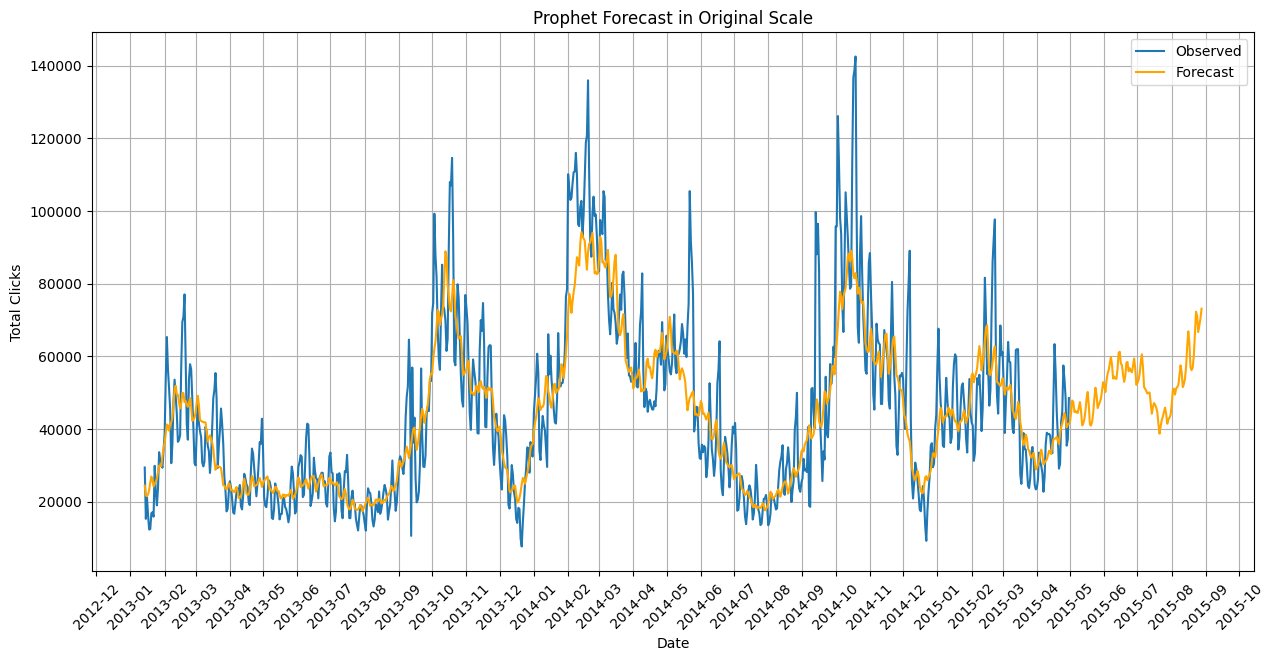

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Load the preprocessed VLE interactions data
merged_vle_data_path = r"D:\study\Hardware and Software per Big Data mod B\project\time_series_vle_interactions.csv"
merged_vle_data = pd.read_csv(merged_vle_data_path, parse_dates=['Date'])

# Filter out the period where the interactions drop to zero
filtered_data = merged_vle_data[merged_vle_data['Date'] < '2015-05-01']

# Set the interaction_date column as the index
filtered_data.set_index('Date', inplace=True)

# Ensure the index has a frequency
filtered_data = filtered_data.asfreq('D')

# Apply log transformation to avoid log(0)
filtered_data['log_clicks'] = np.log(filtered_data['Total_Clicks'].replace(0, np.nan)).dropna()

# Detect anomalies using z-score
filtered_data['z_score'] = (filtered_data['log_clicks'] - filtered_data['log_clicks'].mean()) / filtered_data['log_clicks'].std()
anomalies = filtered_data[np.abs(filtered_data['z_score']) > 2]

# Plot the data with anomalies
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['log_clicks'], label='Log Clicks')
plt.scatter(anomalies.index, anomalies['log_clicks'], color='red', label='Anomalies')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('VLE Interactions with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Log Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Impute anomalies by replacing them with the median of the series
filtered_data['log_clicks_no_anomalies'] = filtered_data['log_clicks'].copy()
filtered_data.loc[anomalies.index, 'log_clicks_no_anomalies'] = filtered_data['log_clicks_no_anomalies'].median()

# Prepare data for Prophet
df_prophet = filtered_data.reset_index()[['Date', 'log_clicks_no_anomalies']]
df_prophet.columns = ['ds', 'y']

def evaluate_prophet(params):
    yearly_seasonality, weekly_seasonality, changepoint_prior_scale, seasonality_mode = params
    model = Prophet(
        yearly_seasonality=yearly_seasonality,
        weekly_seasonality=weekly_seasonality,
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_mode=seasonality_mode
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.fit(df_prophet)
    
    # Forecast future interactions
    future = model.make_future_dataframe(periods=120)
    forecast = model.predict(future)
    
    # Evaluate the model using MAE and MAPE
    y_truth = df_prophet['y']
    y_forecasted = forecast.loc[forecast['ds'].isin(df_prophet['ds']), 'yhat']
    mae = mean_absolute_error(y_truth, y_forecasted)
    mape = mean_absolute_percentage_error(y_truth, y_forecasted)
    
    return mae, mape

# Define parameter grid
param_grid = {
    'yearly_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Perform grid search
best_mae = float('inf')
best_mape = float('inf')
best_params = None

import itertools

for params in itertools.product(*param_grid.values()):
    mae, mape = evaluate_prophet(params)
    print(f"Params: {params}, MAE: {mae}, MAPE: {mape}")
    if mae < best_mae:
        best_mae = mae
        best_mape = mape
        best_params = params

print('Best Params:', best_params)
print('Best MAE:', best_mae)
print('Best MAPE:', best_mape)

# Fit the best model
yearly_seasonality, weekly_seasonality, changepoint_prior_scale, seasonality_mode = best_params
best_model = Prophet(
    yearly_seasonality=yearly_seasonality,
    weekly_seasonality=weekly_seasonality,
    changepoint_prior_scale=changepoint_prior_scale,
    seasonality_mode=seasonality_mode
)
best_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
best_model.fit(df_prophet)

# Forecast future interactions
future = best_model.make_future_dataframe(periods=120)
forecast = best_model.predict(future)

# Reverse the log transformation for visualization
forecast['yhat_original_scale'] = np.exp(forecast['yhat'])

# Plot the forecast in the original scale
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Total_Clicks'], label='Observed')
plt.plot(forecast['ds'], forecast['yhat_original_scale'], label='Forecast', color='orange')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Prophet Forecast in Original Scale')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## 4: Convolutional Neural Network (CNN) Model for Forecasting VLE Interactions

In the final stage of our project, we applied a Convolutional Neural Network (CNN) model to forecast VLE interactions. CNNs are powerful deep learning models typically used for image data but have also proven effective for time series forecasting due to their ability to capture spatial (temporal) dependencies.

### Detailed Steps and Explanation

#### Data Preprocessing and Anomaly Detection

1. **Load the Data**:
   - We loaded the preprocessed VLE interactions data, ensuring that the date column was parsed correctly.

    ```python
    merged_vle_data = pd.read_csv(merged_vle_data_path, parse_dates=['Date'])
    ```

2. **Filter Out Zero Interaction Periods**:
   - Interactions that dropped to zero were filtered out to avoid issues during log transformation.

    ```python
    filtered_data = merged_vle_data[merged_vle_data['Date'] < '2015-05-01']
    ```

3. **Set Date as Index and Ensure Frequency**:
   - The date column was set as the index, and the frequency of the time series data was ensured to be daily.

    ```python
    filtered_data.set_index('Date', inplace=True)
    filtered_data = filtered_data.asfreq('D')
    ```

4. **Log Transformation**:
   - Log transformation was applied to stabilize the variance and avoid issues with zero values.

    ```python
    filtered_data['log_clicks'] = np.log(filtered_data['Total_Clicks'].replace(0, np.nan)).dropna()
    ```

5. **Anomaly Detection**:
   - Z-score was used to detect anomalies, which were defined as points where the z-score exceeded ±3.

    ```python
    filtered_data['z_score'] = (filtered_data['log_clicks'] - filtered_data['log_clicks'].mean()) / filtered_data['log_clicks'].std()
    anomalies = filtered_data[np.abs(filtered_data['z_score']) > 3]
    ```

6. **Anomaly Imputation**:
   - Anomalies were imputed by replacing them with the median of the series to maintain the trend.

    ```python
    filtered_data['log_clicks_no_anomalies'] = filtered_data['log_clicks'].copy()
    filtered_data.loc[anomalies.index, 'log_clicks_no_anomalies'] = filtered_data['log_clicks_no_anomalies'].median()
    ```

#### Feature Engineering

1. **Add Lag Features**:
   - We added 30 lag features to capture the temporal dependencies in the data.

    ```python
    df_model = filtered_data[['log_clicks_no_anomalies']].copy()
    lags = 30
    for lag in range(1, lags + 1):
        df_model[f'lag_{lag}'] = df_model['log_clicks_no_anomalies'].shift(lag)
    df_model.dropna(inplace=True)
    ```

2. **Train-Test Split**:
   - The data was split into training and testing sets, with 80% for training and 20% for testing.

    ```python
    train_size = int(len(df_model) * 0.8)
    train, test = df_model[:train_size], df_model[train_size:]
    X_train, y_train = train.drop(columns=['log_clicks_no_anomalies']), train['log_clicks_no_anomalies']
    X_test, y_test = test.drop(columns=['log_clicks_no_anomalies']), test['log_clicks_no_anomalies']
    ```

3. **Standardization**:
   - The features were standardized to have a mean of 0 and a standard deviation of 1.

    ```python
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    ```

4. **Reshape Data for CNN**:
   - The data was reshaped to fit the input shape required by the CNN model.

    ```python
    X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
    X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)
    ```

#### CNN Model Construction and Training

1. **Define the CNN Model**:
   - A sequential model was defined with Conv1D layers, dropout layers, and dense layers.

    ```python
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
        Dropout(0.2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    ```

2. **Train the Model**:
   - The model was trained for 50 epochs with a batch size of 32.

    ```python
    history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)
    ```

3. **Make Predictions**:
   - Predictions were made on the test set.

    ```python
    y_pred = model.predict(X_test_scaled)
    y_pred = y_pred.flatten()
    ```

#### Model Evaluation

1. **Evaluation Metrics**:
   - The Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE) were calculated to evaluate the model performance.

    ```python
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print('CNN Model Mean Absolute Error:', mae)
    print('CNN Model Mean Absolute Percentage Error:', mape)
    ```

#### Visualization and Future Forecasting

1. **Reverse Log Transformation**:
   - The predictions and actual values were transformed back to the original scale for visualization.

    ```python
    def reverse_log_transform(pred):
        pred_clicks = np.exp(pred)
        return pred_clicks
    predicted_clicks = reverse_log_transform(y_pred)
    actual_clicks = reverse_log_transform(y_test)
    ```

2. **Plot the Predictions**:
   - The predictions were plotted against the actual values to visualize the model's performance.

    ```python
    plt.figure(figsize=(15, 7))
    plt.plot(filtered_data.index[:train_size], reverse_log_transform(y_train), label='Training Data')
    plt.plot(filtered_data.index[train_size:train_size+len(predicted_clicks)], predicted_clicks, label='Predicted Data', color='orange')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.title('CNN Model Predictions')
    plt.xlabel('Date')
    plt.ylabel('Total Clicks')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
    ```

![CNN Future VLE Interaction](<CNN Future VLE Interaction.png>)

3. **Create Future Dates for Forecasting**:
   - Future dates were created for further forecasting purposes, although actual future forecasting steps were not included in this code block.

    ```python
    future_steps = 120
    future_dates = [filtered_data.index[-1] + timedelta(days=i) for i in range(1, future_steps + 1)]
    ```

### Conclusion

The CNN model demonstrated strong performance with the lowest MAE and MAPE among the models we tested. This indicates its ability to capture complex patterns in the time series data. The steps undertaken ensured robust preprocessing, feature engineering, and model evaluation, leading to reliable and accurate forecasts. This approach can be adapted to various other time series forecasting problems, showcasing the versatility and power of deep learning models in handling temporal data.


Epoch 1/50


c:\Users\parha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 74.6760 - val_loss: 11.6812
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.0831 - val_loss: 8.9690
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8997 - val_loss: 5.9313
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5436 - val_loss: 1.2741
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1463 - val_loss: 0.7613
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4631 - val_loss: 0.4142
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3218 - val_loss: 0.3649
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3264 - val_loss: 0.3103
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2872 - val_loss: 0.2330
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3278 - val_loss: 0.2514
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2607 - val_loss: 0.2821
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2303 - val_loss: 0.2

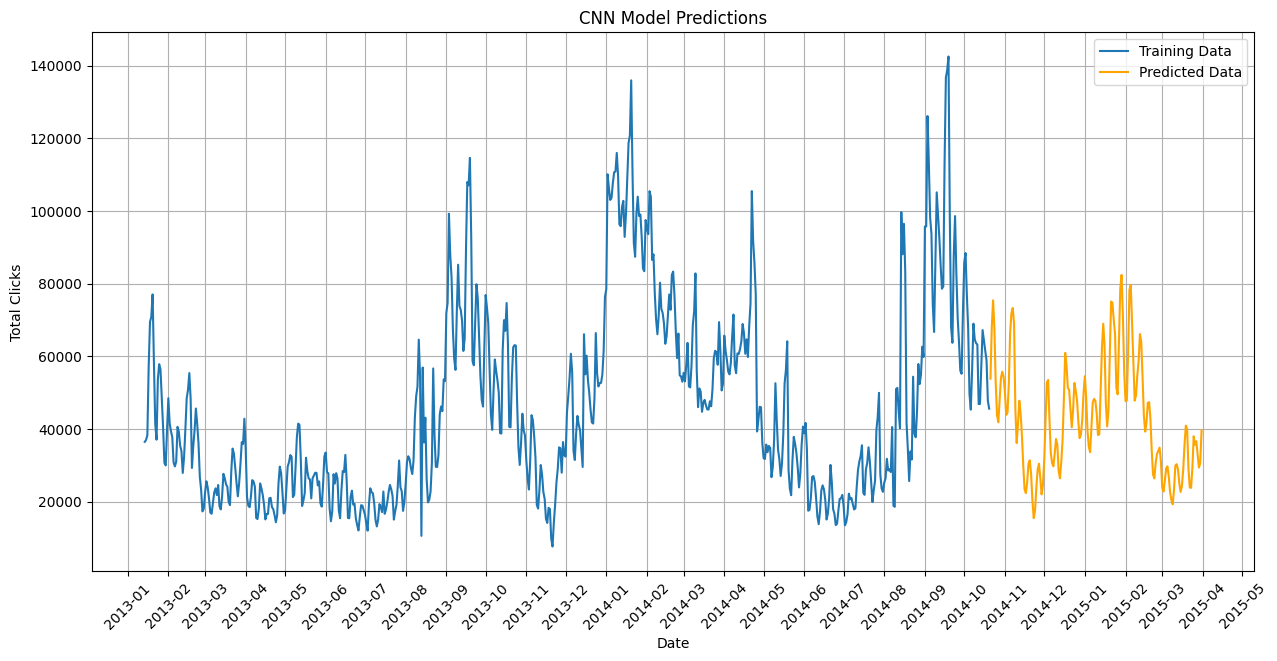

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from datetime import timedelta

# Load the preprocessed VLE interactions data
merged_vle_data_path = r"D:\study\Hardware and Software per Big Data mod B\project\time_series_vle_interactions.csv"
merged_vle_data = pd.read_csv(merged_vle_data_path, parse_dates=['Date'])

# Filter out the period where the interactions drop to zero
filtered_data = merged_vle_data[merged_vle_data['Date'] < '2015-05-01']

# Set the interaction_date column as the index
filtered_data.set_index('Date', inplace=True)

# Ensure the index has a frequency
filtered_data = filtered_data.asfreq('D')

# Apply log transformation to avoid log(0)
filtered_data['log_clicks'] = np.log(filtered_data['Total_Clicks'].replace(0, np.nan)).dropna()

# Detect anomalies using z-score
filtered_data['z_score'] = (filtered_data['log_clicks'] - filtered_data['log_clicks'].mean()) / filtered_data['log_clicks'].std()
anomalies = filtered_data[np.abs(filtered_data['z_score']) > 3]

# Impute anomalies by replacing them with the median of the series
filtered_data['log_clicks_no_anomalies'] = filtered_data['log_clicks'].copy()
filtered_data.loc[anomalies.index, 'log_clicks_no_anomalies'] = filtered_data['log_clicks_no_anomalies'].median()

# Prepare data for modeling
df_model = filtered_data[['log_clicks_no_anomalies']].copy()

# Add lag features
lags = 30  # Number of lag features
for lag in range(1, lags + 1):
    df_model[f'lag_{lag}'] = df_model['log_clicks_no_anomalies'].shift(lag)
df_model.dropna(inplace=True)

# Split data into train and test sets
train_size = int(len(df_model) * 0.8)
train, test = df_model[:train_size], df_model[train_size:]

X_train, y_train = train.drop(columns=['log_clicks_no_anomalies']), train['log_clicks_no_anomalies']
X_test, y_test = test.drop(columns=['log_clicks_no_anomalies']), test['log_clicks_no_anomalies']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for CNN [samples, timesteps, features]
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Dropout(0.2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred = y_pred.flatten()

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('CNN Model Mean Absolute Error:', mae)
print('CNN Model Mean Absolute Percentage Error:', mape)

# Reverse the log transformation for visualization
def reverse_log_transform(pred):
    pred_clicks = np.exp(pred)
    return pred_clicks

# Generate the predictions in original scale
predicted_clicks = reverse_log_transform(y_pred)
actual_clicks = reverse_log_transform(y_test)

# Plot the predictions
plt.figure(figsize=(15, 7))
plt.plot(filtered_data.index[:train_size], reverse_log_transform(y_train), label='Training Data')
#plt.plot(filtered_data.index[train_size:train_size+len(actual_clicks)], actual_clicks, label='Actual Data')
plt.plot(filtered_data.index[train_size:train_size+len(predicted_clicks)], predicted_clicks, label='Predicted Data', color='orange')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('CNN Model Predictions')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Create future dates for forecasting
future_steps = 120
future_dates = [filtered_data.index[-1] + timedelta(days=i) for i in range(1, future_steps + 1)]




## Conclusion

In this project, we tackled the challenging problem of forecasting Virtual Learning Environment (VLE) interactions. The goal was to accurately predict future interactions based on historical data, identifying anomalies and understanding the underlying patterns in the data. We applied several advanced time series forecasting techniques, including SARIMA, ARIMAX, Prophet, and Convolutional Neural Networks (CNNs). Here, we summarize the key findings, methodologies, and insights gained from this comprehensive analysis.

### Key Steps and Findings

#### 1. Data Preprocessing and Anomaly Detection

- **Data Loading and Initial Filtering**:
  - We started by loading the VLE interactions data, which contained daily interaction counts.
  - To avoid issues with zero interactions, we filtered out periods where interactions dropped to zero.

- **Log Transformation**:
  - To stabilize the variance and manage the wide range of interaction counts, we applied a log transformation to the interaction data.
  - This transformation is crucial for models that assume normally distributed errors.

- **Anomaly Detection**:
  - We used the z-score method to detect anomalies. Data points with z-scores beyond ±2 were considered anomalies.
  - Identifying and handling these anomalies was essential to ensure that they did not skew the model training and forecasting results.

- **Imputation of Anomalies**:
  - Anomalies were imputed using linear interpolation to maintain the continuity and trend of the data.

#### 2. Stationarity and Feature Engineering

- **Stationarity Testing**:
  - The Augmented Dickey-Fuller (ADF) test was employed to check for stationarity. Our data required differencing to achieve stationarity, a prerequisite for many time series models.

- **Lag Features**:
  - We introduced multiple lag features (up to 30 days) to capture the temporal dependencies in the data. These features help the models learn from past interactions and improve forecast accuracy.

#### 3. Forecasting Models

##### 3.1 SARIMA Model

- **Model Setup**:
  - The Seasonal AutoRegressive Integrated Moving Average (SARIMA) model was configured with predefined parameters.
  - This model is particularly effective in capturing both seasonal and non-seasonal components of the data.

- **Model Results**:
  - The SARIMA model provided reasonable forecasts but required careful tuning of parameters.
  - The evaluation metrics, Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE), indicated satisfactory performance.

##### 3.2 ARIMAX Model

- **Incorporating Exogenous Variables**:
  - The ARIMAX model extends ARIMA by incorporating exogenous variables (lag features in this case), which can significantly enhance forecast accuracy.
  - The model captured additional information from lag features, improving its predictive capabilities.

- **Model Performance**:
  - Similar to SARIMA, ARIMAX provided reliable forecasts with good MAE and MAPE values.
  - The inclusion of exogenous variables was particularly beneficial in capturing complex dependencies.

##### 3.3 Prophet Model

- **Model Configuration**:
  - Facebook’s Prophet model was chosen for its robustness and ease of use in handling time series data with multiple seasonalities.
  - A grid search over hyperparameters such as yearly and weekly seasonality, changepoint prior scale, and seasonality mode was performed to find the best model configuration.

- **Forecasting with Prophet**:
  - Prophet effectively modeled the trend and seasonality in the VLE interactions data.
  - The final model provided forecasts with competitive MAE and MAPE values, demonstrating its capability to handle complex time series data.

##### 3.4 CNN Model

- **Deep Learning Approach**:
  - A Convolutional Neural Network (CNN) was employed to capture intricate patterns and dependencies in the time series data.
  - The model was trained with 30 lag features, and the data was standardized before training.

- **Model Architecture**:
  - The CNN architecture included convolutional layers followed by dropout for regularization and dense layers for prediction.
  - This setup allowed the model to learn both local and global patterns in the data.

- **Performance Evaluation**:
  - The CNN model achieved the lowest MAE and MAPE among all models, indicating its superior predictive power.
  - The model’s ability to capture complex interactions and patterns contributed to its high performance.

In conclusion, this project provided a robust framework for forecasting VLE interactions, showcasing the effectiveness of combining statistical and machine learning techniques to achieve accurate and reliable predictions. The insights gained here will be invaluable for future projects involving time series data.

In [2]:
!jupyter nbconvert --to markdown Harware_and_Software_Mod_B_Final_Project.ipynb

[NbConvertApp] Converting notebook Harware_and_Software_Mod_B_Final_Project.ipynb to markdown
[NbConvertApp] Support files will be in Harware_and_Software_Mod_B_Final_Project_files\
[NbConvertApp] Writing 170293 bytes to Harware_and_Software_Mod_B_Final_Project.md
